In [1]:
#Conda env: base

#Import packages
#---------------------------------------
import sys
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns

#Import your modules
#---------------------------------------
import plaque_f as pf
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.10.2 | packaged by conda-forge | (main, Jan 14 2022, 08:02:09) [GCC 9.4.0]'

# Load data

In [3]:
def run_(age, long_name, short_name):
    # Declare paths
    data_path = s_data + 'spatial_transcriptomics/plaques/coords/' + age + '/' + long_name + '.json'
    coord_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/tissue_positions.csv'
    genes_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/filtered_feature_bc_matrix.h5'
    scale_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/scalefactors_json.json'
    meta = pd.read_csv('/home/AD/agelber/desp1/precast/prec_c25q25g3000/qc_cell_annotation.csv')
    meta_filt = meta[meta['sample'] == short_name]

    spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, scale_path, 
                                    meta_filt, min_cell_per_gene=0)#, norm_factor=1e6)
    
    #Sanity check
    assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
    #assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
    print('Number of spots: ' + str(gene_df.shape[0]))
    print('Number of genes: ' + str(gene_df.shape[1]))
    return(spot_df, gene_df)

In [13]:
#Load in metadata

meta = pd.read_csv('/cndd2/agelber/hal/metadata.csv')
meta

sample        age sex genotype  time sample_number sample_name  \
0   039-A_S18   7 months   F       WT   ZT0           S18       039-A   
1   039-B_S19   7 months   F       WT   ZT6           S19       039-B   
2   039-C_S20   7 months   F       WT  ZT12           S20       039-C   
3   039-D_S21   7 months   F       WT  ZT18           S21       039-D   
4   042-A_S22   7 months   M       WT   ZT6           S22       042-A   
..        ...        ...  ..      ...   ...           ...         ...   
61  351-D_S12  14 months   F       WT  ZT18           S12       351-D   
62  043-A_S12  14 months   F    APP23   ZT0           S12       043-A   
63  043-B_S13  14 months   M    APP23   ZT6           S13       043-B   
64  043-C_S14  14 months   F       WT  ZT12           S14       043-C   
65  043-D_S15  14 months   F       WT  ZT18           S15       043-D   

    resequenced  
0         False  
1          True  
2          True  
3         False  
4         False  
..          ...  
61        False  
62         True  
63         True  
64         True  
65         True  

[66 rows x 8 columns]

In [188]:
%autoreload
#Load a dataset
#sort out names
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
x=0
spot_df, gene_df = run_('old',ID[x], sub_ID[x])

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


In [189]:
spot_df

barcode in_tissue array_row array_col pxl_row_in_fullres  \
111351  AAACAAGTATCTCCCA-1         1        50       102                413   
111352  AAACAATCTACTAGCA-1         1         3        43               1049   
111353  AAACAGAGCGACTCCT-1         1        14        94                500   
111354  AAACAGTGTTCCTGGG-1         1        73        43               1046   
111355  AAACCCGAACGAAATC-1         1        45       115                273   
...                    ...       ...       ...       ...                ...   
114743  TTGTTTCACATCCAGG-1         1        58        42               1057   
114744  TTGTTTCATTAGTCTA-1         1        60        30               1186   
114745  TTGTTTCCATACAACT-1         1        45        27               1219   
114746  TTGTTTGTATTACACG-1         1        73        41               1067   
114747  TTGTTTGTGTAAATTC-1         1         7        51                963   

       pxl_col_in_fullres     micron_x     micron_y  plaque           cluster  
111351               1642  7640.215638  1921.686394       0             GP/TH  
111352                764  3554.887179   4880.99038       0               CA1  
111353                969  4508.750885  2326.496845       0            CA3-sp  
111354               2073  9645.655919  4867.031399       0  Cortex Layer 2/3  
111355               1548  7202.834232  1270.267277       0          Amygdala  
...                   ...          ...          ...     ...               ...  
114743               1793  8342.817685   4918.21433       0   Cortex Layer 5b  
114744               1830  8514.978452  5518.450516       0  Cortex Layer 2/3  
114745               1550  7212.140219  5671.999308       0    Cortex Layer 4  
114746               2073  9645.655919  4964.744267       0  Cortex Layer 2/3  
114747                839  3903.861706  4480.832923       0  Dentate Gyrus-mo  

[3397 rows x 10 columns]

In [190]:
gene_df

Xkr4  Gm1992  Gm19938  Gm37381  Rp1  Sox17  Gm37587  \
AAACAAGTATCTCCCA-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
AAACAATCTACTAGCA-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
AAACAGAGCGACTCCT-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
AAACAGTGTTCCTGGG-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
AAACCCGAACGAAATC-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
...                  ...     ...      ...      ...  ...    ...      ...   
TTGTTTCACATCCAGG-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
TTGTTTCATTAGTCTA-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
TTGTTTCCATACAACT-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
TTGTTTGTATTACACG-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   
TTGTTTGTGTAAATTC-1   0.0     0.0      0.0      0.0  0.0    0.0      0.0   

                    Gm37323  Mrpl15  Lypla1  ...  Gm16367  AC163611.1  \
AAACAAGTATCTCCCA-1      0.0     1.0     0.0  ...      0.0         0.0   
AAACAATCTACTAGCA-1      0.0     1.0     0.0  ...      0.0         0.0   
AAACAGAGCGACTCCT-1      0.0     1.0     1.0  ...      0.0         0.0   
AAACAGTGTTCCTGGG-1      0.0     4.0     2.0  ...      0.0         0.0   
AAACCCGAACGAAATC-1      0.0     0.0     0.0  ...      0.0         0.0   
...                     ...     ...     ...  ...      ...         ...   
TTGTTTCACATCCAGG-1      0.0     0.0     0.0  ...      0.0         0.0   
TTGTTTCATTAGTCTA-1      0.0     1.0     1.0  ...      0.0         0.0   
TTGTTTCCATACAACT-1      0.0     0.0     0.0  ...      0.0         0.0   
TTGTTTGTATTACACG-1      0.0     2.0     0.0  ...      0.0         0.0   
TTGTTTGTGTAAATTC-1      0.0     0.0     0.0  ...      0.0         0.0   

                    AC163611.2  AC140365.1  AC124606.2  AC124606.1  \
AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0   
AAACAATCTACTAGCA-1         0.0         0.0         0.0         0.0   
AAACAGAGCGACTCCT-1         0.0         0.0         0.0         0.0   
AAACAGTGTTCCTGGG-1         0.0         0.0         0.0         0.0   
AAACCCGAACGAAATC-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTGTTTCACATCCAGG-1         0.0         0.0         0.0         0.0   
TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         0.0   
TTGTTTCCATACAACT-1         0.0         0.0         0.0         0.0   
TTGTTTGTATTACACG-1         0.0         0.0         0.0         0.0   
TTGTTTGTGTAAATTC-1         0.0         0.0         0.0         0.0   

                    AC133095.2  AC133095.1  AC234645.1  AC149090.1  
AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0  
AAACAATCTACTAGCA-1         0.0         0.0         0.0         1.0  
AAACAGAGCGACTCCT-1         0.0         0.0         0.0         2.0  
AAACAGTGTTCCTGGG-1         0.0         0.0         0.0        12.0  
AAACCCGAACGAAATC-1         0.0         0.0         0.0         2.0  
...                        ...         ...         ...         ...  
TTGTTTCACATCCAGG-1         0.0         0.0         0.0         4.0  
TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         5.0  
TTGTTTCCATACAACT-1         0.0         0.0         0.0         3.0  
TTGTTTGTATTACACG-1         0.0         0.0         0.0         4.0  
TTGTTTGTGTAAATTC-1         0.0         0.0         0.0         4.0  

[3397 rows x 32284 columns]

# Visualise plaques



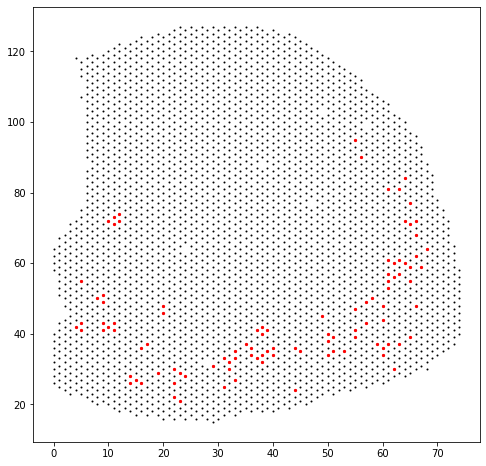

In [383]:
#PLOT PLAQUES
fig = plt.figure(figsize=(8,8))
xcoord, ycoord = spot_df['array_row'].values, spot_df['array_col'].values
plq_bool = spot_df['plaque'].values == 1

plt.scatter(xcoord, ycoord, s=1, c='k')
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=5, c='red')
plt.show()

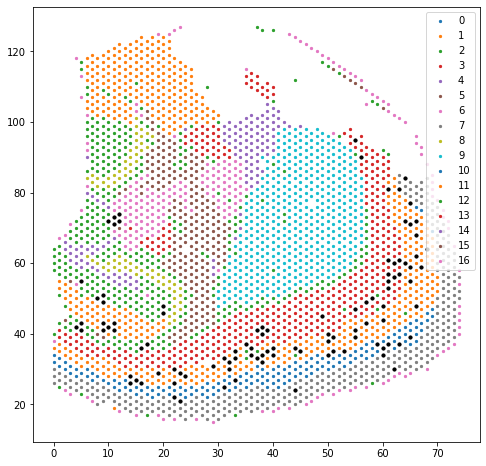

In [384]:

fig = plt.figure(figsize=(8,8))
clust_lab = spot_df['cluster'].values

for x in range(len(np.unique(clust_lab))): 
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = str(x))
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
plt.legend()
#plt.savefig('fig_dump/plaque-clusters-01.svg', transparent=True)
plt.show()


In [390]:
clust_lab

array([17, 12,  2, ...,  7,  7,  2])

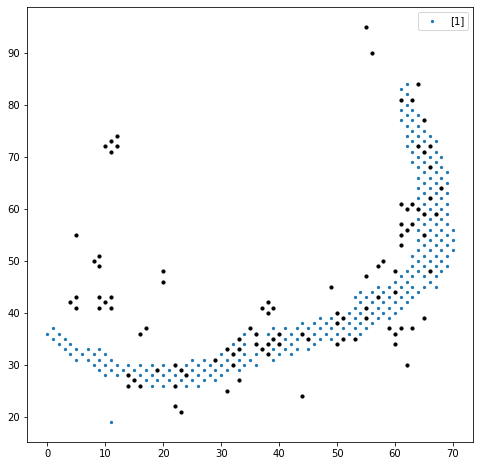

In [393]:
x=[1]
fig = plt.figure(figsize=(8,8))
plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = str(x))
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
plt.legend()
#plt.savefig('fig_dump/plaque-clusters-01.svg', transparent=True)
plt.show()


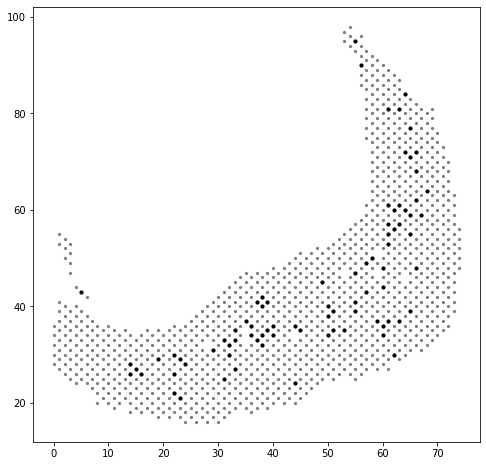

In [100]:
#Cortex plaques
cort_l = [3,6,8,9]

fig = plt.figure(figsize=(8,8))
for x in range(len(np.unique(clust_df['cluster']))): 
    if x in cort_l:
        plt.scatter(rows[row_ind[x]], cols[row_ind[x]], s=5, label = str(x), c = 'grey')
        plt.scatter(rows[np.intersect1d(np.where(plq_bool == True)[0], row_ind[x])], cols[np.intersect1d(np.where(plq_bool == True)[0], row_ind[x])], s=10, c='k')
#plt.savefig('fig_dump/plaque-clusters-cortex-01.svg', transparent=True)
plt.show()


# Plaque distribution 


In [6]:
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID



(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [21]:
#Define colormap by clusters
col_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/colors.csv')
sort_clust = col_df['cluster_order'] #all clusters sorted 
sort_col = col_df['color']


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


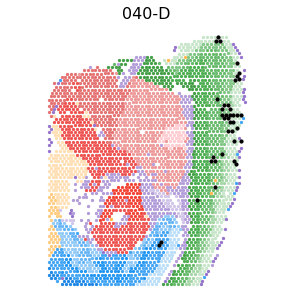

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


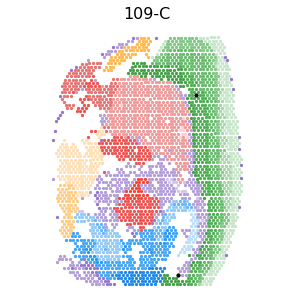

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


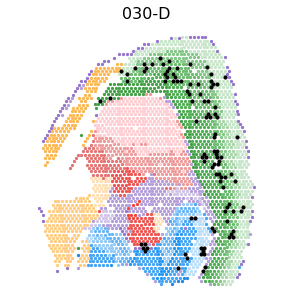

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


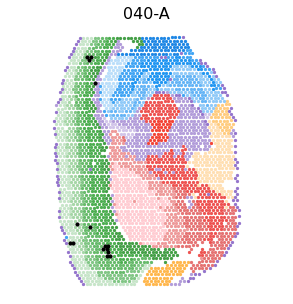

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


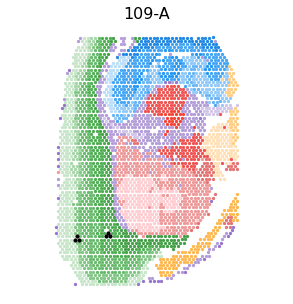

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


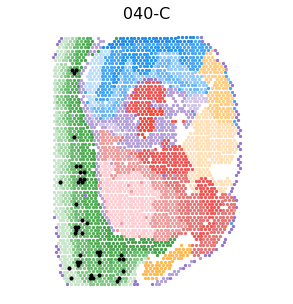

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


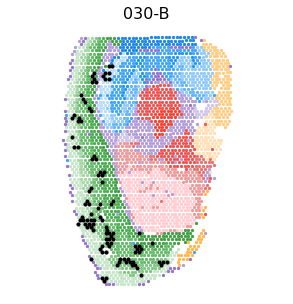

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


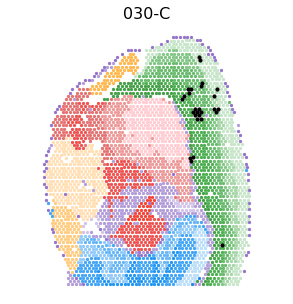

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


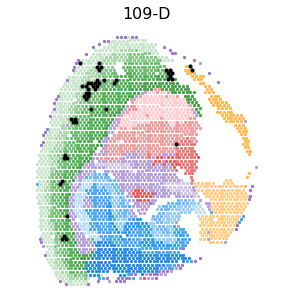

In [31]:

#plot and save all samples
for y,name in enumerate(sub_ID):
    spot_df, gene_df = run_(ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    xcoord, ycoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1


    fig,ax = plt.subplots(figsize=(5,5))
    for x in range(len(sort_clust)): 
        plt.scatter(xcoord[np.where(clust_lab==sort_clust[x])[0]], ycoord[np.where(clust_lab==sort_clust[x])[0]], s=5, label = sort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

    #remove all borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.axis('equal')
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.title(sub_ID[y], fontsize=16)
    plt.savefig(s_fig + 'plaque-clusters-' + sub_ID[y] + '.svg', transparent=True)
    plt.show()



In [9]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID[:1]):
    spot_df, gene_df = run_('old',ID[x], sub_ID[x])
    cat_df = pd.concat([cat_df, spot_df])

clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
# clust_df['region'] = cat_df.groupby('cluster').sum()['plaque'].index.values
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


In [10]:
clust_df

plaque  total spots  percent of spots  \
cluster                                                       
Amygdala                   0          146              0.00   
CA1                        0           65              0.00   
CA3-so/sr                  0          128              0.00   
CA3-sp                     0           70              0.00   
COAa                       0          279              0.00   
COAp                       0          110              0.00   
CTXsp (L6b, CLA, EP)       1          134              0.75   
Caudoputamen               0          257              0.00   
Cortex Layer 2/3           4          287              1.39   
Cortex Layer 4             1          105              0.95   
Cortex Layer 5a            3          114              2.63   
Cortex Layer 5b            5          215              2.33   
Cortex Layer 6a           11          212              5.19   
Dentate Gyrus-mo           0          176              0.00   
Dentate Gyrus-sg           0           71              0.00   
Fiber Tracts               2          302              0.66   
GP/TH                      0          256              0.00   
Lateral Venticle           0           34              0.00   
Meninges                   0          103              0.00   
Piriform Cortex            0           64              0.00   
RHP                        0            2              0.00   
Reticular Nucleus          0           36              0.00   
STRv                       0          231              0.00   

                      percent of all plaques  
cluster                                       
Amygdala                                0.00  
CA1                                     0.00  
CA3-so/sr                               0.00  
CA3-sp                                  0.00  
COAa                                    0.00  
COAp                                    0.00  
CTXsp (L6b, CLA, EP)                    3.70  
Caudoputamen                            0.00  
Cortex Layer 2/3                       14.81  
Cortex Layer 4                          3.70  
Cortex Layer 5a                        11.11  
Cortex Layer 5b                        18.52  
Cortex Layer 6a                        40.74  
Dentate Gyrus-mo                        0.00  
Dentate Gyrus-sg                        0.00  
Fiber Tracts                            7.41  
GP/TH                                   0.00  
Lateral Venticle                        0.00  
Meninges                                0.00  
Piriform Cortex                         0.00  
RHP                                     0.00  
Reticular Nucleus                       0.00  
STRv                                    0.00

/home/dburrows/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'plaque'

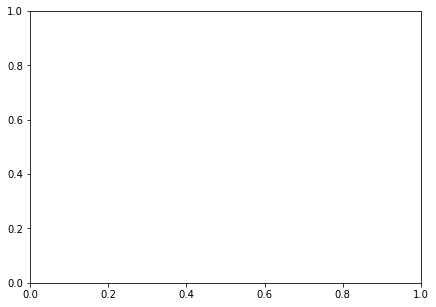

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(clust_df, x=clust_df.index, y= "plaque", palette=sort_col, order=sort_clust) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
#plt.savefig(s_fig + 'plaque-clusters-barplot.svg', transparent=True)
plt.show()

In [19]:
# Fraction of spots covered by plaque

#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID):
    spot_df, gene_df = run_('old',ID[x], sub_ID[x])
    curr= (spot_df.groupby('cluster').sum()['plaque']/spot_df.groupby('cluster').count()['plaque'])*100
    cat_df = pd.concat([cat_df, curr])

cat_df = cat_df.reset_index()
cat_df.columns = ['cluster', 'plaque']


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


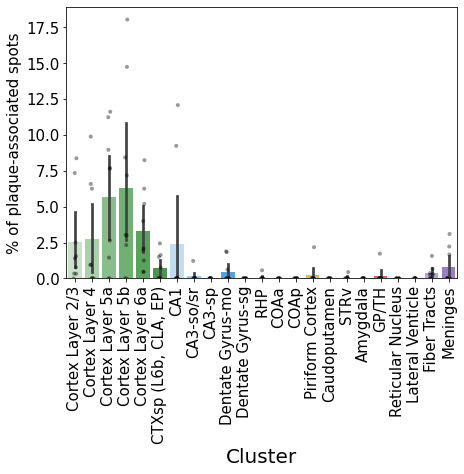

In [40]:

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=cat_df, x='cluster', y='plaque',palette=sort_col, order=sort_clust) 

sns.stripplot(
    x="cluster", 
    y="plaque", 
    color='k', order=sort_clust,
    data=cat_df, alpha=0.4, size=4
)

#label x axis
plt.ylabel('% of plaque-associated spots', fontsize=15)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_code + 'spatial_transcriptomics/' + 'prac.svg', transparent=True)
plt.show()

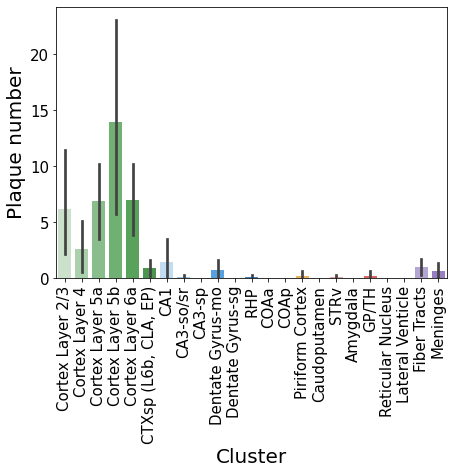

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(cat_df, x='cluster', y= "plaque", palette=sort_col, order=sort_clust) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
#plt.savefig(s_fig + 'plaque-clusters-barplot.svg', transparent=True)
plt.show()

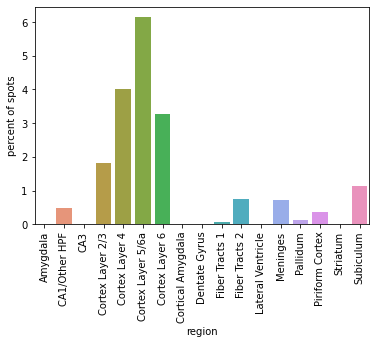

In [105]:
sns.barplot(clust_df, x='region', y= "percent of spots", order=clust_df.sort_values('region', ascending=True).region)# hue="sex", stat="probability", multiple="fill", shrink=.8)
plt.xticks(rotation=90)
plt.show()

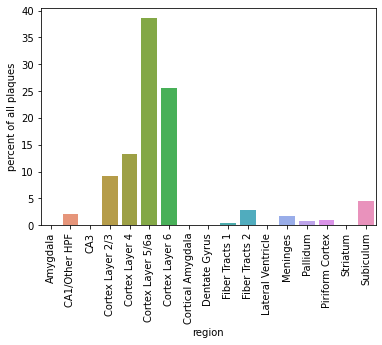

In [106]:
sns.barplot(clust_df, x='region', y= "percent of all plaques", order=clust_df.sort_values('region', ascending=True).region)# hue="sex", stat="probability", multiple="fill", shrink=.8)
plt.xticks(rotation=90)
plt.show()

In [292]:
cat_df

barcode in_tissue array_row array_col pxl_row_in_fullres  \
114443  AAACAATCTACTAGCA-1         1         3        43               1036   
114444  AAACACCAATAACTGC-1         1        59        19               1290   
114445  AAACAGCTTTCAGAAG-1         1        43         9               1399   
114446  AAACAGGGTCTATATT-1         1        47        13               1355   
114447  AAACAGTGTTCCTGGG-1         1        73        43               1032   
...                    ...       ...       ...       ...                ...   
138352  TTGTTTCACATCCAGG-1         1        58        42               1048   
138353  TTGTTTCATTAGTCTA-1         1        60        30               1175   
138354  TTGTTTCCATACAACT-1         1        45        27               1207   
138355  TTGTTTGTATTACACG-1         1        73        41               1057   
138356  TTGTTTGTGTAAATTC-1         1         7        51                956   

       pxl_col_in_fullres  plaque  cluster               anot  
114443                506       0        7   Cortex Layer 2/3  
114444               1553       0        8                CA3  
114445               1255       0       13  Cortical Amygdala  
114446               1329       0       13  Cortical Amygdala  
114447               1814       0       16           Meninges  
...                   ...     ...      ...                ...  
138352               1875       0        3     Cortex Layer 6  
138353               1912       0        1  Cortex Layer 5/6a  
138354               1636       0        7   Cortex Layer 2/3  
138355               2151       0        1  Cortex Layer 5/6a  
138356                936       0        1  Cortex Layer 5/6a  

[20391 rows x 9 columns]

In [6]:
#Look at distribution of spots across sample
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID):
    spot_df, gene_df = run_(ID[x], sub_ID[x])
    spot_df['sample id'] = np.full(len(spot_df), name)
    cat_df = pd.concat([cat_df, spot_df])

cat_filt = cat_df[cat_df['plaque'] == 1]
cat_filt

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


barcode in_tissue array_row array_col pxl_row_in_fullres  \
165822  AACTCCAGAGCGTGTT-1         1        60        92                510   
165877  AATACCGGAGGGCTGT-1         1        67        37               1105   
165926  ACAAGGATGCTTTAGG-1         1        61        87                564   
165959  ACATGGCGCCAAAGTA-1         1        40       104                382   
166019  ACGCAAACTAATAGAT-1         1        63        47                997   
...                    ...       ...       ...       ...                ...   
130476  TCACGATGTCCGTGGA-1         1        52        28               1196   
130516  TCCCAAACATCCTCTA-1         1        75        35               1121   
130571  TCGAGCCAGGCAGGCC-1         1        57        37               1101   
131004  TTCTTGGACGATCTGC-1         1        52        32               1154   
131078  TTGTGGTAGGAGGGAT-1         1        50        28               1196   

       pxl_col_in_fullres  plaque               cluster sample id  
165822               1712       1       Cortex Layer 5a     109-D  
165877               1846       1       Piriform Cortex     109-D  
165926               1731       1       Cortex Layer 5b     109-D  
165959               1335       1       Cortex Layer 5b     109-D  
166019               1770       1  CTXsp (L6b, CLA, EP)     109-D  
...                   ...     ...                   ...       ...  
130476               1765       1      Cortex Layer 2/3     040-D  
130516               2188       1      Cortex Layer 2/3     040-D  
130571               1857       1       Cortex Layer 5b     040-D  
131004               1765       1       Cortex Layer 5a     040-D  
131078               1728       1      Cortex Layer 2/3     040-D  

[381 rows x 9 columns]

In [27]:
from PIL import ImageColor
rgb_l = [ImageColor.getcolor(sort_col[i], "RGBA") for i in range(len(sort_col))]
rgb_l=np.asarray(rgb_l) / 255

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


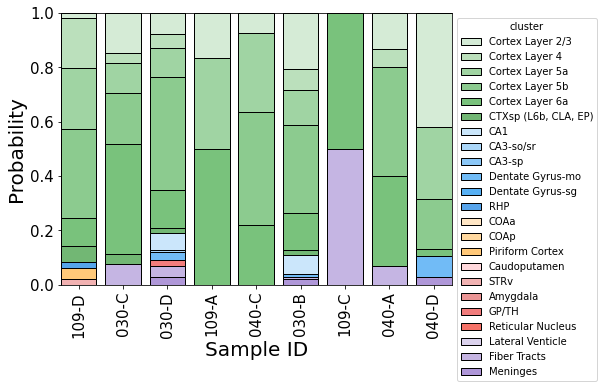

In [29]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(cat_filt, x="sample id", hue="cluster", hue_order = sort_clust, palette=rgb_l, stat='probability', multiple="fill", shrink=.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Sample ID', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-clusters-propplot.svg', transparent=True)
plt.show()

In [33]:
cort_clust = sort_clust[:5]
cort_clust

0    Cortex Layer 2/3
1      Cortex Layer 4
2     Cortex Layer 5a
3     Cortex Layer 5b
4     Cortex Layer 6a
Name: cluster_order, dtype: object

In [31]:
#Find shortest path right_most and left_most points in layer 2-3
#-----------------------------------------------
def add_edge(graph, my_coords, nn):
    #compute distances between all points
    #-----------------------------------------------

    from sklearn.neighbors import NearestNeighbors
    #find the n nearest neighbours
    X = np.asarray(my_coords)
    nbrs = NearestNeighbors(n_neighbors=nn, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = distances[:,1:]
    indices = indices[:,1:]

    #fill in graph
    edges = list(range(distances.shape[0]*distances.shape[1]))
    count=0
    for i in range(distances.shape[0]):
        for e in range(distances.shape[1]):
            edges[count] = (str(i), str(indices[i,e]), 1/distances[i,e])
            count+=1
    for edge in edges:
        graph.add_edge(*edge)
    return(graph)

#Calculate R->C ratio
def nn_check(X, new_path):
    nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = distances[:,1:]
    indices = indices[:,1:]
    norm_dist = indices[0][0]/len(new_path) 
    if norm_dist == 0:
        norm_dist = indices[0][1]/len(new_path) 
    return(norm_dist)

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


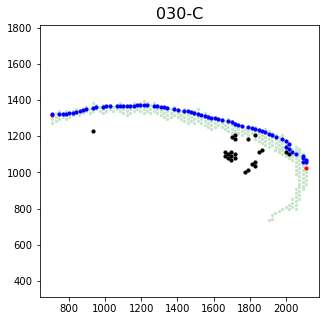

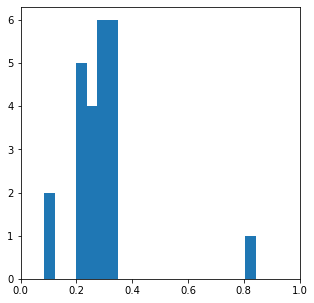

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


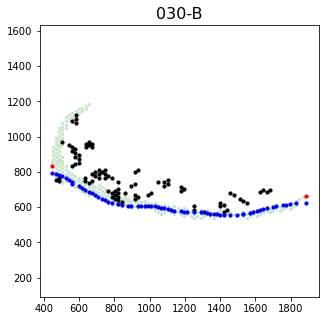

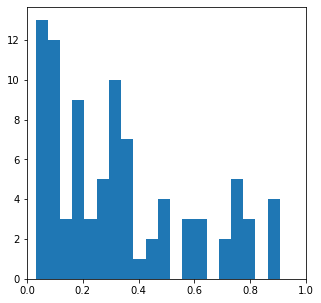

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


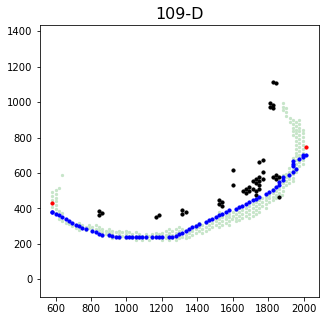

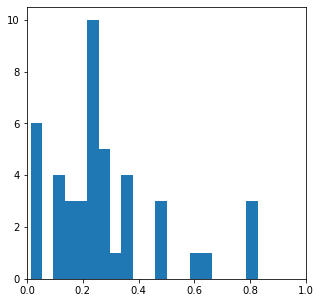

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


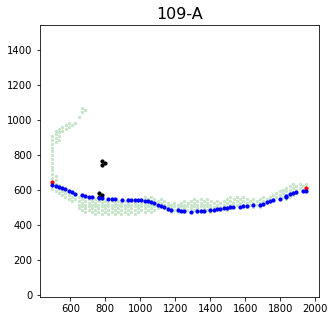

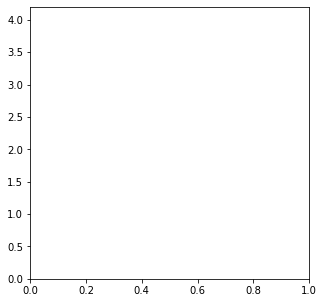

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


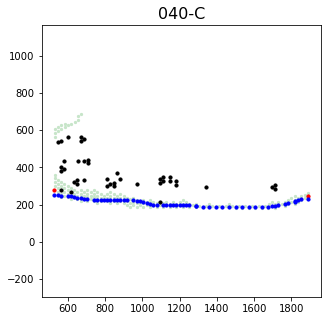

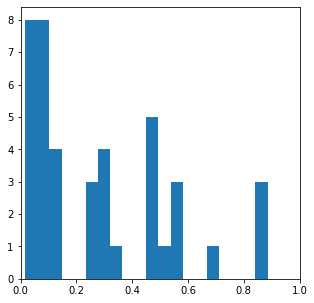

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


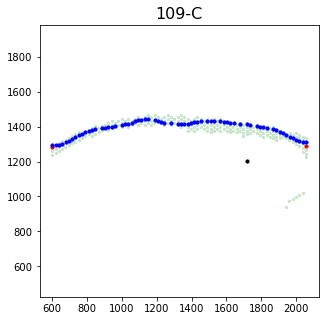

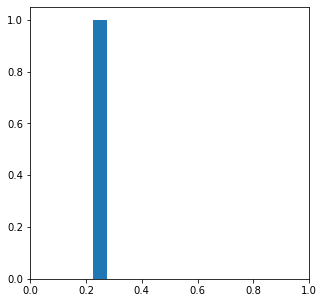

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


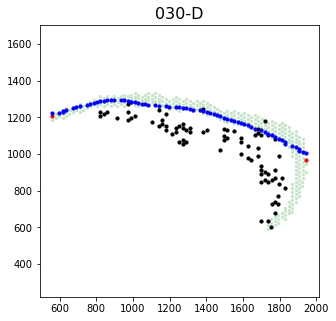

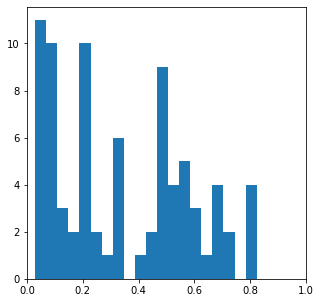

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


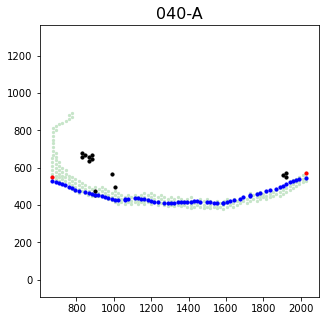

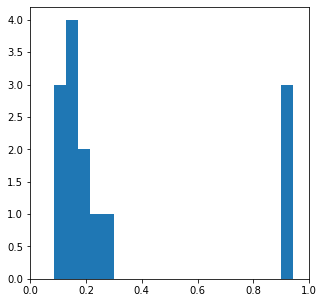

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


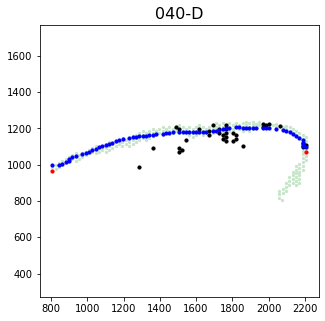

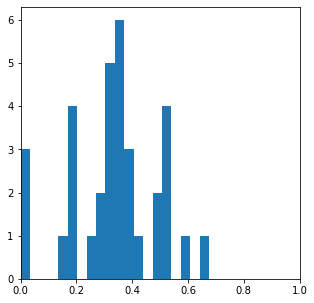

In [36]:
import scipy
from sklearn.neighbors import NearestNeighbors

invert_name = ['030-B', '109-A', '040-C', '040-A']
samp_l = list(range(len(sub_ID)))
flat=[]
nom=[]
#plot and save all samples
for y,name in enumerate(sub_ID):
    #plot and save all samples
    spot_df, gene_df = run_('old',ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    ycoord, xcoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1
    plq_bool = np.intersect1d(np.argwhere(plq_bool), [i for i in range(len(spot_df['cluster'])) if 'Cortex' in spot_df['cluster'].values[i]])


    fig,ax = plt.subplots(figsize=(5,5))
    #only do top cortex cluster
    x=0
    plt.scatter(xcoord[np.where(clust_lab==cort_clust[x])[0]], ycoord[np.where(clust_lab==cort_clust[x])[0]], s=5, label = cort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    curr_x = xcoord[np.where(clust_lab==cort_clust[x])[0]]
    curr_y = ycoord[np.where(clust_lab==cort_clust[x])[0]]
    right_most = np.max(curr_x)
    left_most = np.min(curr_x)
    
    #find shortest path length
    end_ind, start_ind = str(np.where(curr_x==right_most)[0][0]),str(np.where(curr_x==left_most)[0][0])
    my_coords = np.vstack((curr_x,curr_y)).T
    graph = pf.Graph()
    graph = add_edge(graph,my_coords, 5)
    path = pf.dijsktra(graph, start_ind, end_ind)


    #color right_most and left_most point
    plt.scatter(right_most, curr_y[np.where(curr_x==right_most)[0]][0],s=10, c='r')
    plt.scatter(left_most, curr_y[np.where(curr_x==left_most)[0]][0],  s=10, c='r')

    #color shortest path and gaussian smooth in y
    path_x, path_y = curr_x[[int(i) for i in path]], curr_y[[int(i) for i in path]]
    arr = np.asarray(np.vstack((path_x, path_y)).T)
    arr = arr.astype('int32')
    new_arr= scipy.ndimage.gaussian_filter(arr[:,1], sigma=3)

    plt.scatter(path_x, new_arr, s=10, c='blue')

    #remove all borders
    ax.axis('equal')
    plt.title(sub_ID[y], fontsize=16)
    plt.show()

    
    #Calculate distances R-> C
    dist_v = []
    new_path = np.vstack((path_x, new_arr)).T
    new_plq = np.vstack((xcoord[plq_bool],ycoord[plq_bool])).T
    for p in new_plq:
        dist_v = np.append(dist_v,nn_check(np.vstack((p,new_path)), new_path))
        
    if name not in invert_name:
        dist_v = 1-dist_v
    flat = np.append(flat,dist_v)
    nom = np.append(nom, np.full(len(dist_v), name))
    
    fig,ax = plt.subplots(figsize=(5,5))
    plt.hist(dist_v, bins=20)
    plt.xlim(0,1)
    plt.show()

In [37]:
df = pd.DataFrame({'name':nom, 'Rostral/Caudal': flat})
df

name  Rostral/Caudal
0    030-C        0.214286
1    030-C        0.300000
2    030-C        0.100000
3    030-C        0.314286
4    030-C        0.328571
..     ...             ...
328  040-D        0.323944
329  040-D        0.028169
330  040-D        0.267606
331  040-D        0.338028
332  040-D        0.352113

[333 rows x 2 columns]

<ipython-input-38-c0c6bae9c001>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x="Rostral/Caudal", hue="name", kind="kde", fill=True, height=6, aspect=1.5)


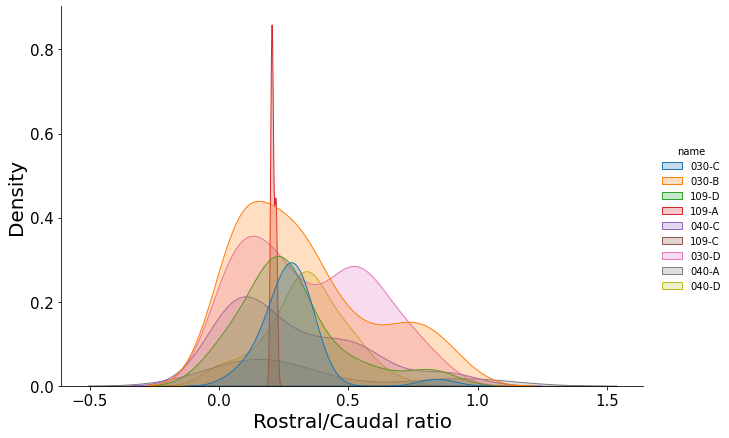

In [38]:
sns.displot(data=df, x="Rostral/Caudal", hue="name", kind="kde", fill=True, height=6, aspect=1.5)
sns.set(rc={'figure.figsize':(20,8.27)})

#label x axis
plt.ylabel('Density', fontsize=20)
plt.xlabel('Rostral/Caudal ratio', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.rcParams['figure.figsize']=(20,6)
#plt.savefig(s_code + 'spatial_transcriptomics/' + 'prac.svg', transparent=False)
plt.show()


In [369]:
#YOUNG ANIMALS
#sort out names
import glob
import os
age = 'young'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
     sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
ID, sub_ID



(['V10Y05_107-D', 'V10Y07_063-B', 'V10Y05_106-C'],
 array(['107-D', '063-B', '106-C'], dtype='<U32'))

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3311
Number of genes: 32284


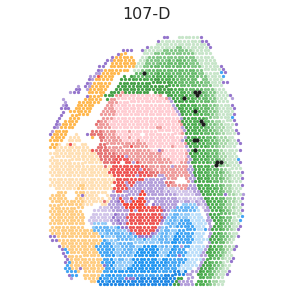

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3570
Number of genes: 32284


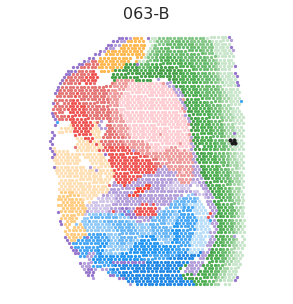

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3151
Number of genes: 32284


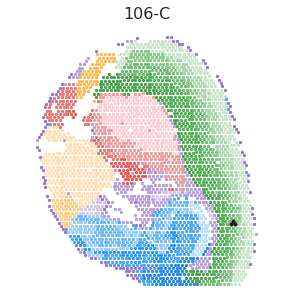

In [373]:

#plot and save all samples
for y,name in enumerate(sub_ID):
    sns.set_style(style='white') 
    spot_df, gene_df = run_('young',ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    xcoord, ycoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1


    fig,ax = plt.subplots(figsize=(5,5))
    for x in range(len(sort_clust)): 
        plt.scatter(xcoord[np.where(clust_lab==sort_clust[x])[0]], ycoord[np.where(clust_lab==sort_clust[x])[0]], s=5, label = sort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

    #remove all borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.axis('equal')
    ax.grid(False)
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.title(sub_ID[y], fontsize=16)
    plt.savefig(s_code + 'spatial_transcriptomics/plaque-clusters-' + sub_ID[y] + '.svg', transparent=True)
    plt.show()


In [375]:
# Fraction of spots covered by plaque

#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID):
    spot_df, gene_df = run_('young',ID[x], sub_ID[x])
    curr= (spot_df.groupby('cluster').sum()['plaque']/spot_df.groupby('cluster').count()['plaque'])*100
    cat_df = pd.concat([cat_df, curr])

cat_df = cat_df.reset_index()
cat_df.columns = ['cluster', 'plaque']


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3311
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3570
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3151
Number of genes: 32284


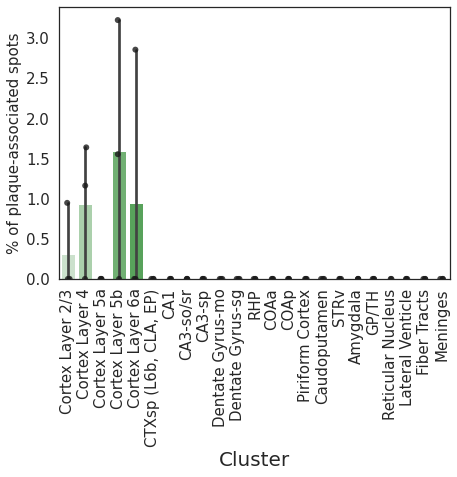

In [379]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=cat_df, x='cluster', y='plaque',palette=sort_col, order=sort_clust) 

sns.stripplot(
    x="cluster", 
    y="plaque", 
    color='k', order=sort_clust,
    data=cat_df, alpha=0.8, size=6
)

#label x axis
plt.ylabel('% of plaque-associated spots', fontsize=15)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_code + 'spatial_transcriptomics/' + 'prac.svg', transparent=True)
plt.show()

In [381]:
#Look at distribution of spots across sample
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID):
    spot_df, gene_df = run_('young',ID[x], sub_ID[x])
    spot_df['sample id'] = np.full(len(spot_df), name)
    cat_df = pd.concat([cat_df, spot_df])

cat_filt = cat_df[cat_df['plaque'] == 1]
cat_filt

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3311
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3570
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3151
Number of genes: 32284


barcode in_tissue array_row array_col pxl_row_in_fullres  \
62020  AATTCGATTCGAGGAT-1         1        66        76                992   
62096  ACCCATCTTGAGGGTA-1         1        37        37               1198   
62100  ACCCGGTTACACTTCC-1         1        42        48               1140   
62101  ACCCGTGTCATCAGTA-1         1        58        54               1108   
62404  AGTGATATGAGTAGTT-1         1        45        49               1135   
62522  ATCCTGCGTGGAATGG-1         1        45        47               1145   
62776  CAGAGGCGATGCATGA-1         1        54        48               1140   
62974  CCGCGGAATGCGTCAC-1         1        51        45               1156   
63551  GACGCTTGCTTCTAAA-1         1        38        36               1203   
64077  GTAATCTGATTCTTCG-1         1        50        44               1161   
64430  TAGCTAGTGATGATGG-1         1        60        48               1140   
64786  TGATTTATTAGCTGTG-1         1        38        34               1214   
65035  TTCGCGCGCCATACGA-1         1        59        47               1145   
65051  TTCTAGAAAGTCTTAT-1         1        60        46               1150   
29762  ACGTCTCGTTCCGGGA-1         1        44         6               1395   
30585  CCCGTGAGGGCGGTGA-1         1        44         4               1406   
30759  CGAGAGCGCGTAGATA-1         1        45         7               1390   
32484  TCTCGTGTTACGAGGA-1         1        45         5               1401   
52980  CCCGCGCAATGCACCC-1         1        19        23               1259   
53509  GAAATACTAAACGTTT-1         1        18        22               1265   
54987  TTCGGCTAGAGATGGT-1         1        18        24               1254   

      pxl_col_in_fullres  plaque           cluster sample id  
62020               3601       1   Cortex Layer 5b     107-D  
62096               3337       1   Cortex Layer 5b     107-D  
62100               3382       1   Cortex Layer 6a     107-D  
62101               3528       1   Cortex Layer 6a     107-D  
62404               3409       1   Cortex Layer 6a     107-D  
62522               3409       1   Cortex Layer 6a     107-D  
62776               3492       1   Cortex Layer 6a     107-D  
62974               3464       1   Cortex Layer 6a     107-D  
63551               3346       1   Cortex Layer 5b     107-D  
64077               3455       1   Cortex Layer 5b     107-D  
64430               3546       1   Cortex Layer 5b     107-D  
64786               3346       1    Cortex Layer 4     107-D  
65035               3537       1   Cortex Layer 5b     107-D  
65051               3547       1   Cortex Layer 5b     107-D  
29762               1514       1    Cortex Layer 4     063-B  
30585               1514       1  Cortex Layer 2/3     063-B  
30759               1524       1    Cortex Layer 4     063-B  
32484               1524       1  Cortex Layer 2/3     063-B  
52980               2252       1   Cortex Layer 5b     106-C  
53509               2243       1   Cortex Layer 5b     106-C  
54987               2243       1   Cortex Layer 5b     106-C

In [382]:
from PIL import ImageColor
rgb_l = [ImageColor.getcolor(sort_col[i], "RGBA") for i in range(len(sort_col))]
rgb_l=np.asarray(rgb_l) / 255


/home/dburrows/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


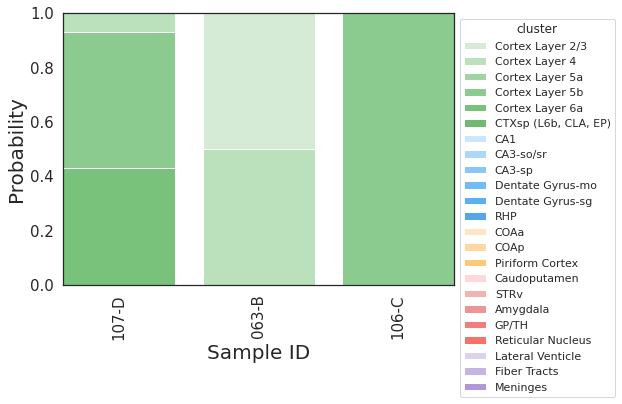

In [383]:

fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(cat_filt, x="sample id", hue="cluster", hue_order = sort_clust, palette=rgb_l, stat='probability', multiple="fill", shrink=.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Sample ID', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_code + '/spatial_transcriptomics/plaque-clusters-propplot.svg', transparent=True)
plt.show()

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3311
Number of genes: 32284


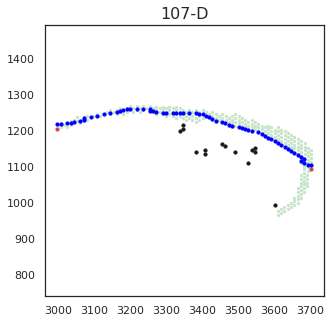

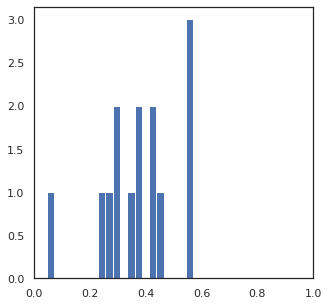

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3570
Number of genes: 32284


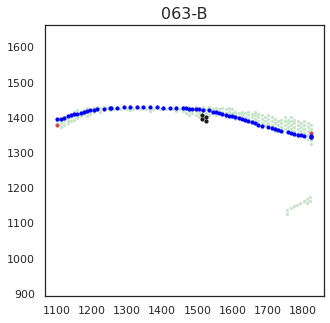

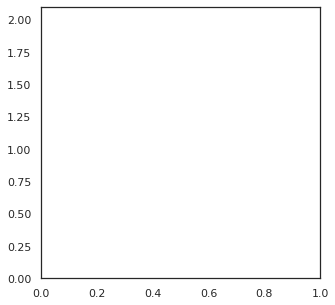

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3151
Number of genes: 32284


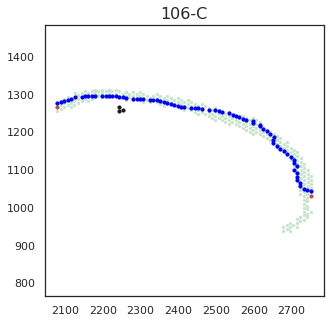

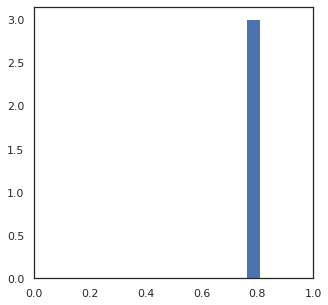

In [388]:
invert_name = ['030-B', '109-A', '040-C', '040-A']
samp_l = list(range(len(sub_ID)))
flat=[]
nom=[]
#plot and save all samples
for y,name in enumerate(sub_ID):
    #plot and save all samples
    spot_df, gene_df = run_('young',ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    ycoord, xcoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1
    plq_bool = np.intersect1d(np.argwhere(plq_bool), [i for i in range(len(spot_df['cluster'])) if 'Cortex' in spot_df['cluster'].values[i]])


    fig,ax = plt.subplots(figsize=(5,5))
    #only do top cortex cluster
    x=0
    plt.scatter(xcoord[np.where(clust_lab==cort_clust[x])[0]], ycoord[np.where(clust_lab==cort_clust[x])[0]], s=5, label = cort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    curr_x = xcoord[np.where(clust_lab==cort_clust[x])[0]]
    curr_y = ycoord[np.where(clust_lab==cort_clust[x])[0]]
    right_most = np.max(curr_x)
    left_most = np.min(curr_x)
    
    #find shortest path length
    end_ind, start_ind = str(np.where(curr_x==right_most)[0][0]),str(np.where(curr_x==left_most)[0][0])
    my_coords = np.vstack((curr_x,curr_y)).T
    graph = pf.Graph()
    graph = add_edge(graph,my_coords, 5)
    path = pf.dijsktra(graph, start_ind, end_ind)


    #color right_most and left_most point
    plt.scatter(right_most, curr_y[np.where(curr_x==right_most)[0]][0],s=10, c='r')
    plt.scatter(left_most, curr_y[np.where(curr_x==left_most)[0]][0],  s=10, c='r')

    #color shortest path and gaussian smooth in y
    path_x, path_y = curr_x[[int(i) for i in path]], curr_y[[int(i) for i in path]]
    arr = np.asarray(np.vstack((path_x, path_y)).T)
    arr = arr.astype('int32')
    new_arr= scipy.ndimage.gaussian_filter(arr[:,1], sigma=3)

    plt.scatter(path_x, new_arr, s=10, c='blue')

    #remove all borders
    ax.axis('equal')
    plt.title(sub_ID[y], fontsize=16)
    plt.show()

    
    #Calculate distances R-> C
    dist_v = []
    new_path = np.vstack((path_x, new_arr)).T
    new_plq = np.vstack((xcoord[plq_bool],ycoord[plq_bool])).T
    for p in new_plq:
        dist_v = np.append(dist_v,nn_check(np.vstack((p,new_path)), new_path))
        
    dist_v = 1-dist_v
    flat = np.append(flat,dist_v)
    nom = np.append(nom, np.full(len(dist_v), name))
    
    fig,ax = plt.subplots(figsize=(5,5))
    plt.hist(dist_v, bins=20)
    plt.xlim(0,1)
    plt.show()

In [390]:
df

name  Rostral/Caudal
0   107-D        0.046154
1   107-D        0.569231
2   107-D        0.446154
3   107-D        0.292308
4   107-D        0.430769
5   107-D        0.430769
6   107-D        0.338462
7   107-D        0.369231
8   107-D        0.569231
9   107-D        0.384615
10  107-D        0.246154
11  107-D        0.553846
12  107-D        0.292308
13  107-D        0.261538
14  063-B        0.484375
15  063-B        0.484375
16  063-B        0.468750
17  063-B        0.468750
18  106-C        0.760000
19  106-C        0.760000
20  106-C        0.760000

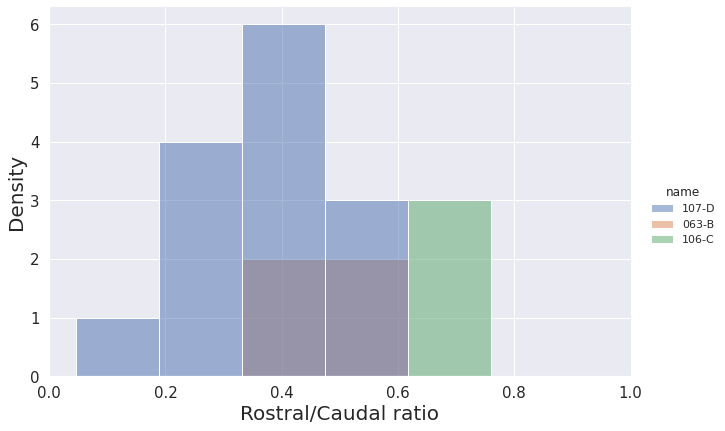

In [397]:
df = pd.DataFrame({'name':nom, 'Rostral/Caudal': flat})


sns.displot(data=df, x="Rostral/Caudal", hue="name", bins = 5,fill=True, height=6, aspect=1.5)

sns.set(rc={'figure.figsize':(20,8.27)})

#label x axis
plt.ylabel('Density', fontsize=20)
plt.xlabel('Rostral/Caudal ratio', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,1)
plt.rcParams['figure.figsize']=(20,6)
plt.savefig(s_code + 'spatial_transcriptomics/' + 'prac.svg', transparent=False)
plt.show()


In [88]:
#Plot sub region plaque distributions
sub_reg = pd.read_csv('/home/agelber/desp1/precast/prec_c25q25g3000/selected/new_anot.csv', sep=',')
sub_reg['unq_id'] = sub_reg['sample'] + sub_reg['cell']
sub_reg.index = sub_reg['unq_id'].values
cort = sub_reg.loc[sub_reg['cort']==1]
hipp = sub_reg.loc[sub_reg['cort']==0]

In [16]:
cort['sel2'].unique()

array(['ros', 'caud', 'mid'], dtype=object)

In [19]:
hipp['sel2'].unique()

array(['inf', 'sup'], dtype=object)

In [95]:
# Fraction of spots covered by plaque
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID):
    spot_df, gene_df = run_('old',ID[x], sub_ID[x])
    spot_df['unq_id'] = name + spot_df['barcode']
    spot_df['sample'] = name
    #curr= (spot_df.groupby('cluster').sum()['plaque']/spot_df.groupby('cluster').count()['plaque'])*100
    cat_df = pd.concat([cat_df, spot_df])

cat_df = cat_df.reset_index()

#cat_df.columns = ['cluster', 'plaque']


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


In [134]:
#match plaque with subregion data
#bol = np.in1d(cat_df['unq_id'], sub_reg['unq_id'])
new_df = cat_df[bol]
#obtain plaque by reg
fin_df = sub_reg.loc[new_df['unq_id']]
fin_df['hippo'] = (fin_df['cort'].values == 0).astype(int)
fin_df['plq'] = new_df['plaque'].values
fin_df  = fin_df[['sample', 'cort', 'hippo', 'anot', 'sel2', 'plq']]
cort_df = fin_df.loc[fin_df['cort']==1]
hi_df = fin_df.loc[fin_df['cort']==0]

In [135]:
fin_df

sample  cort  hippo              anot  sel2  plq
030-CAAACAATCTACTAGCA-1  030-C     0      1               CA1   sup    0
030-CAAACAGAGCGACTCCT-1  030-C     0      1            CA3-sp   inf    0
030-CAAACAGTGTTCCTGGG-1  030-C     1      0  Cortex Layer 2/3   ros    0
030-CAAACCGGGTAGGTACC-1  030-C     1      0   Cortex Layer 5a   mid    0
030-CAAACCGTTCGTCCAGG-1  030-C     1      0   Cortex Layer 6a   ros    0
...                        ...   ...    ...               ...   ...  ...
040-DTTGTTTCACATCCAGG-1  040-D     1      0   Cortex Layer 6a   ros    0
040-DTTGTTTCATTAGTCTA-1  040-D     1      0   Cortex Layer 5a   ros    0
040-DTTGTTTCCATACAACT-1  040-D     1      0  Cortex Layer 2/3   mid    0
040-DTTGTTTGTATTACACG-1  040-D     1      0   Cortex Layer 5a   ros    0
040-DTTGTTTGTGTAAATTC-1  040-D     1      0   Cortex Layer 5b  caud    0

[13663 rows x 6 columns]

In [206]:
hi_df

sample  cort  hippo              anot sel2  plq
030-CAAACAATCTACTAGCA-1  030-C     0      1               CA1  sup    0
030-CAAACAGAGCGACTCCT-1  030-C     0      1            CA3-sp  inf    0
030-CAAACGAAGAACATACC-1  030-C     0      1  Dentate Gyrus-mo  sup    0
030-CAAAGACATGAAGTTTA-1  030-C     0      1  Dentate Gyrus-mo  inf    0
030-CAAAGACCCAAGTCGCG-1  030-C     0      1  Dentate Gyrus-mo  sup    0
...                        ...   ...    ...               ...  ...  ...
040-DTTGGATCGACTTCTGG-1  040-D     0      1               CA1  sup    0
040-DTTGGTGCGGTGTTGAA-1  040-D     0      1  Dentate Gyrus-mo  inf    0
040-DTTGTAACTTCATAGCG-1  040-D     0      1  Dentate Gyrus-mo  inf    0
040-DTTGTATCACACAGAAT-1  040-D     0      1         CA3-so/sr  sup    0
040-DTTGTGGCCCTGACAGT-1  040-D     0      1            CA3-sp  sup    0

[4191 rows x 6 columns]

In [217]:
curr = cort_df.groupby(['sample', 'anot', 'sel2']).sum()
curr = pd.DataFrame(np.round((curr['plq'] / curr['cort']) * 100,2))
curr = curr.rename(columns={0:'plq'})
curr

plq
sample anot                 sel2       
030-B  CTXsp (L6b, CLA, EP) caud   0.00
                            mid    0.00
                            ros    2.94
       Cortex Layer 2/3     caud   3.77
                            mid   13.64
...                                 ...
109-D  Cortex Layer 5b      mid    8.33
                            ros   13.33
       Cortex Layer 6a      caud   4.23
                            mid    1.56
                            ros    0.00

[162 rows x 1 columns]

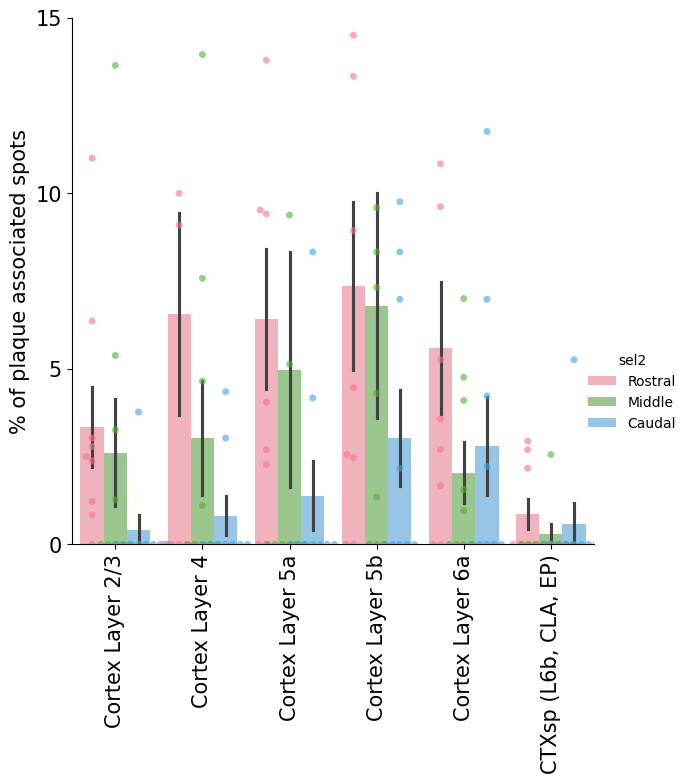

In [219]:
import seaborn as sns

# Custom color palette
custom_palette = sns.color_palette("husl", 3)  # Adjust the number of colors as needed

# Draw nested barplot with customizations
g = sns.catplot(
    data=curr, kind="bar", y='plq',
    x="anot", hue="sel2",
    errorbar="se", palette=custom_palette, alpha=.6, height=6,
    order=['Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5a',
           'Cortex Layer 5b', 'Cortex Layer 6a', 'CTXsp (L6b, CLA, EP)'],
    hue_order=['ros', 'mid', 'caud']
)
# Plot swarmplot on top of the barplot
sns.swarmplot(data=curr, x="anot", y='plq',color='grey',hue='sel2', palette=custom_palette, dodge=True, size=5, order=['Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5a',
           'Cortex Layer 5b', 'Cortex Layer 6a', 'CTXsp (L6b, CLA, EP)'],hue_order=['ros', 'mid', 'caud'], alpha=0.6, legend=False)

# Rotate x-axis labels and set label sizes
g.set_xticklabels(rotation=90, size=15)
g.set_yticklabels(size=15)
g.set_axis_labels("", "% of plaque associated spots", size=15)

plt.ylim(0,15)

# Modify the legend labels
new_labels = ["Rostral", "Middle", "Caudal"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.savefig(s_code + 'prac.svg', transparent=True)
# Show the plot
plt.show()


In [220]:
curr = hi_df.groupby(['sample', 'anot', 'sel2']).sum()
curr = pd.DataFrame(np.round((curr['plq'] / curr['hippo']) * 100,2))
curr = curr.rename(columns={0:'plq'})
curr

plq
sample anot             sel2       
030-B  CA1              sup   12.07
       CA3-so/sr        inf    0.00
                        sup    0.00
       CA3-sp           inf    0.00
                        sup    0.00
...                             ...
109-D  CA3-sp           sup    0.00
       Dentate Gyrus-mo inf    0.00
                        sup    0.00
       Dentate Gyrus-sg inf    0.00
                        sup    0.00

[84 rows x 1 columns]

In [212]:
hi_df['anot'].unique()

array(['CA1', 'CA3-sp', 'Dentate Gyrus-mo', 'Dentate Gyrus-sg',
       'CA3-so/sr'], dtype=object)

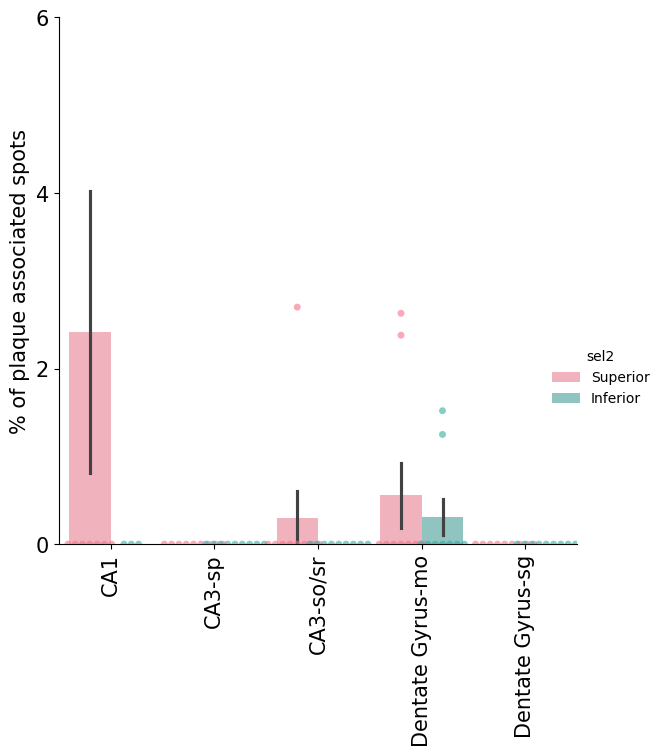

In [221]:
import seaborn as sns

# Custom color palette
custom_palette = sns.color_palette("husl", 2)  # Adjust the number of colors as needed

# Draw nested barplot with customizations
g = sns.catplot(
    data=curr, kind="bar", y='plq',
    x="anot", hue="sel2",
    errorbar="se", palette=custom_palette, alpha=.6, height=6,
    order=['CA1', 'CA3-sp', 'CA3-so/sr','Dentate Gyrus-mo', 'Dentate Gyrus-sg'],
    hue_order=['sup', 'inf']
)
# Plot swarmplot on top of the barplot
sns.swarmplot(data=curr, x="anot", y='plq',color='grey',hue='sel2', palette=custom_palette, dodge=True, size=5, order=['CA1', 'CA3-sp', 'CA3-so/sr','Dentate Gyrus-mo', 'Dentate Gyrus-sg'],hue_order=['sup', 'inf'], alpha=0.6, legend=False)

# Rotate x-axis labels and set label sizes
g.set_xticklabels(rotation=90, size=15)
g.set_yticklabels(size=15)
g.set_axis_labels("", "% of plaque associated spots", size=15)

plt.ylim(0,6)

# Modify the legend labels
new_labels = ["Superior", "Inferior"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.savefig(s_code + 'prac.svg', transparent=True)

# Show the plot
plt.show()


# Compare adjacent slices for gene expression

In [78]:
og_df, og_gene_df = run_('030-B')
clust_lab = og_df['cluster'].values
reg_lab = np.asarray(og_df.groupby('cluster').first()['anot'])

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 12404


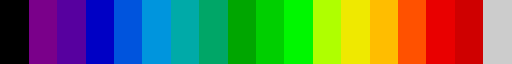

In [79]:
#Choose colormap
cmap = plt.get_cmap("nipy_spectral", len(np.unique(reg_lab))+1)
cmap

In [99]:
distances

array([[21.        , 21.09502311, 21.47091055, ..., 36.7151195 ,
        37.21558813, 37.21558813],
       [21.09502311, 21.09502311, 21.9544984 , ..., 37.21558813,
        38.        , 42.54409477],
       [21.        , 21.09502311, 21.09502311, ..., 37.        ,
        37.21558813, 37.21558813],
       ...,
       [21.        , 21.9544984 , 21.9544984 , ..., 43.        ,
        43.41658669, 43.9089968 ],
       [21.02379604, 21.9544984 , 21.9544984 , ..., 43.01162634,
        43.0464865 , 43.41658669],
       [20.59126028, 21.        , 21.09502311, ..., 37.        ,
        37.21558813, 37.21558813]])

In [100]:
1/distances

array([[0.04761905, 0.04740455, 0.04657464, ..., 0.02723674, 0.02687046,
        0.02687046],
       [0.04740455, 0.04740455, 0.04554875, ..., 0.02687046, 0.02631579,
        0.02350502],
       [0.04761905, 0.04740455, 0.04740455, ..., 0.02702703, 0.02687046,
        0.02687046],
       ...,
       [0.04761905, 0.04554875, 0.04554875, ..., 0.02325581, 0.02303267,
        0.02277438],
       [0.04756515, 0.04554875, 0.04554875, ..., 0.02324953, 0.0232307 ,
        0.02303267],
       [0.04856429, 0.04761905, 0.04740455, ..., 0.02702703, 0.02687046,
        0.02687046]])

In [80]:
name = '030-B'
data_path = s_data + 'spatial_transcriptomics/plaques/' + name + 'X.json'
coord_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/spatial/tissue_positions.csv'
genes_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/filtered_feature_bc_matrix.h5'
meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/allspots_meta.csv') #FILTERED
meta_filt = meta[meta['sample'] == name]

spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, 
                                meta_filt, min_cell_per_gene=100, norm_factor=1e6)

#Sanity check
assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
print('Number of spots: ' + str(gene_df.shape[0]))
print('Number of genes: ' + str(gene_df.shape[1]))

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 12404


In [58]:
#plot and save all samples

xcoord, ycoord = spot_df['array_row'].values, spot_df['array_col'].values
plq_bool = spot_df['plaque'].values == 1


fig,ax = plt.subplots(figsize=(5,5))
for x in range(len(np.unique(clust_lab))): 
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = reg_lab[x], color = cmap(x+1), alpha=1)
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

#remove all borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.savefig(s_fig + 'plaque-clusters-' + name + '.svg', transparent=True)
plt.show()


(2939,)

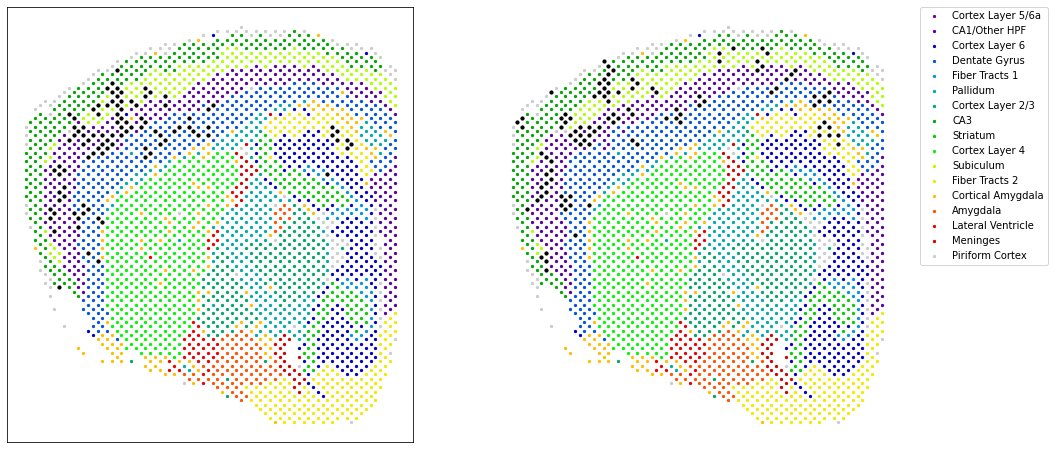

In [84]:
#PLOT PLAQUES
data_l = og_df, spot_df
fig,ax = plt.subplots(1, 2, figsize=(16,8))

for i,data in enumerate(data_l):
    xcoord, ycoord = data['array_row'].values, data['array_col'].values
    plq_bool = data['plaque'].values == 1
    clust_lab = data['cluster'].values
    for x in range(len(np.unique(clust_lab))): 
        ax[i].scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = reg_lab[x], color = cmap(x+1), alpha=1)
    ax[i].scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    ax[i].xaxis.set_tick_params(labelbottom=False)
    ax[i].yaxis.set_tick_params(labelleft=False)
    ax[i].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [127]:
#original ordering of cluster
col_ord = og_df.groupby('cluster').first()['anot']

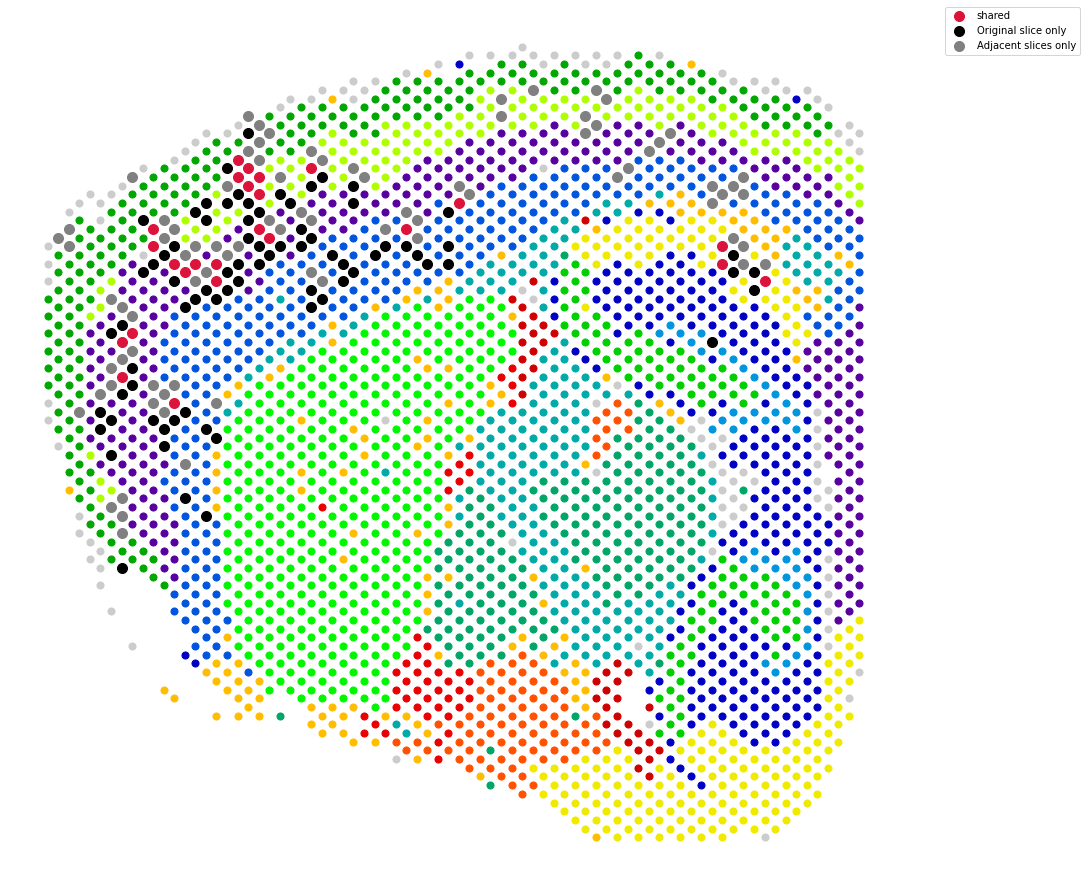

In [553]:
#PLOT OVERLAPPING PLAQUES
og_plq = np.where(og_df['plaque']==1)[0]
new_plq = np.where(spot_df['plaque']==1)[0]
shared = np.intersect1d(og_plq, new_plq)
og_notin = np.setxor1d(og_plq, shared)
new_notin = np.setxor1d(new_plq, shared)

assert len(og_plq) == len(og_notin) + len(shared)
assert len(new_plq) == len(new_notin) + len(shared)
data = og_df

fig,ax = plt.subplots(figsize=(16,16))
xcoord, ycoord = data['array_row'].values, data['array_col'].values
plq_bool = data['plaque'].values == 1
clust_lab = data['cluster'].values
for x in range(len(np.unique(clust_lab))): 
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=50, color = cmap(x+1), alpha=1)

plt.scatter(xcoord[shared], ycoord[shared], s=100, c='crimson', label='shared')
plt.scatter(xcoord[og_notin], ycoord[og_notin], s=100, c='k', label='Original slice only')
plt.scatter(xcoord[new_notin], ycoord[new_notin], s=100, c='grey', label='Adjacent slices only')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(s_fig + 'plaque-overlap.svg', transparent=True)
plt.show()


In [76]:
#find euclidean distance between all points
my_coords = np.vstack((curr_x, curr_y)).T
len(my_coords)

287

In [ ]:
[]

In [341]:
cort_l = 'Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5/6a', 'Cortex Layer 6'

In [433]:
cort_l

('Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5/6a', 'Cortex Layer 6')

In [435]:
clust_lab

array(['Cortex Layer 2/3', 'CA3', 'Cortical Amygdala', ..., 'Pallidum',
       'Meninges', 'Cortex Layer 5/6a'], dtype=object)

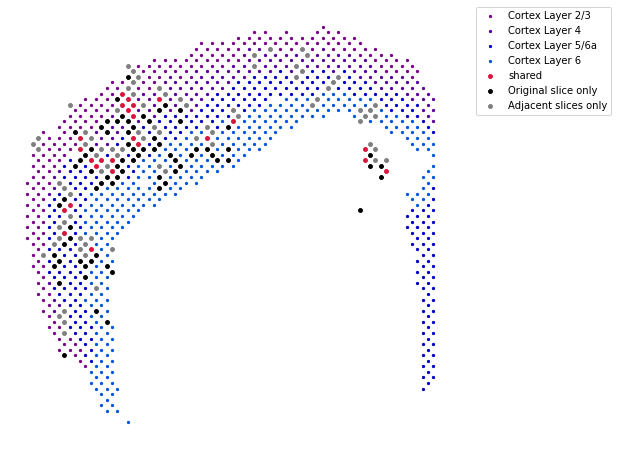

In [436]:
#PLOT OVERLAPPING PLAQUES
og_plq = np.where(og_df['plaque']==1)[0]
new_plq = np.where(spot_df['plaque']==1)[0]
shared = np.intersect1d(og_plq, new_plq)
og_notin = np.setxor1d(og_plq, shared)
new_notin = np.setxor1d(new_plq, shared)

assert len(og_plq) == len(og_notin) + len(shared)
assert len(new_plq) == len(new_notin) + len(shared)
data = og_df

fig,ax = plt.subplots(figsize=(8,8))
xcoord, ycoord = data['array_row'].values, data['array_col'].values
plq_bool = data['plaque'].values == 1
clust_lab = data['anot'].values
for y,x in enumerate(cort_l):
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = x, color = cmap(y+1), alpha=1)

plt.scatter(xcoord[shared], ycoord[shared], s=15, c='crimson', label='shared')
plt.scatter(xcoord[og_notin], ycoord[og_notin], s=15, c='k', label='Original slice only')
plt.scatter(xcoord[new_notin], ycoord[new_notin], s=15, c='grey', label='Adjacent slices only')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [137]:
new_ord_col = [col_v[np.where(np.unique(cat_filt['anot'])[i] == col_ord)[0][0]] for i in range(len(np.unique(cat_filt['anot'])))]
new_ord_col

[(0.0, 0.6510058823529412, 0.40781764705882395, 1.0),
 (0.0, 0.9686352941176471, 0.0, 1.0),
 (0.4784529411764706, 0.0, 0.5450705882352941, 1.0),
 (0.0, 0.0, 0.7725823529411764, 1.0),
 (0.9411470588235293, 0.9176176470588236, 0.0, 1.0),
 (0.6901647058823523, 1.0, 0.0, 1.0)]

<ipython-input-554-ed3b8b8a1c29>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']


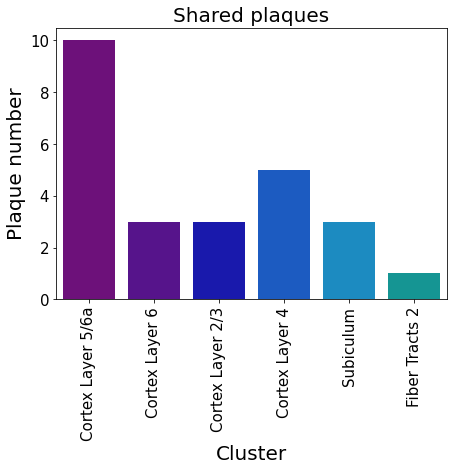

In [554]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()

cat_df = og_df.iloc[shared]
clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
clust_df['region'] = cat_df.groupby('cluster').first()['anot']
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)


fig, ax = plt.subplots(figsize=(7,5))
plt.title('Shared plaques', fontsize=20)
sns.barplot(clust_df, x='region', y= "plaque", palette=col_v)# order=clust_df.sort_values('region', ascending=True).region, palette=z) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-overlap-barplot.svg', transparent=True)
plt.show()

<ipython-input-555-27b705883cfc>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']


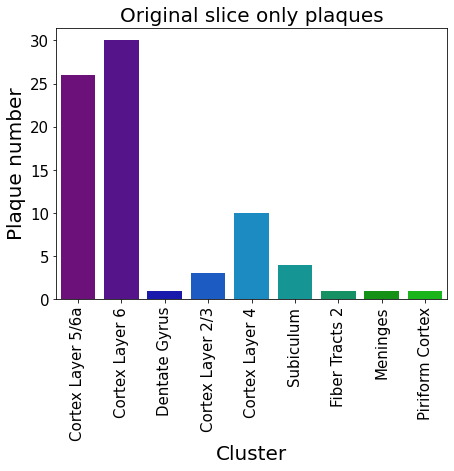

In [555]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()

cat_df = og_df.iloc[og_notin]
clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
clust_df['region'] = cat_df.groupby('cluster').first()['anot']
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Original slice only plaques', fontsize=20)
sns.barplot(clust_df, x='region', y= "plaque",palette=col_v)# order=clust_df.sort_values('region', ascending=True).region, palette=z) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-sliceonly-barplot.svg', transparent=True)
plt.show()

<ipython-input-556-f1dee2f2b8ed>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']


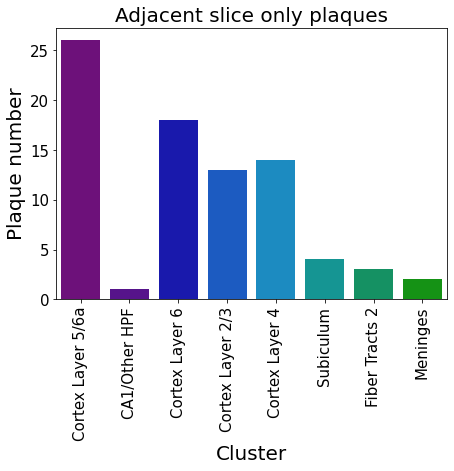

In [556]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()

cat_df = spot_df.iloc[new_notin]
clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
clust_df['region'] = cat_df.groupby('cluster').first()['anot']
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Adjacent slice only plaques', fontsize=20)
sns.barplot(clust_df, x='region', y= "plaque",palette=col_v)# order=clust_df.sort_values('region', ascending=True).region, palette=z) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-adjacentonly-barplot.svg', transparent=True)
plt.show()

In [144]:
#Look at distribution of spots across sample
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
data_l = og_df, spot_df
name_l = 'Original', 'Adjacent'

for x,data in enumerate(data_l):
    data['sample id'] = np.full(len(data), name_l[x])
    cat_df = pd.concat([cat_df, data])


In [145]:
cat_filt = cat_df[cat_df['plaque'] == 1]
cat_filt

barcode in_tissue array_row array_col pxl_row_in_fullres  \
114462  AAAGACCCAAGTCGCG-1         1        10        48                982   
114490  AACACGACTGTACTGA-1         1         9        65                799   
114505  AACCGAGCTTGGTCAT-1         1        24        70                745   
114506  AACCGTTGTGTTTGCT-1         1        12        64                810   
114526  AACTGATATTAGGCCT-1         1        16        66                788   
...                    ...       ...       ...       ...                ...   
117236  TTATATTTGGCAATCC-1         1        26        64                809   
117261  TTCATGGCGCAACAGG-1         1        19        75                691   
117301  TTCTTCCCTTTGATAT-1         1         2        70                746   
117352  TTGGGAAGACGAGCCG-1         1        68        64                807   
117354  TTGGGCGGCGGTTGCC-1         1        30        76                680   

       pxl_col_in_fullres  plaque  cluster               anot sample id  
114462                637       1        3     Cortex Layer 6  Original  
114490                617       1        1  Cortex Layer 5/6a  Original  
114505                897       1        1  Cortex Layer 5/6a  Original  
114506                674       1        1  Cortex Layer 5/6a  Original  
114526                748       1        1  Cortex Layer 5/6a  Original  
...                   ...     ...      ...                ...       ...  
117236                935       1        3     Cortex Layer 6  Adjacent  
117261                804       1       10     Cortex Layer 4  Adjacent  
117301                486       1        7   Cortex Layer 2/3  Adjacent  
117352               1720       1       11          Subiculum  Adjacent  
117354               1009       1       10     Cortex Layer 4  Adjacent  

[208 rows x 10 columns]

In [121]:
new_ord_col = [col_v[np.where(np.unique(cat_filt['anot'])[i] == cat_df.groupby('cluster').first()['anot'])[0][0]] for i in range(len(np.unique(cat_filt['anot'])))]
new_ord_col

[(0.3450764705882353, 0.0, 0.6235411764705882, 1.0),
 (0.0, 0.6510058823529412, 0.40781764705882395, 1.0),
 (0.0, 0.9686352941176471, 0.0, 1.0),
 (0.4784529411764706, 0.0, 0.5450705882352941, 1.0),
 (0.0, 0.0, 0.7725823529411764, 1.0),
 (0.0, 0.329435294117647, 0.8667, 1.0),
 (0.9411470588235293, 0.9176176470588236, 0.0, 1.0),
 (0.8117705882352941, 0.0, 0.0, 1.0),
 (0.8, 0.8, 0.8, 1.0),
 (0.6901647058823523, 1.0, 0.0, 1.0)]

<ipython-input-557-19a54b62beaa>:2: UserWarning: The palette list has more values (17) than needed (10), which may not be intended.
  sns.histplot(cat_filt, x="sample id", hue="anot", hue_order = np.unique(cat_filt['anot']),palette=col_v, stat='probability', multiple="fill", shrink=.8)


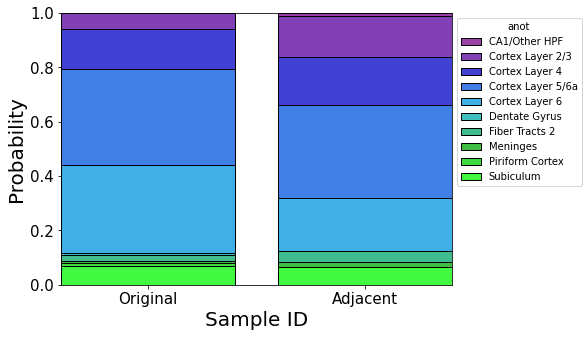

In [557]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(cat_filt, x="sample id", hue="anot", hue_order = np.unique(cat_filt['anot']),palette=col_v, stat='probability', multiple="fill", shrink=.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Sample ID', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=0)
plt.savefig(s_fig + 'plaque-overlap-propplot.svg', transparent=True)
plt.show()


In [169]:
## Correlate gene expression
og_filt = og_gene_df.loc[(og_df['plaque'] == 1).values]
new_filt = gene_df.loc[(spot_df['plaque'] == 1).values]
no_filt = gene_df.loc[(spot_df['plaque'] == 0).values]
og_filt

Sox17      Mrpl15      Lypla1       Tcea1       Rgs20  \
AAAGACCCAAGTCGCG-1    0.0   66.577896    0.000000  199.733688    0.000000   
AACACGACTGTACTGA-1    0.0   74.537865   74.537865    0.000000    0.000000   
AACCGAGCTTGGTCAT-1    0.0    0.000000    0.000000    0.000000    0.000000   
AACCGTTGTGTTTGCT-1    0.0    0.000000   81.294205    0.000000    0.000000   
AACTGATATTAGGCCT-1    0.0    0.000000    0.000000    0.000000    0.000000   
...                   ...         ...         ...         ...         ...   
TTAATCAGTACGTCAG-1    0.0   63.799919   63.799919   63.799919  127.599838   
TTCATGGCGCAACAGG-1    0.0  104.047455   34.682484   69.364967    0.000000   
TTCGGTACTGTAGAGG-1    0.0    0.000000    0.000000    0.000000    0.000000   
TTGGGAAGACGAGCCG-1    0.0  242.522232  242.522232  161.681488   80.840744   
TTGTTTGTGTAAATTC-1    0.0    0.000000    0.000000   68.704910    0.000000   

                       Atp6v1h  Oprk1      Rb1cc1  St18      Pcmtd1  ...  \
AAAGACCCAAGTCGCG-1    0.000000    0.0   66.577896   0.0   66.577896  ...   
AACACGACTGTACTGA-1    0.000000    0.0   74.537865   0.0    0.000000  ...   
AACCGAGCTTGGTCAT-1  283.559235    0.0  170.135529   0.0   56.711845  ...   
AACCGTTGTGTTTGCT-1  162.588409    0.0    0.000000   0.0    0.000000  ...   
AACTGATATTAGGCCT-1    0.000000    0.0  192.752502   0.0   64.250832  ...   
...                        ...    ...         ...   ...         ...  ...   
TTAATCAGTACGTCAG-1  127.599838    0.0  127.599838   0.0    0.000000  ...   
TTCATGGCGCAACAGG-1  208.094910    0.0    0.000000   0.0  173.412415  ...   
TTCGGTACTGTAGAGG-1  469.836487    0.0    0.000000   0.0   93.967300  ...   
TTGGGAAGACGAGCCG-1  161.681488    0.0  161.681488   0.0   80.840744  ...   
TTGTTTGTGTAAATTC-1  206.114731    0.0  274.819641   0.0  137.409821  ...   

                       mt-Nd4l        mt-Nd4       mt-Nd5      mt-Nd6  \
AAAGACCCAAGTCGCG-1  532.623169   8788.282227  1464.713745  133.155792   
AACACGACTGTACTGA-1  447.227173  17814.548828  2012.522339   74.537865   
AACCGAGCTTGGTCAT-1  283.559235  10378.267578  1587.931641   56.711845   
AACCGTTGTGTTTGCT-1  243.882614   7153.890137   975.530457    0.000000   
AACTGATATTAGGCCT-1  257.003326  13364.172852  1991.775757    0.000000   
...                        ...           ...          ...         ...   
TTAATCAGTACGTCAG-1  255.199677  10016.586914  1594.997925  191.399750   
TTCATGGCGCAACAGG-1  485.554779  14115.770508  1907.536621   34.682484   
TTCGGTACTGTAGAGG-1  375.869202  14283.029297  1597.444092    0.000000   
TTGGGAAGACGAGCCG-1  404.203735  18270.007812  2344.381592  161.681488   
TTGTTTGTGTAAATTC-1  137.409821   9549.982422  1580.212891    0.000000   

                         mt-Cytb  CAAA01118383.1       Vamp7      Spry3  \
AAAGACCCAAGTCGCG-1  14580.559570        0.000000   66.577896  66.577896   
AACACGACTGTACTGA-1  23703.041016       74.537865    0.000000   0.000000   
AACCGAGCTTGGTCAT-1  16106.164062        0.000000   56.711845  56.711845   
AACCGTTGTGTTTGCT-1  12681.895508        0.000000    0.000000   0.000000   
AACTGATATTAGGCCT-1  16319.710938        0.000000   64.250832   0.000000   
...                          ...             ...         ...        ...   
TTAATCAGTACGTCAG-1  15120.581055        0.000000   63.799919   0.000000   
TTCATGGCGCAACAGG-1  18208.304688        0.000000    0.000000   0.000000   
TTCGGTACTGTAGAGG-1  16914.113281        0.000000   93.967300   0.000000   
TTGGGAAGACGAGCCG-1  21665.320312        0.000000    0.000000   0.000000   
TTGTTTGTGTAAATTC-1  14702.850586        0.000000  137.409821   0.000000   

                    Tmlhe  AC149090.1  
AAAGACCCAAGTCGCG-1    0.0  266.311584  
AACACGACTGTACTGA-1    0.0  149.075729  
AACCGAGCTTGGTCAT-1    0.0  226.847382  
AACCGTTGTGTTTGCT-1    0.0    0.000000  
AACTGATATTAGGCCT-1    0.0    0.000000  
...                   ...         ...  
TTAATCAGTACGTCAG-1    0.0  382.799500  
TTCATGGCGCAACAGG-1    0.0  277.459869  
TTCGGTACTGTAGAGG-1    0.0   93.967300  
TTGG

In [160]:
new_filt

Sox17      Mrpl15      Lypla1       Tcea1      Rgs20  \
AAAGTCACTGATGTAA-1    0.0    0.000000   55.361790  166.085373   0.000000   
AACTGATATTAGGCCT-1    0.0    0.000000    0.000000    0.000000   0.000000   
AATCGGGACACTACGA-1    0.0  337.609741    0.000000    0.000000   0.000000   
AATTCGATTCGAGGAT-1    0.0    0.000000    0.000000  147.666870   0.000000   
ACACACTTTCTACACG-1    0.0  305.841553    0.000000    0.000000   0.000000   
...                   ...         ...         ...         ...        ...   
TTATATTTGGCAATCC-1    0.0    0.000000    0.000000   74.638008   0.000000   
TTCATGGCGCAACAGG-1    0.0  104.047455   34.682484   69.364967   0.000000   
TTCTTCCCTTTGATAT-1    0.0    0.000000   85.048477    0.000000   0.000000   
TTGGGAAGACGAGCCG-1    0.0  242.522232  242.522232  161.681488  80.840744   
TTGGGCGGCGGTTGCC-1    0.0  213.113586   71.037865  142.075729   0.000000   

                       Atp6v1h  Oprk1      Rb1cc1       St18      Pcmtd1  ...  \
AAAGTCACTGATGTAA-1   55.361790    0.0  166.085373   0.000000   55.361790  ...   
AACTGATATTAGGCCT-1    0.000000    0.0  192.752502   0.000000   64.250832  ...   
AATCGGGACACTACGA-1  225.073151    0.0  112.536575   0.000000    0.000000  ...   
AATTCGATTCGAGGAT-1    0.000000    0.0    0.000000   0.000000  147.666870  ...   
ACACACTTTCTACACG-1  203.894379    0.0    0.000000   0.000000  101.947189  ...   
...                        ...    ...         ...        ...         ...  ...   
TTATATTTGGCAATCC-1   74.638008    0.0    0.000000   0.000000   74.638008  ...   
TTCATGGCGCAACAGG-1  208.094910    0.0    0.000000   0.000000  173.412415  ...   
TTCTTCCCTTTGATAT-1  170.096954    0.0    0.000000   0.000000   85.048477  ...   
TTGGGAAGACGAGCCG-1  161.681488    0.0  161.681488   0.000000   80.840744  ...   
TTGGGCGGCGGTTGCC-1  213.113586    0.0  142.075729  71.037865  142.075729  ...   

                       mt-Nd4l        mt-Nd4       mt-Nd5      mt-Nd6  \
AAAGTCACTGATGTAA-1  221.447159   7141.670898   719.703247  110.723579   
AACTGATATTAGGCCT-1  257.003326  13364.172852  1991.775757    0.000000   
AATCGGGACACTACGA-1  225.073151  12379.023438  2025.658325    0.000000   
AATTCGATTCGAGGAT-1  147.666870  10632.014648  1772.002441  147.666870   
ACACACTTTCTACACG-1  203.894379   5097.359375  1019.471924    0.000000   
...                        ...           ...          ...         ...   
TTATATTTGGCAATCC-1  597.104065   9031.199219   821.018066   74.638008   
TTCATGGCGCAACAGG-1  485.554779  14115.770508  1907.536621   34.682484   
TTCTTCCCTTTGATAT-1  425.242371  11821.738281  1615.921021   85.048477   
TTGGGAAGACGAGCCG-1  404.203735  18270.007812  2344.381592  161.681488   
TTGGGCGGCGGTTGCC-1  142.075729   7743.127441  1136.605835   71.037865   

                         mt-Cytb  CAAA01118383.1       Vamp7       Spry3  \
AAAGTCACTGATGTAA-1  10961.634766             0.0    0.000000    0.000000   
AACTGATATTAGGCCT-1  16319.710938             0.0   64.250832    0.000000   
AATCGGGACACTACGA-1  20256.583984             0.0    0.000000    0.000000   
AATTCGATTCGAGGAT-1  12256.350586             0.0  147.666870    0.000000   
ACACACTTTCTACACG-1  10092.771484             0.0  101.947189  101.947189   
...                          ...             ...         ...         ...   
TTATATTTGGCAATCC-1  11792.805664             0.0    0.000000    0.000000   
TTCATGGCGCAACAGG-1  18208.304688             0.0    0.000000    0.000000   
TTCTTCCCTTTGATAT-1  20921.925781             0.0    0.000000    0.000000   
TTGGGAAGACGAGCCG-1  21665.320312             0.0    0.000000    0.000000   
TTGGGCGGCGGTTGCC-1  10868.792969             0.0    0.000000    0.000000   

                    Tmlhe  AC149090.1  
AAAGTCACTGATGTAA-1    0.0  387.532532  
AACTGATATTAGGCCT-1    0.0    0.000000  
AATCGGGACACTACGA-1    0.0  225.073151  
AATTCGATTCGAGGAT-1    0.0  147.666870  
ACACACTTTCTACACG-1    0.0  101.947189  
...                   ...         ...  
TTATATTTGGCAATCC-1    0.0   74.638008  
TTCATGGCGCAACAGG-1    0.

In [170]:
new_m = np.asarray(new_filt)
old_m = np.asarray(og_filt)
no_m = np.asarray(no_filt)
new_m.shape, old_m.shape

((106, 12404), (102, 12404))

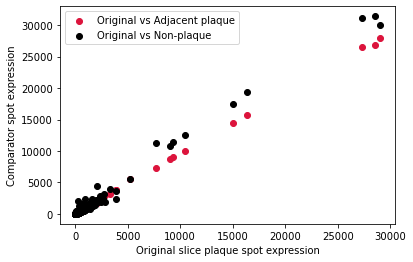

In [174]:
plt.scatter(np.mean(old_m, axis=0),np.mean(new_m, axis=0), c='crimson', label = 'Original vs Adjacent plaque')
plt.scatter(np.mean(old_m, axis=0),np.mean(no_m, axis=0), c='k', label = 'Original vs Non-plaque')
plt.xlabel('Original slice plaque spot expression')
plt.ylabel('Comparator spot expression')
plt.legend()
plt.show()

In [321]:
## Filter by non-overlapping spots
og_filt = og_gene_df.loc[(og_df['plaque'] == 1).values]
new_filt = gene_df.loc[(spot_df['plaque'] == 1).values]
no_filt = gene_df.loc[(spot_df['plaque'] == 0).values]
og_filt

Sox17      Mrpl15      Lypla1       Tcea1       Rgs20  \
AAAGACCCAAGTCGCG-1    0.0   66.577896    0.000000  199.733688    0.000000   
AACACGACTGTACTGA-1    0.0   74.537865   74.537865    0.000000    0.000000   
AACCGAGCTTGGTCAT-1    0.0    0.000000    0.000000    0.000000    0.000000   
AACCGTTGTGTTTGCT-1    0.0    0.000000   81.294205    0.000000    0.000000   
AACTGATATTAGGCCT-1    0.0    0.000000    0.000000    0.000000    0.000000   
...                   ...         ...         ...         ...         ...   
TTAATCAGTACGTCAG-1    0.0   63.799919   63.799919   63.799919  127.599838   
TTCATGGCGCAACAGG-1    0.0  104.047455   34.682484   69.364967    0.000000   
TTCGGTACTGTAGAGG-1    0.0    0.000000    0.000000    0.000000    0.000000   
TTGGGAAGACGAGCCG-1    0.0  242.522232  242.522232  161.681488   80.840744   
TTGTTTGTGTAAATTC-1    0.0    0.000000    0.000000   68.704910    0.000000   

                       Atp6v1h  Oprk1      Rb1cc1  St18      Pcmtd1  ...  \
AAAGACCCAAGTCGCG-1    0.000000    0.0   66.577896   0.0   66.577896  ...   
AACACGACTGTACTGA-1    0.000000    0.0   74.537865   0.0    0.000000  ...   
AACCGAGCTTGGTCAT-1  283.559235    0.0  170.135529   0.0   56.711845  ...   
AACCGTTGTGTTTGCT-1  162.588409    0.0    0.000000   0.0    0.000000  ...   
AACTGATATTAGGCCT-1    0.000000    0.0  192.752502   0.0   64.250832  ...   
...                        ...    ...         ...   ...         ...  ...   
TTAATCAGTACGTCAG-1  127.599838    0.0  127.599838   0.0    0.000000  ...   
TTCATGGCGCAACAGG-1  208.094910    0.0    0.000000   0.0  173.412415  ...   
TTCGGTACTGTAGAGG-1  469.836487    0.0    0.000000   0.0   93.967300  ...   
TTGGGAAGACGAGCCG-1  161.681488    0.0  161.681488   0.0   80.840744  ...   
TTGTTTGTGTAAATTC-1  206.114731    0.0  274.819641   0.0  137.409821  ...   

                       mt-Nd4l        mt-Nd4       mt-Nd5      mt-Nd6  \
AAAGACCCAAGTCGCG-1  532.623169   8788.282227  1464.713745  133.155792   
AACACGACTGTACTGA-1  447.227173  17814.548828  2012.522339   74.537865   
AACCGAGCTTGGTCAT-1  283.559235  10378.267578  1587.931641   56.711845   
AACCGTTGTGTTTGCT-1  243.882614   7153.890137   975.530457    0.000000   
AACTGATATTAGGCCT-1  257.003326  13364.172852  1991.775757    0.000000   
...                        ...           ...          ...         ...   
TTAATCAGTACGTCAG-1  255.199677  10016.586914  1594.997925  191.399750   
TTCATGGCGCAACAGG-1  485.554779  14115.770508  1907.536621   34.682484   
TTCGGTACTGTAGAGG-1  375.869202  14283.029297  1597.444092    0.000000   
TTGGGAAGACGAGCCG-1  404.203735  18270.007812  2344.381592  161.681488   
TTGTTTGTGTAAATTC-1  137.409821   9549.982422  1580.212891    0.000000   

                         mt-Cytb  CAAA01118383.1       Vamp7      Spry3  \
AAAGACCCAAGTCGCG-1  14580.559570        0.000000   66.577896  66.577896   
AACACGACTGTACTGA-1  23703.041016       74.537865    0.000000   0.000000   
AACCGAGCTTGGTCAT-1  16106.164062        0.000000   56.711845  56.711845   
AACCGTTGTGTTTGCT-1  12681.895508        0.000000    0.000000   0.000000   
AACTGATATTAGGCCT-1  16319.710938        0.000000   64.250832   0.000000   
...                          ...             ...         ...        ...   
TTAATCAGTACGTCAG-1  15120.581055        0.000000   63.799919   0.000000   
TTCATGGCGCAACAGG-1  18208.304688        0.000000    0.000000   0.000000   
TTCGGTACTGTAGAGG-1  16914.113281        0.000000   93.967300   0.000000   
TTGGGAAGACGAGCCG-1  21665.320312        0.000000    0.000000   0.000000   
TTGTTTGTGTAAATTC-1  14702.850586        0.000000  137.409821   0.000000   

                    Tmlhe  AC149090.1  
AAAGACCCAAGTCGCG-1    0.0  266.311584  
AACACGACTGTACTGA-1    0.0  149.075729  
AACCGAGCTTGGTCAT-1    0.0  226.847382  
AACCGTTGTGTTTGCT-1    0.0    0.000000  
AACTGATATTAGGCCT-1    0.0    0.000000  
...                   ...         ...  
TTAATCAGTACGTCAG-1    0.0  382.799500  
TTCATGGCGCAACAGG-1    0.0  277.459869  
TTCGGTACTGTAGAGG-1    0.0   93.967300  
TTGG

In [356]:
cort_l

('Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5/6a', 'Cortex Layer 6')

In [392]:
#filter plaques and cortex only
cort_i = []
for i in cort_l:
    cort_i = np.append(cort_i, np.where(spot_df['anot']==i))

og_plq = np.intersect1d(np.where(og_df['plaque']==1)[0], cort_i)
new_plq = np.intersect1d(np.where(spot_df['plaque']==1)[0], cort_i)
no_plq = np.intersect1d(np.where(spot_df['plaque']==0)[0], cort_i)

shared = np.intersect1d(og_plq, new_plq)
og_notin = np.setxor1d(og_plq, shared)
new_notin = np.setxor1d(new_plq, shared)


In [393]:
og_v = np.asarray(og_gene_df.iloc[og_notin])
new_v = np.asarray(gene_df.iloc[new_notin])
no_v = np.asarray(gene_df.iloc[no_plq])
no_v.shape, og_v.shape, new_v.shape

((945, 12404), (69, 12404), (71, 12404))

In [394]:
# perform PCA on og_v
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
og_sc = scaler.fit_transform(og_v)
new_sc = scaler.fit_transform(new_v)
no_sc = scaler.fit_transform(no_v)

pca = PCA(n_components=3)
pca.fit(no_sc)
og_pca = pca.transform(og_sc)
new_pca = pca.transform(new_sc)
no_pca = pca.transform(no_sc)

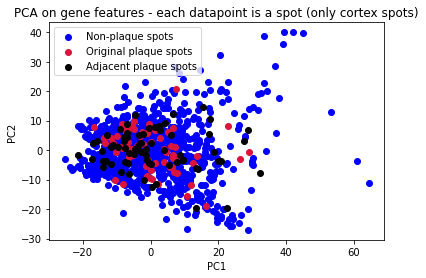

In [562]:
plt.title('PCA on gene features - each datapoint is a spot (only cortex spots)')
plt.scatter(no_pca[:,0], no_pca[:,1], c='b', label = 'Non-plaque spots')
plt.scatter(og_pca[:,0], og_pca[:,1], c='crimson', label = 'Original plaque spots')
plt.scatter(new_pca[:,0], new_pca[:,1], c='k', label = 'Adjacent plaque spots')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig(s_fig + 'plaque-pca.svg', transparent=True)
plt.show()

In [402]:
no_v.shape, og_v.shape, new_v.shape

((945, 12404), (69, 12404), (71, 12404))

In [400]:
# Calculate correlations across plaque spots
plaq_c = np.corrcoef(og_v, new_v)[:new_v.shape[0],new_v.shape[0]:]
plaq_ = np.ravel(plaq_c)
print(plaq_c.shape)

# Calculate correlations plaque - no plaque spots
noplaq_c = np.corrcoef(no_v, new_v)[:new_v.shape[0],new_v.shape[0]:]
noplaq_ = np.ravel(noplaq_c)
print(noplaq_c.shape)

(71, 69)
(71, 945)


In [403]:
np.mean(plaq_), np.mean(noplaq_)

(0.9472961594243551, 0.9411425100557002)

In [564]:
df=pd.DataFrame()
df['correlation'] = np.append(plaq_, noplaq_)
df['plaque'] = np.append(np.full(len(plaq_), 1), np.full(len(noplaq_), 0))
df

correlation  plaque
0         0.951684       1
1         0.971555       1
2         0.961224       1
3         0.972828       1
4         0.874705       1
...            ...     ...
71989     0.967256       0
71990     0.959363       0
71991     0.932952       0
71992     0.971607       0
71993     0.945180       0

[71994 rows x 2 columns]

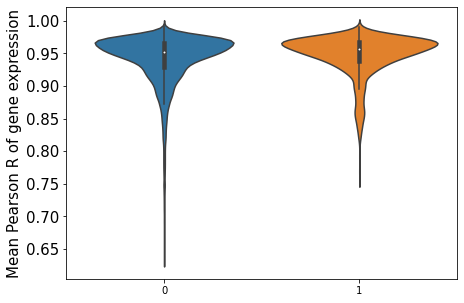

In [570]:
fig,ax = plt.subplots(figsize=(7,5))
sns.violinplot(data=df, x="plaque", y="correlation", jitter=0.2, alpha=0.5)
#
ax.set(xlabel=None)
#plt.xticks([0,1], ['Adjacent plaque - Non-plaque spots', 'Adjacent - Original plaque spots'], fontsize=15)
#plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Mean Pearson R of gene expression', fontsize=15)
plt.savefig(s_fig + 'plaque-correlation.svg', transparent=True)
plt.show()

In [421]:
## COMPARE DE GENES
#filter plaques and cortex only
cort_i = []
for i in cort_l:
    cort_i = np.append(cort_i, np.where(spot_df['anot']==i))

og_plq = np.intersect1d(np.where(og_df['plaque']==1)[0], cort_i)
no_plq_og = np.intersect1d(np.where(og_df['plaque']==0)[0], cort_i)

new_plq = np.intersect1d(np.where(spot_df['plaque']==1)[0], cort_i)
no_plq_new = np.intersect1d(np.where(spot_df['plaque']==0)[0], cort_i)

plq_og_v = np.asarray(og_gene_df.iloc[og_plq])
no_og_v = np.asarray(og_gene_df.iloc[no_plq_og])

plq_new_v = np.asarray(gene_df.iloc[new_plq])
no_new_v = np.asarray(gene_df.iloc[no_plq_new])

plq_og_v.shape, no_og_v.shape, plq_new_v.shape, no_new_v.shape

((90, 12404), (947, 12404), (92, 12404), (945, 12404))

In [425]:
name_i = gene_df.columns.values
name_i.shape

(12404,)

In [594]:
# Find DE genes in original section
data1,data2=plq_og_v, no_og_v

import scipy
# Wilcoxon signed rank test
mwu = ([scipy.stats.mannwhitneyu(data1[:,i], data2[:,i], alternative='two-sided') for i in range(data1.shape[1])])
p_vals = np.vstack(mwu)[:,1]
# # sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_vals, 0.05, 'indep') #Use Benjamini hochberg FDR test 
sig_genes = name_i[sig_v]


In [603]:
np.intersect1d(sig_genes, new_sig_genes)

array(['B2m', 'C1qa', 'C4b', 'Ctsd', 'Ctss', 'Gfap', 'H2-Aa', 'H2-D1',
       'Ifi27l2a', 'Lgals3bp', 'Ly6h', 'Ncdn', 'Serpina3n', 'Tyrobp'],
      dtype=object)

In [601]:
np.sort(sig_genes)

array(['Atp2b4', 'B2m', 'C1qa', 'C4b', 'Cabp7', 'Ccl12', 'Cox6a1', 'Ctsd',
       'Ctss', 'Flt3l', 'Fth1', 'Gfap', 'H2-Aa', 'H2-D1', 'H2-K1',
       'Hist1h1c', 'Ifi27l2a', 'Lair1', 'Lgals3bp', 'Ly6e', 'Ly6h',
       'Mapk1', 'Meg3', 'Mfge8', 'Mmp17', 'Ncdn', 'Nmnat2', 'Pcp4',
       'Prss23', 'Rapgef4', 'Serpina3n', 'Spred2', 'Thra', 'Trbc2',
       'Tspan7', 'Tyrobp'], dtype=object)

In [602]:
np.sort(new_sig_genes)

array(['Anxa3', 'Asb2', 'B2m', 'Bst2', 'C1qa', 'C1qb', 'C1qc', 'C4b',
       'Ccl5', 'Cd44', 'Cd52', 'Cd68', 'Cd74', 'Cd84', 'Cela1', 'Chl1',
       'Cmtm6', 'Coa5', 'Csf3r', 'Cst7', 'Ctsb', 'Ctsd', 'Ctsl', 'Ctss',
       'Cxcl16', 'Dhrs1', 'Efna5', 'Fcer1g', 'Fcrls', 'Ftl1', 'Fxyd1',
       'Gfap', 'Gpcpd1', 'Gpr34', 'H2-Aa', 'H2-Ab1', 'H2-D1', 'Hexb',
       'Ifi27', 'Ifi27l2a', 'Ifit3', 'Ifitm3', 'Irgm1', 'Isg15', 'Klk6',
       'Lgals3bp', 'Ly6h', 'Ly86', 'Lyz2', 'Mpeg1', 'Ncdn', 'Ncf2',
       'Nek6', 'Olfml3', 'Pole3', 'Ppip5k2', 'Ptpn6', 'Pycard', 'S100a6',
       'Serpina3n', 'Sparc', 'Tagln2', 'Tnfaip8l2', 'Trem2', 'Tyrobp',
       'Vim', 'Zfp809'], dtype=object)

In [596]:
#Volcano plot
lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])
value1 = np.asarray([np.mean(data1[:,i]) for i in range(data1.shape[1])])
value2 = np.asarray([np.mean(data2[:,i]) for i in range(data2.shape[1])])
df = {'GeneNames': np.array(name_i), 'plaque': value1, 'no plaque':value2, 'log2FC': lgf2, 'p-value': adj_p_vals}
df = pd.DataFrame(df)

#Find top n DE genes
sorted = np.sort(adj_p_vals)[:10]
top_n = [df['GeneNames'].iloc[np.where(adj_p_vals == i)[0][0]] for i in sorted]
df


<ipython-input-596-cf7c8e993681>:2: RuntimeWarning: divide by zero encountered in log2
  lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])


GeneNames      plaque   no plaque    log2FC   p-value
0               Sox17    9.626844    4.985401  0.949354  0.621706
1              Mrpl15   40.853493   51.272083 -0.327714  0.756761
2              Lypla1   34.528564   39.779110 -0.204221  0.766850
3               Tcea1   74.593124   74.728897 -0.002624  0.903044
4               Rgs20   36.618835   34.037273  0.105470  0.942611
...               ...         ...         ...       ...       ...
12399  CAAA01118383.1    8.049618    8.058754 -0.001636  0.906167
12400           Vamp7   43.984745   37.730717  0.221264  0.808954
12401           Spry3    6.129004    7.231562 -0.238655  0.919539
12402           Tmlhe    4.115935    3.195363  0.365240  0.863636
12403      AC149090.1  276.307739  278.841705 -0.013170  0.985902

[12404 rows x 5 columns]

In [538]:
top_n

['H2-D1',
 'B2m',
 'Gfap',
 'Lgals3bp',
 'Ly6e',
 'Ifi27l2a',
 'Ifi27l2a',
 'Ctss',
 'Pcp4',
 'Cox6a1']

In [597]:
#from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=df, dim = (10,8), color = ('red', 'grey', 'green') , lfc='log2FC', pv='p-value', 
                            gstyle=1, geneid = 'GeneNames', lfc_thr=(0.5,0.5), valpha = 0.8, 
                            genenames = tuple(top_n), sign_line=True
                             ,plotlegend=True, legendpos='upper left',
                             axtickfontsize = 25, axtickfontname='sans',axlabelfontsize=25, dotsize = 25, gfont=15, figtype='png')
    
                            

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/ticker.py:536: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [598]:
# Find DE genes in original section
data1,data2=plq_new_v, no_new_v

import scipy
# Wilcoxon signed rank test
mwu = ([scipy.stats.mannwhitneyu(data1[:,i], data2[:,i], alternative='two-sided') for i in range(data1.shape[1])])
p_vals = np.vstack(mwu)[:,1]
# # sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_vals, 0.05, 'indep') #Use Benjamini hochberg FDR test 
new_sig_genes = name_i[sig_v]


In [591]:
#Volcano plot
lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])
value1 = np.asarray([np.mean(data1[:,i]) for i in range(data1.shape[1])])
value2 = np.asarray([np.mean(data2[:,i]) for i in range(data2.shape[1])])
df = {'GeneNames': np.array(name_i), 'plaque': value1, 'no plaque':value2, 'log2FC': lgf2, 'p-value': adj_p_vals}
df = pd.DataFrame(df)

#Find top n DE genes
sorted = np.sort(adj_p_vals)[:10]
top_n = [df['GeneNames'].iloc[np.where(adj_p_vals == i)[0][0]] for i in sorted]
df


<ipython-input-591-cf7c8e993681>:2: RuntimeWarning: divide by zero encountered in log2
  lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])


GeneNames      plaque   no plaque    log2FC   p-value
0               Sox17    4.711431    5.454115 -0.211180  0.983591
1              Mrpl15   51.871559   50.221474  0.046639  0.995621
2              Lypla1   46.373020   38.637112  0.263298  0.907690
3               Tcea1   62.580536   75.898659 -0.278360  0.700067
4               Rgs20   38.617672   33.837215  0.190650  0.948626
...               ...         ...         ...       ...       ...
12399  CAAA01118383.1    6.352973    8.223949 -0.372400  0.919022
12400           Vamp7   37.901993   38.309662 -0.015435  0.985376
12401           Spry3    5.804730    7.265466 -0.323826  0.904473
12402           Tmlhe    2.097820    3.389888 -0.692347  0.912611
12403      AC149090.1  281.548584  278.336884  0.016552  0.979186

[12404 rows x 5 columns]

In [593]:
#from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=df, dim = (10,8), color = ('red', 'grey', 'green') , lfc='log2FC', pv='p-value', 
                            gstyle=1, geneid = 'GeneNames', lfc_thr=(0.5,0.5), valpha = 0.8, 
                            genenames = tuple(top_n), sign_line=True
                             ,plotlegend=True, legendpos='upper left',
                             axtickfontsize = 25, axtickfontname='sans',axlabelfontsize=25, dotsize = 25, gfont=15, figtype='png')
    
                            

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/ticker.py:536: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [547]:
np.sort(np.intersect1d(new_sig_genes, sig_genes))

array(['B2m', 'C1qa', 'C4b', 'Ctsd', 'Ctss', 'Gfap', 'H2-Aa', 'H2-D1',
       'Ifi27l2a', 'Lgals3bp', 'Ly6h', 'Ncdn', 'Serpina3n', 'Tyrobp'],
      dtype=object)

# Correlate APP expression with plaque levels

In [15]:
np.append(gene_all, gene_df['humanAPP'].values)

array([594.2948 , 953.113  , 198.62947, ..., 135.54422, 216.73952,
       229.06883], dtype=float32)

In [16]:
#group data together
name_l = '030-B', '030-C', '040-A', '040-C', '040-D'

for name in name_l:
    spot_df, gene_df = run_(name)
    if name == name_l[0]: 
        gene_all = gene_df['humanAPP'].values
        lab = spot_df['plaque']
        name_all = np.repeat(name, len(gene_df['humanAPP'].values))
    else: 
        gene_all = np.append(gene_all, gene_df['humanAPP'].values)
        lab = np.hstack((lab, spot_df['plaque']))
        name_all = np.hstack((name_all, np.repeat(name, len(gene_df['humanAPP'].values))))

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3532
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3465
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3616
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3457
Number of genes: 32285


In [68]:
df = pd.DataFrame({'human APP CPMs': gene_all, 'plaque': lab, 'sample': name_all})
df

human APP CPMs  plaque sample
0          594.294800       0  030-B
1          953.112976       0  030-B
2          198.629471       0  030-B
3          285.861298       0  030-B
4          195.121948       0  030-B
...               ...     ...    ...
17004      366.193054       0  040-D
17005      429.397186       0  040-D
17006      365.020599       0  040-D
17007      730.239502       0  040-D
17008      269.966248       0  040-D

[17009 rows x 3 columns]

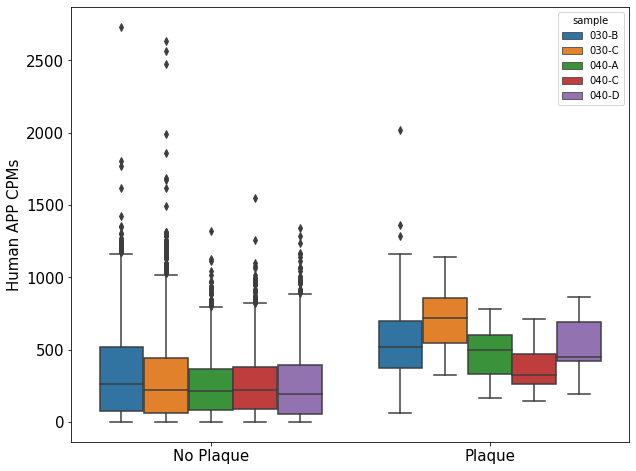

In [78]:
import seaborn as sns
# Correlate human APP expression with plaque load -- treat each spot independently
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x = 'plaque', y ='human APP CPMs', hue = 'sample')
#set label names and size
ax.set_ylabel('Human APP CPMs', fontsize=15)
#remove x label
ax.set_xlabel('')
#change x tick names
ax.set_xticklabels(['No Plaque', 'Plaque'], fontsize=15)
#increase y tick size
ax.tick_params(axis='y', labelsize=15)
plt.show()

In [86]:
i=0
df['human APP CPMs'].iloc[np.where((df['plaque'] == 0) & (df['sample'] == name_l[i]))[0]].values

array([594.2948 , 953.113  , 198.62947, ..., 937.20715, 201.57227,
         0.     ], dtype=float32)

In [89]:
# significant test
from scipy.stats import mannwhitneyu
# Wilcoxon signed rank test
for i in range(len(name_l)):
    print(mannwhitneyu(df['human APP CPMs'].iloc[np.where((df['plaque'] == 0) & (df['sample'] == name_l[i]))[0]].values, df['human APP CPMs'].iloc[np.where((df['plaque'] == 1) & (df['sample'] == name_l[i]))[0]].values, alternative='two-sided'))

MannwhitneyuResult(statistic=77535.0, pvalue=1.1736246740466518e-15)
MannwhitneyuResult(statistic=4786.0, pvalue=1.4367573145619633e-05)
MannwhitneyuResult(statistic=8506.0, pvalue=0.0004035117312429103)
MannwhitneyuResult(statistic=41053.0, pvalue=6.613302926617175e-05)
MannwhitneyuResult(statistic=9409.0, pvalue=4.89089698665726e-06)


In [105]:
from scipy.stats import pointbiserialr

pointbiserialr(df['plaque'], df['human APP CPMs'])

SignificanceResult(statistic=0.1044420687279617, pvalue=1.8201273802524843e-42)

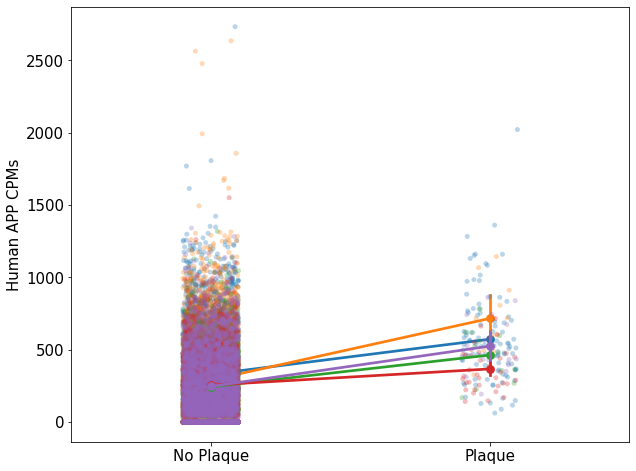

In [102]:
import seaborn as sns
# Correlate human APP expression with plaque load -- treat each spot independently
fig,ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df, x = 'plaque', y ='human APP CPMs', hue = 'sample', alpha=0.3)
sns.pointplot(data=df, x = 'plaque', y ='human APP CPMs', hue = 'sample', label=None)#, ci=None, color='grey')

#set label names and size
ax.set_ylabel('Human APP CPMs', fontsize=15)
#remove x label
ax.set_xlabel('')
#change x tick names
ax.set_xticklabels(['No Plaque', 'Plaque'], fontsize=15)
#increase y tick size
ax.tick_params(axis='y', labelsize=15)
#remove legend
ax.legend_.remove()
plt.show()

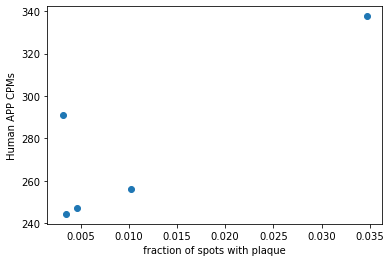

In [52]:
plt.scatter(plq_pc, curr_exp)
#set x and y axis labels
plt.xlabel(' fraction of spots with plaque ')
plt.ylabel('Human APP CPMs')
plt.show()

In [40]:
curr_exp, sum_plq

(247.18889, 16)

In [ ]:
# Correlate human APP expression with plaque load -- mean for each sample


# Plaque differential expression


In [191]:
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID



(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [192]:
#Load in metadata
meta = pd.read_csv('/cndd2/agelber/hal/metadata.csv')
meta

sample        age sex genotype  time sample_number sample_name  \
0   039-A_S18   7 months   F       WT   ZT0           S18       039-A   
1   039-B_S19   7 months   F       WT   ZT6           S19       039-B   
2   039-C_S20   7 months   F       WT  ZT12           S20       039-C   
3   039-D_S21   7 months   F       WT  ZT18           S21       039-D   
4   042-A_S22   7 months   M       WT   ZT6           S22       042-A   
..        ...        ...  ..      ...   ...           ...         ...   
61  351-D_S12  14 months   F       WT  ZT18           S12       351-D   
62  043-A_S12  14 months   F    APP23   ZT0           S12       043-A   
63  043-B_S13  14 months   M    APP23   ZT6           S13       043-B   
64  043-C_S14  14 months   F       WT  ZT12           S14       043-C   
65  043-D_S15  14 months   F       WT  ZT18           S15       043-D   

    resequenced  
0         False  
1          True  
2          True  
3         False  
4         False  
..          ...  
61        False  
62         True  
63         True  
64         True  
65         True  

[66 rows x 8 columns]

In [198]:
#group data together for DESEQ
# Plaque vs no plaque
name_l = ID
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    spot_df, gene_df = run_('old',ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex
    spot_df['adj'] = np.zeros(len(spot_df))
    adj_ind = adj(spot_df)
    spot_df['adj'].iloc[adj_ind] = 1

    new_df = spot_df[['barcode', 'sample', 'sex', 'plaque', 'adj', 'cluster', 'array_row', 'array_col']]
    new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')
lab['adj'] = lab['adj'].values.astype(int)   

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)


In [185]:
gene_all

AAACAAGTATCTCCCA-1_030-C  AAACAATCTACTAGCA-1_030-C  \
Xkr4                            0.000000                  0.000000   
Gm19938                         0.000000                  0.000000   
Sox17                           0.000000                  0.000000   
Mrpl15                        156.519012                 69.998596   
Lypla1                          0.000000                  0.000000   
...                                  ...                       ...   
Spry3                           0.000000                  0.000000   
Tmlhe                           0.000000                  0.000000   
4933409K07Rik                   0.000000                  0.000000   
CAAA01147332.1                  0.000000                  0.000000   
AC149090.1                      0.000000                 69.998596   

                AAACAGAGCGACTCCT-1_030-C  AAACAGTGTTCCTGGG-1_030-C  \
Xkr4                            0.000000                  0.000000   
Gm19938                         0.000000                  0.000000   
Sox17                           0.000000                  0.000000   
Mrpl15                         42.007980                 91.047729   
Lypla1                         42.007980                 45.523865   
...                                  ...                       ...   
Spry3                           0.000000                  0.000000   
Tmlhe                           0.000000                  0.000000   
4933409K07Rik                   0.000000                  0.000000   
CAAA01147332.1                  0.000000                  0.000000   
AC149090.1                     84.015961                273.143188   

                AAACCCGAACGAAATC-1_030-C  AAACCGGGTAGGTACC-1_030-C  \
Xkr4                            0.000000                  0.000000   
Gm19938                         0.000000                  0.000000   
Sox17                           0.000000                  0.000000   
Mrpl15                          0.000000                  0.000000   
Lypla1                          0.000000                 43.929012   
...                                  ...                       ...   
Spry3                           0.000000                  0.000000   
Tmlhe                           0.000000                  0.000000   
4933409K07Rik                   0.000000                  0.000000   
CAAA01147332.1                  0.000000                  0.000000   
AC149090.1                    170.852554                175.716049   

                AAACCGTTCGTCCAGG-1_030-C  AAACCTAAGCAGCCGG-1_030-C  \
Xkr4                            0.000000                  0.000000   
Gm19938                         0.000000                  0.000000   
Sox17                           0.000000                  0.000000   
Mrpl15                         49.828094                  0.000000   
Lypla1                          0.000000                  0.000000   
...                                  ...                       ...   
Spry3                           0.000000                  0.000000   
Tmlhe                           0.000000                  0.000000   
4933409K07Rik                   0.000000                  0.000000   
CAAA01147332.1                  0.000000                  0.000000   
AC149090.1                     99.656189                155.030746   

                AAACCTCATGAAGTTG-1_030-C  AAACGAAGAACATACC-1_030-C  ...  \
Xkr4                            0.000000                  0.000000  ...   
Gm19938                         0.000000                  0.000000  ...   
Sox17                           0.000000                  0.000000  ...   
Mrpl15                         28.853367                 74.476807  ...   
Lypla1                         28.853367                  0.000000  ...   
...                                  ...                       ...  ...   
Spry3                           0.000000                  0.000000  ...   
Tmlhe                           0.000000            

In [199]:
#pseudobulk each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind]
unq_cort = np.unique(cort_lab['cluster'].values)
plq_name = 'plq0', 'plq1'

bulk_gene=pd.DataFrame()
bulk_lab = pd.DataFrame()
for name in sub_ID:
    for p in range(2):
        curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['plaque']==p))])
        curr_samp = pd.DataFrame(curr_samp, columns=[name+'_'+plq_name[p]])
        if sum(curr_samp.values) == 0: continue
        bulk_gene = pd.concat([bulk_gene, curr_samp], axis=1)
        curr_lab = cort_lab.iloc[np.where((name == cort_lab['sample'].values)  & (cort_lab['plaque']==p))].iloc[0]
        bulk_lab = pd.concat([bulk_lab, curr_lab], axis=1)

#change order of columns in bulk_gene
bulk_lab = bulk_lab.T
bulk_lab = bulk_lab[['sample', 'sex', 'plaque']]
#replace bulk_lab index names with sample names from bulk_gene
bulk_lab.index = bulk_gene.columns.values

bulk_lab['plaque'][bulk_lab['plaque'] == 0] = 'plq0'
bulk_lab['plaque'][bulk_lab['plaque'] == 1] = 'plq1'



In [200]:
#write to csv
bulk_gene.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque-BULK_counts.csv', index=True)
bulk_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque-BULK_labels.csv', index=True)

In [201]:
#load in plaque DE genes
plq_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_DESEQ-pval_BULK_new.csv', index_col=0)

plq_de = plq_de
#replace all nans with 1
plq_de['padj'][np.isnan(plq_de['padj'])] = 1
#add name GeneNames to index of plq_de
#put geneid at first column 
plq_de['geneid'] = plq_de.index
plq_de = plq_de[['geneid', 'padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']]
plq_de

geneid      padj  log2FoldChange    baseMean  \
Xkr4                      Xkr4  0.998305        0.486630    2.194745   
Gm19938                Gm19938  0.998305        0.563654    2.463998   
Sox17                    Sox17  0.998305        0.184136    9.973671   
Mrpl15                  Mrpl15  0.998305       -0.029620  103.949983   
Lypla1                  Lypla1  0.998305        0.066924   80.582582   
...                        ...       ...             ...         ...   
Vamp7                    Vamp7  0.998305       -0.059221   70.691474   
Spry3                    Spry3  0.998305        0.095336   16.563521   
Tmlhe                    Tmlhe  0.998305        0.576024    4.269107   
CAAA01147332.1  CAAA01147332.1  0.998305        0.743676    2.791864   
AC149090.1          AC149090.1  0.998305       -0.099391  492.029878   

                   lfcSE      stat    pvalue  
Xkr4            0.517878  0.939662  0.347391  
Gm19938         0.587503  0.959405  0.337355  
Sox17           0.292352  0.629843  0.528797  
Mrpl15          0.110866 -0.267171  0.789338  
Lypla1          0.118343  0.565506  0.571730  
...                  ...       ...       ...  
Vamp7           0.117207 -0.505270  0.613369  
Spry3           0.240475  0.396448  0.691774  
Tmlhe           0.429522  1.341080  0.179895  
CAAA01147332.1  0.499843  1.487821  0.136798  
AC149090.1      0.153195 -0.648788  0.516475  

[14074 rows x 7 columns]

In [205]:
plq_de[plq_de['padj'] < 0.5]

geneid      padj  log2FoldChange    baseMean     lfcSE      stat  \
B2m          B2m  0.480903        0.500672  672.686993  0.134852  3.712752   
Art3        Art3  0.397291        1.181439    8.586790  0.309553  3.816591   
Cux2        Cux2  0.397291       -0.523394   82.334229  0.134638 -3.887426   
Bcl2a1b  Bcl2a1b  0.317356        1.513569    7.629889  0.357140  4.238029   
Ly86        Ly86  0.397291        0.907186   70.096807  0.238347  3.806155   
Psmb8      Psmb8  0.397291        0.982374   21.114910  0.254294  3.863145   

           pvalue  
B2m      0.000205  
Art3     0.000135  
Cux2     0.000101  
Bcl2a1b  0.000023  
Ly86     0.000141  
Psmb8    0.000112

In [71]:
def adj(spot_df):
    plq_bool = spot_df['plaque'].values == 1
    all_coords = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values

    #find the n nearest neighbours
    from sklearn.neighbors import NearestNeighbors
    X = np.asarray(all_coords).T
    nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)

    adj_ind = np.unique(np.ravel(indices[plq_bool][:,1:])) #indeces nn of plq spots
    final_adjind = np.intersect1d(adj_ind,np.setxor1d(adj_ind, indices[plq_bool][:,0])) #check that adj spots that are not plaques
    return(final_adjind)


In [88]:
gene = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_counts.csv', index_col=0)
gene

109-D_plq0  109-D_plq1  030-C_plq0  030-C_plq1  030-D_plq0  \
Xkr4                   7.0         0.0        28.0         1.0        35.0   
Gm19938                6.0         0.0        19.0         0.0        32.0   
Sox17                 41.0         2.0       105.0         7.0       123.0   
Mrpl15               409.0        15.0       918.0        18.0      1156.0   
Lypla1               227.0        14.0       797.0        26.0       893.0   
...                    ...         ...         ...         ...         ...   
Vamp7                241.0         6.0       660.0        18.0       858.0   
Spry3                 58.0         1.0       165.0         4.0       291.0   
Tmlhe                  5.0         0.0        44.0         2.0        72.0   
CAAA01147332.1        11.0         1.0        11.0         0.0        22.0   
AC149090.1          1361.0        67.0      5650.0       147.0      6448.0   

                030-D_plq1  109-A_plq0  109-A_plq1  040-C_plq0  040-C_plq1  \
Xkr4                   3.0         9.0         0.0        28.0         1.0   
Gm19938                6.0         6.0         0.0        11.0         0.0   
Sox17                 12.0        25.0         0.0       104.0         5.0   
Mrpl15               145.0       425.0         2.0      1230.0        41.0   
Lypla1               106.0       284.0         0.0      1046.0        42.0   
...                    ...         ...         ...         ...         ...   
Vamp7                 84.0       273.0         1.0       931.0        43.0   
Spry3                 33.0        39.0         0.0       199.0         9.0   
Tmlhe                 14.0        17.0         0.0        40.0         3.0   
CAAA01147332.1         3.0        15.0         0.0        24.0         2.0   
AC149090.1           529.0      1478.0         5.0      4041.0       139.0   

                030-B_plq0  030-B_plq1  109-C_plq0  109-C_plq1  040-A_plq0  \
Xkr4                  13.0         3.0         7.0         0.0        22.0   
Gm19938               10.0         1.0         3.0         0.0        64.0   
Sox17                 66.0         7.0        24.0         0.0       110.0   
Mrpl15               603.0        67.0       228.0         0.0      1282.0   
Lypla1               478.0        60.0       168.0         0.0      1044.0   
...                    ...         ...         ...         ...         ...   
Vamp7                465.0        55.0       155.0         0.0       919.0   
Spry3                 92.0         9.0        25.0         0.0       228.0   
Tmlhe                 43.0         3.0         4.0         0.0        37.0   
CAAA01147332.1         8.0         3.0         9.0         0.0        30.0   
AC149090.1          3546.0       399.0       782.0         3.0      6482.0   

                040-A_plq1  040-D_plq0  040-D_plq1  
Xkr4                   0.0        13.0         1.0  
Gm19938                1.0        41.0         3.0  
Sox17                  0.0        81.0         3.0  
Mrpl15                21.0      1080.0        40.0  
Lypla1                13.0       936.0        36.0  
...                    ...         ...         ...  
Vamp7                  9.0       790.0        30.0  
Spry3                  4.0       207.0         9.0  
Tmlhe                  0.0        54.0         2.0  
CAAA01147332.1         1.0        22.0         0.0  
AC149090.1            80.0      4700.0       201.0  

[14074 rows x 18 columns]

In [92]:
gene.columns == meta.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [91]:
gene.columns

Index(['109-D_plq0', '109-D_plq1', '030-C_plq0', '030-C_plq1', '030-D_plq0',
       '030-D_plq1', '109-A_plq0', '109-A_plq1', '040-C_plq0', '040-C_plq1',
       '030-B_plq0', '030-B_plq1', '109-C_plq0', '109-C_plq1', '040-A_plq0',
       '040-A_plq1', '040-D_plq0', '040-D_plq1'],
      dtype='object')

In [89]:
meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_labels.csv', index_col=0)
meta

sample sex plaque
109-D_plq0  109-D   M   plq0
109-D_plq1  109-D   M   plq1
030-C_plq0  030-C   F   plq0
030-C_plq1  030-C   F   plq1
030-D_plq0  030-D   F   plq0
030-D_plq1  030-D   F   plq1
109-A_plq0  109-A   M   plq0
109-A_plq1  109-A   M   plq1
040-C_plq0  040-C   F   plq0
040-C_plq1  040-C   F   plq1
030-B_plq0  030-B   F   plq0
030-B_plq1  030-B   F   plq1
109-C_plq0  109-C   M   plq0
109-C_plq1  109-C   M   plq1
040-A_plq0  040-A   F   plq0
040-A_plq1  040-A   F   plq1
040-D_plq0  040-D   F   plq0
040-D_plq1  040-D   F   plq1

In [81]:
#stack spot data together for DESEQ and visualisation -> cortex only
# Plaque vs no plaque
name_l = ID
age='old'
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    name = name_l[x]
    spot_df, gene_df = run_(age, ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex

    new_df = spot_df[['barcode', 'sample', 'sex', 'plaque', 'cluster', 'micron_x', 'micron_y']]
    new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    ind = [i for i in range(len(new_df)) if 'Cortex L' in new_df['cluster'].iloc[i]]
    new_df = pf.dist_nearest_plaq(new_df)
    new_df = new_df.iloc[ind]
    new_df.drop(['cluster', 'micron_x', 'micron_y'], axis=1, inplace=True)
    gene_df  = gene_df.iloc[ind]

    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')
lab.drop(['dist_nearest_plaq'],axis=1, inplace=True)
dm = lab
# dist_ = dm['dist_nearest_plaq'].values
# new_dist = (dist_ - np.mean(dist_))/np.std(dist_)
# dm['dist_nearest_plaq'] = new_dist

# make design matrix 
dm.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_design_nonscaled.csv')
gene_all.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_CPM.csv')

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/envs/base_conda/lib

Number of spots: 2998
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


/tmp/ipykernel_2737968/1240453264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1
/tmp/ipykernel_2737968/1240453264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)


In [76]:
#load in plaque DE genes
plq_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_DESEQ-pval.csv', index_col=0)
#plq_de_reg = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-p-region_DESEQ-pval.csv', index_col=0)
adj_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-adj_DESEQ-pval.csv', index_col=0)

plq_de = plq_de
#replace all nans with 1
plq_de['padj'][np.isnan(plq_de['padj'])] = 1
#add name GeneNames to index of plq_de
#put geneid at first column 
plq_de['geneid'] = plq_de.index
plq_de = plq_de[['geneid', 'padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']]
plq_de

FileNotFoundError: [Errno 2] No such file or directory: '/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_DESEQ-pval_sex-sample.csv'

In [9]:
#load in plaque DE genes
plq_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_DESEQ-pval.csv', index_col=0)
#plq_de_reg = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-p-region_DESEQ-pval.csv', index_col=0)
adj_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-adj_DESEQ-pval.csv', index_col=0)

plq_de = plq_de
#replace all nans with 1
plq_de['padj'][np.isnan(plq_de['padj'])] = 1
#add name GeneNames to index of plq_de
#put geneid at first column 
plq_de['geneid'] = plq_de.index
plq_de = plq_de[['geneid', 'padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']]
plq_de

geneid      padj  log2FoldChange    baseMean     lfcSE  \
Ctsz            Ctsz  0.007691        0.489762  175.904233  0.098983   
H2-D1          H2-D1  0.014956        0.562289  178.020618  0.121150   
Ly86            Ly86  0.014956        0.823994   70.096807  0.179414   
B2m              B2m  0.016527        0.453402  672.686993  0.100506   
Serpina3n  Serpina3n  0.040789        1.238938   71.682376  0.292290   
...              ...       ...             ...         ...       ...   
Pdpk1          Pdpk1  0.999991       -0.000040  188.754895  0.097982   
Mrpl37        Mrpl37  0.999991       -0.000016   72.129944  0.137385   
Hnrnpa1      Hnrnpa1  0.999991       -0.000008  369.573173  0.069085   
Cnot4          Cnot4  0.999991       -0.000011   35.059424  0.231332   
Ly6d            Ly6d  0.999991       -0.000007   15.629188  0.675597   

               stat        pvalue  
Ctsz       4.947941  7.500262e-07  
H2-D1      4.641247  3.463128e-06  
Ly86       4.592697  4.375542e-06  
B2m        4.511172  6.447041e-06  
Serpina3n  4.238729  2.247891e-05  
...             ...           ...  
Pdpk1     -0.000413  9.996707e-01  
Mrpl37    -0.000117  9.999066e-01  
Hnrnpa1   -0.000113  9.999097e-01  
Cnot4     -0.000049  9.999609e-01  
Ly6d      -0.000011  9.999913e-01  

[14074 rows x 7 columns]

In [97]:
plq_de.loc['Xkr4']

geneid                Xkr4
padj                   1.0
log2FoldChange    0.476869
baseMean          2.194745
lfcSE             0.721046
stat              0.661357
pvalue            0.508383
Name: Xkr4, dtype: object

In [13]:
plq_de.index

Index(['Ctsz', 'H2-D1', 'Ly86', 'B2m', 'Serpina3n', 'Cd68', 'Ifi27l2a', 'Trf',
       'Gfap', 'Cux2',
       ...
       'Nrsn2', 'Osbpl2', 'Hmgxb3', 'Sh3rf1', 'Hs6st2', 'Pdpk1', 'Mrpl37',
       'Hnrnpa1', 'Cnot4', 'Ly6d'],
      dtype='object', length=14074)

In [24]:
pig_l = ['Arpc1', 'C4a', 'Ctsa', 'Cyba', 'Grn', 'Hexb', 'Laptm5', 'Mpeg1', 'Gpx4-ps', 'C1qa', 'Clu', 
         'Ctss', 'Fcer1g', 'Gusb', 'Igfbp5', 'Lgmn', 'Olfml3', 'S100a6', 'C1qb', 'Csf1r', 'Ctsh', 'Fcgr3',
         'Gns', 'Itgb5', 'Ly86', 'Plek', 'Rpl18a', 'C1qc', 'Cst3', 'Cx3cr1', 'Fcrls', 'Gpx4', 'Itm2b', 
         'Man2b1', 'Prdx6', 'Vsir']
prac = [i for i in pig_l if i in plq_de.index.values]

In [54]:
dam_l

1         Apoe
2          B2m
3         Cstb
4       Tyrobp
5        Timp2
6        H2-D1
7         Fth1
8         Lyz2
9         Ctsb
10        Ctsd
11         Ank
12        Spp1
13         Axl
14        Csf1
15        Cst7
16       Cadm1
17        Ccl6
18       Itgax
19        Cd63
20        Cd68
21        Ctsa
22         Lpl
23        Gusb
24    Serpine2
25        Ctsz
26        Cd52
27        Ctsl
28        Igf1
29      Clec7a
30       Cxcr4
31        Gas7
32       Gpnmb
33       Fabp3
34     Cd200r4
35       Apbb2
36       Hif1a
37       Trem2
38         Cd9
39         Cd6
Name: Disease associated microglia (DAMs) genes, dtype: object

In [51]:
plq_de.loc[prac][plq_de.loc[prac]['padj'] < 0.5].index

Index(['Grn', 'Hexb', 'Mpeg1', 'Ctss', 'Fcer1g', 'Ly86', 'Fcrls'], dtype='object')

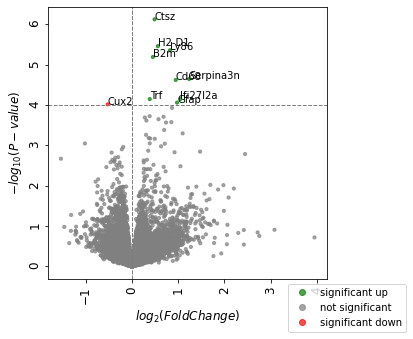

In [32]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=plq_de, lfc='log2FoldChange', pv='pvalue', dim = (5,5), dotsize=10, geneid = 'geneid', genenames = tuple(plq_de[plq_de['padj'] < 0.1]['geneid'].values) , valpha = 0.7,gstyle=1, sign_line=True
                             ,show=True,plotlegend=True, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.0001,0.0001), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10, figtype='png')
                            

In [107]:
plq_de.loc[prac][plq_de.loc[prac]['padj'] < 0.5
                ].index

ValueError: Cannot index with multidimensional key

In [62]:
plq_de.loc[prac][plq_de.loc[prac]['padj'] < 1
                ].index

Index(['Ctsa', 'Cyba', 'Grn', 'Hexb', 'Laptm5', 'Mpeg1', 'C1qa', 'Clu', 'Ctss',
       'Fcer1g', 'Gusb', 'Igfbp5', 'Lgmn', 'Olfml3', 'S100a6', 'C1qb', 'Csf1r',
       'Ctsh', 'Fcgr3', 'Gns', 'Itgb5', 'Ly86', 'Plek', 'Rpl18a', 'C1qc',
       'Cst3', 'Cx3cr1', 'Fcrls', 'Gpx4', 'Itm2b', 'Man2b1', 'Prdx6', 'Vsir'],
      dtype='object')

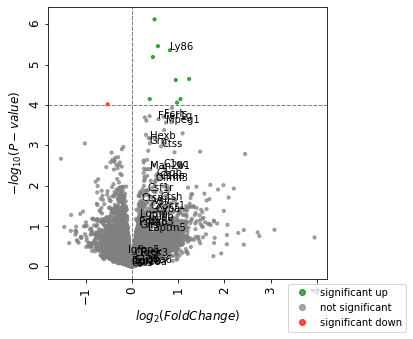

Index(['Grn', 'Hexb', 'Mpeg1', 'Ctss', 'Fcer1g', 'Ly86', 'Fcrls'], dtype='object')


In [66]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=plq_de, lfc='log2FoldChange', pv='pvalue', dim = (5,5), dotsize=10, geneid = 'geneid', genenames = tuple(plq_de.loc[prac][plq_de.loc[prac]['padj'] < 1].index) , valpha = 0.7,gstyle=1, sign_line=True
                             ,show=True,plotlegend=True, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.0001,0.0001), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10, figtype='png')
                            
print(plq_de.loc[prac][plq_de.loc[prac]['padj'] < 0.5
                ].index)

In [101]:
#load in plaque DE genes
plq_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_DESEQ-pval_BULK_new.csv', index_col=0)

plq_de = plq_de
#replace all nans with 1
plq_de['padj'][np.isnan(plq_de['padj'])] = 1
#add name GeneNames to index of plq_de
#put geneid at first column 
plq_de['geneid'] = plq_de.index
plq_de = plq_de[['geneid', 'padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']]
plq_de

geneid      padj  log2FoldChange    baseMean  \
Xkr4                      Xkr4  0.998305        0.486630    2.194745   
Gm19938                Gm19938  0.998305        0.563654    2.463998   
Sox17                    Sox17  0.998305        0.184136    9.973671   
Mrpl15                  Mrpl15  0.998305       -0.029620  103.949983   
Lypla1                  Lypla1  0.998305        0.066924   80.582582   
...                        ...       ...             ...         ...   
Vamp7                    Vamp7  0.998305       -0.059221   70.691474   
Spry3                    Spry3  0.998305        0.095336   16.563521   
Tmlhe                    Tmlhe  0.998305        0.576024    4.269107   
CAAA01147332.1  CAAA01147332.1  0.998305        0.743676    2.791864   
AC149090.1          AC149090.1  0.998305       -0.099391  492.029878   

                   lfcSE      stat    pvalue  
Xkr4            0.517878  0.939662  0.347391  
Gm19938         0.587503  0.959405  0.337355  
Sox17           0.292352  0.629843  0.528797  
Mrpl15          0.110866 -0.267171  0.789338  
Lypla1          0.118343  0.565506  0.571730  
...                  ...       ...       ...  
Vamp7           0.117207 -0.505270  0.613369  
Spry3           0.240475  0.396448  0.691774  
Tmlhe           0.429522  1.341080  0.179895  
CAAA01147332.1  0.499843  1.487821  0.136798  
AC149090.1      0.153195 -0.648788  0.516475  

[14074 rows x 7 columns]

In [126]:
#MAST
#Calculate distance of each spot to nearest plaque, and save as metadata
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID

(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [133]:
lab

barcode sample sex  plaque  dist_nearest_plaq
111354  AAACAGTGTTCCTGGG-1_030-C  030-C   F       0         361.977789
111356  AAACCGGGTAGGTACC-1_030-C  030-C   F       0         697.281805
111357  AAACCGTTCGTCCAGG-1_030-C  030-C   F       0          98.155009
111359  AAACCTCATGAAGTTG-1_030-C  030-C   F       0        1111.520238
111364  AAACGGGTTGGTATCC-1_030-C  030-C   F       0         970.737604
...                          ...    ...  ..     ...                ...
114736  TTGTGGTAGGAGGGAT-1_030-C  030-C   F       0         265.546965
114743  TTGTTTCACATCCAGG-1_030-C  030-C   F       0          98.155009
114744  TTGTTTCATTAGTCTA-1_030-C  030-C   F       0          97.823590
114745  TTGTTTCCATACAACT-1_030-C  030-C   F       0         705.415942
114746  TTGTTTGTATTACACG-1_030-C  030-C   F       0         302.444590

[933 rows x 5 columns]

In [134]:
#stack spot data together for MAST and visualisation -> cortex only
# Plaque vs no plaque
name_l = ID
age='old'
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    name = name_l[x]
    spot_df, gene_df = run_(age, ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex

    new_df = spot_df[['barcode', 'sample', 'sex', 'plaque', 'cluster', 'micron_x', 'micron_y']]
    new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    ind = [i for i in range(len(new_df)) if 'Cortex L' in new_df['cluster'].iloc[i]]
    new_df = pf.dist_nearest_plaq(new_df)
    new_df = new_df.iloc[ind]
    new_df.drop(['cluster', 'micron_x', 'micron_y'], axis=1, inplace=True)
    gene_df  = gene_df.iloc[ind]

    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')
lab.drop(['dist_nearest_plaq'],axis=1, inplace=True)
dm = lab
# dist_ = dm['dist_nearest_plaq'].values
# new_dist = (dist_ - np.mean(dist_))/np.std(dist_)
# dm['dist_nearest_plaq'] = new_dist

# make design matrix 
dm.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_design_nonscaled.csv')
gene_all.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_CPM.csv')

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 2835
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 2959
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 3204
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 3406
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 3002
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 2998
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 3343
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Number of spots: 3285
Number of genes: 32284


/tmp/ipykernel_2737968/2655259971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_2737968/2655259971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [330]:
#stack spot data together for MAST -> cortex only
#===================================================
# #Load stacked gene and metadata
gene_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_CPM.csv', index_col=0)
lab_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_design_nonscaled.csv', index_col=0)

#Log transform CPMs and plus 1 for MAST
gene_mast = np.log2(gene_all+1)

#remove header and index from gene_all
gene_mast.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plq_log2p1CPM.csv')

# Create csv design matrix for MAST -> distance from plaque, donor ID
lab_all['wellKey'] = lab_all.index
curr_lab = lab_all[['wellKey', 'plaque','sample']]

#drop index from lab_all
curr_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plq_design.csv', index=False, header=True)

# Create csv of gene names for MAST
fdata_mast = gene_mast.index.values
#save both as csv
np.savetxt('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plq_fData-genes.csv', fdata_mast, delimiter=',', fmt='%s')


In [150]:
fdata_mast.shape

(17421,)

In [2]:
import mne
#Load stacked gene and metadata for plotting
#============================================
# gene_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_CPM.csv', index_col=0)
# lab_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plq_design_nonscaled.csv', index_col=0)

# gene_all = gene_all[lab_all.index.values]

#load in MAST results
mast = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plq_MAST-LRT_sample-intercept.csv', index_col=0)


#subset matrix for pvalues select coefficient matrix where component column == C and contract column == dist_nearest_plaq
p_mat = mast[mast['component'] == 'C']
p_mat = p_mat[p_mat['contrast'] == 'plaque']
p_mat['Pr(>Chisq)'] = p_mat['Pr(>Chisq)'].fillna(1)
sig_v, adj_p_vals = mne.stats.fdr_correction(p_mat['Pr(>Chisq)'].values, 0.1, 'indep') #Use Benjamini hochberg FDR test 
p_mat['padj'] = adj_p_vals

In [319]:
sum(sig_v==True)

88

In [3]:
p_mat

primerid component contrast  Pr(>Chisq)     ci.hi     ci.lo  \
1      0610009B22Rik         C   plaque    0.210214  0.174916 -0.038480   
9      0610009L18Rik         C   plaque    0.969950  0.136676 -0.142033   
17     0610010F05Rik         C   plaque    0.162876  0.193873 -0.032601   
25     0610010K14Rik         C   plaque    0.476115  0.143224 -0.066847   
33     0610012G03Rik         C   plaque    0.446702  0.129516 -0.057073   
...              ...       ...      ...         ...       ...       ...   
83481         mt-Nd3         C   plaque    0.060218  0.112378 -0.002358   
83489         mt-Nd4         C   plaque    1.000000  0.035948 -0.057553   
83497        mt-Nd4l         C   plaque    0.677313  0.071942 -0.110728   
83505         mt-Nd5         C   plaque    0.191091  0.022082 -0.110572   
83513         mt-Nd6         C   plaque    0.544082  0.081606 -0.154774   

           coef         z      padj  
1      0.068218  1.253120  0.879990  
9     -0.002678 -0.037671  1.000000  
17     0.080636  1.395694  0.840539  
25     0.038188  0.712594  0.964453  
33     0.036222  0.760952  0.956075  
...         ...       ...       ...  
83481  0.055010  1.879393  0.688088  
83489 -0.010802 -0.452873  1.000000  
83497 -0.019393 -0.416154  0.980852  
83505 -0.044245 -1.307446  0.865855  
83513 -0.036584 -0.606674  0.971632  

[10440 rows x 9 columns]

In [51]:
#subset matrix for lfc
lfc_mat = mast[mast['component'] == 'logFC']
lfc_mat = lfc_mat[lfc_mat['contrast'] == 'plaque']

#check matrix indeces are the same
assert sum(lfc_mat['primerid'].values == p_mat['primerid'].values) == len(lfc_mat['primerid'].values), 'lfc_mat and p_mat indeces do not match'

#Append lfc to p values matrix
p_mat['lfc'] = lfc_mat['coef'].values
p_mat['lfc'] = p_mat['lfc'].fillna(0)
p_mat.set_index('primerid', inplace=True)

In [52]:

#find up and down genes
up = p_mat[p_mat['z'] >0]
down = p_mat[p_mat['z'] <0]
up_sig = up[up['padj'].values < 0.01]
down_sig = down[down['padj'].values < 0.01]

In [344]:
p_mat.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/MAST_plq-noplq_outs.csv', index=False)

In [345]:
pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/MAST_plq-noplq_outs.csv')

primerid component contrast  Pr(>Chisq)     ci.hi     ci.lo  \
0      0610009B22Rik         C   plaque    0.210214  0.174916 -0.038480   
1      0610009L18Rik         C   plaque    0.969950  0.136676 -0.142033   
2      0610010F05Rik         C   plaque    0.162876  0.193873 -0.032601   
3      0610010K14Rik         C   plaque    0.476115  0.143224 -0.066847   
4      0610012G03Rik         C   plaque    0.446702  0.129516 -0.057073   
...              ...       ...      ...         ...       ...       ...   
10435         mt-Nd3         C   plaque    0.060218  0.112378 -0.002358   
10436         mt-Nd4         C   plaque    1.000000  0.035948 -0.057553   
10437        mt-Nd4l         C   plaque    0.677313  0.071942 -0.110728   
10438         mt-Nd5         C   plaque    0.191091  0.022082 -0.110572   
10439         mt-Nd6         C   plaque    0.544082  0.081606 -0.154774   

           coef         z      padj       lfc  
0      0.068218  1.253120  0.879990  0.122683  
1     -0.002678 -0.037671  1.000000  0.134196  
2      0.080636  1.395694  0.840539 -0.207936  
3      0.038188  0.712594  0.964453 -0.156136  
4      0.036222  0.760952  0.956075  0.108874  
...         ...       ...       ...       ...  
10435  0.055010  1.879393  0.688088  0.056496  
10436 -0.010802 -0.452873  1.000000  0.000000  
10437 -0.019393 -0.416154  0.980852 -0.000119  
10438 -0.044245 -1.307446  0.865855 -0.038316  
10439 -0.036584 -0.606674  0.971632  0.098649  

[10440 rows x 10 columns]

In [57]:
p_mat.shape

(10440, 9)

In [22]:
#load in A1 genes
import pandas as pd
from io import StringIO

# Correctly formatted data string
data = """
Probe set ID,Gene symbol,Saline astrocytes,1 d LPS astrocytes,Fold induction
1427747_a_at,Lcn2,49,17253,355.1
1460197_a_at,Steap4,29,2295,78.6
1449556_at,H2-T23,117,5270,45.0
1460227_at,Timp1,77,3461,44.9
1416625_at,Serping1,240,8146,34.0
1419100_at,Serpina3n,526,16269,31.0
1450170_x_at,H2-D1,125,3671,29.3
1418483_a_at,Ggta1,67,1279,19.0
1419043_a_at,Iigp1,104,1905,18.4
1435906_x_at,Gbp2,165,3022,18.3
1417494_a_at,Cp,67,1175,17.6
1416164_at,Fbln5,120,2002,16.7
1426260_a_at,Ugt1a,471,7686,16.3
1416125_at,Fkbp5,86,1397,16.2
1435036_at,Aspg,257,3378,13.1
1422962_a_at,Psmb8,85,1099,12.9
1447927_at,Gbp10,249,3173,12.8
1417426_at,Srgn,97,1096,11.3
1418930_at,Cxcl10,162,1829,11.3
1434601_at,Amigo2,284,3003,10.6
1422943_a_at,Hspb1,163,1576,9.7
1418674_at,Osmr,373,2933,7.9
1426509_s_at,Gfap,235,1758,7.5
1419647_a_at,Ier3,180,1308,7.3
1423754_at,Ifitm3,426,3050,7.2
1438658_a_at,S1pr3,185,1187,6.4
1447602_x_at,Sulf2,200,1207,6.0
1436332_at,Hspb6,293,1671,5.7
1449937_at,Endou,245,1368,5.6
1427035_at,Slc39a14,716,3950,5.5
1421812_at,Tapbp,1259,6881,5.5
1437056_x_at,Crispld2,409,2173,5.3
1421817_at,Gsr,221,1123,5.1
1448276_at,Tspan4,303,1508,5.0
1457644_s_at,Cxcl1,433,2150,5.0
1418392_a_at,Gbp3,661,3279,5.0
1418825_at,Irgm1,417,2064,5.0
1425784_a_at,Olfm1,536,2625,4.9
1449875_s_at,H2-T10,327,1583,4.8
1451537_at,Chi3l1,1128,5317,4.7
1450641_at,Vim,1067,4941,4.6
1418021_at,C4b,1659,7652,4.6
1449289_a_at,B2m,1443,6609,4.6
1434719_at,A2m,531,2411,4.5
1417639_at,Slc22a4,261,1175,4.5
1423596_at,Nek6,601,2602,4.3
1425826_a_at,Sorbs1,706,2992,4.2
1431213_a_at,Gm3579,786,3302,4.2
1423760_at,Cd44,561,2347,4.2
1417141_at,Igtp,823,3299,4.0
"""

# Use StringIO to simulate a file object
data_io = StringIO(data)

# Read the data into a pandas DataFrame
df = pd.read_csv(data_io)

# Now, let's save this DataFrame to a CSV file
csv_file_path = "/cndd3/dburrows/DATA/spatial_transcriptomics/gene_lists/A1.csv"
df.to_csv(csv_file_path, index=False)


In [78]:
#Load in gene lists
a1 = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/gene_lists/A1.csv')
a1.rename(columns={'Gene symbol': 'genes'}, inplace=True)
a1['index'] = a1['genes']
a1.set_index('index', inplace=True)
a1.drop(['Lcn2', 'Steap4', 'Timp1', 'Serping1', 'Ggta1', 'Iigp1', 'Gbp2', 'Cp', 'Fbln5', 'Ugt1a', 'Aspg', 'Gbp10', 'Cxcl10', 'Amigo2', 'Osmr', 'S1pr3', 'Hspb6', 'Endou', 'Crispld2', 'Cxcl1', 'Gbp3', 'H2-T10', 'Chi3l1', 'A2m', 'Slc22a4', 'Sorbs1', 'Gm3579', 'Cd44'], inplace=True)
dam = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/gene_lists/DAM.csv')
dam.rename(columns={'Disease associated microglia (DAMs) genes': 'genes'}, inplace=True)
dam.drop(0, axis=0, inplace=True)
dam['index'] = dam['genes']
dam.set_index('index', inplace=True)
dam.drop(['Ccl6', 'Itgax', 'Igf1', 'Clec7a', 'Cxcr4', 'Gpnmb', 'Cd200r4', 'Cd6'], inplace=True)
pi = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/gene_lists/PIG.csv')
pi['index'] = pi['genes']
pi.set_index('index', inplace=True)
pi.drop(['C4a'], inplace=True)

In [141]:
dam['genes'][np.in1d(dam['genes'], a1['genes'])]

index
B2m        B2m
H2-D1    H2-D1
Name: genes, dtype: object

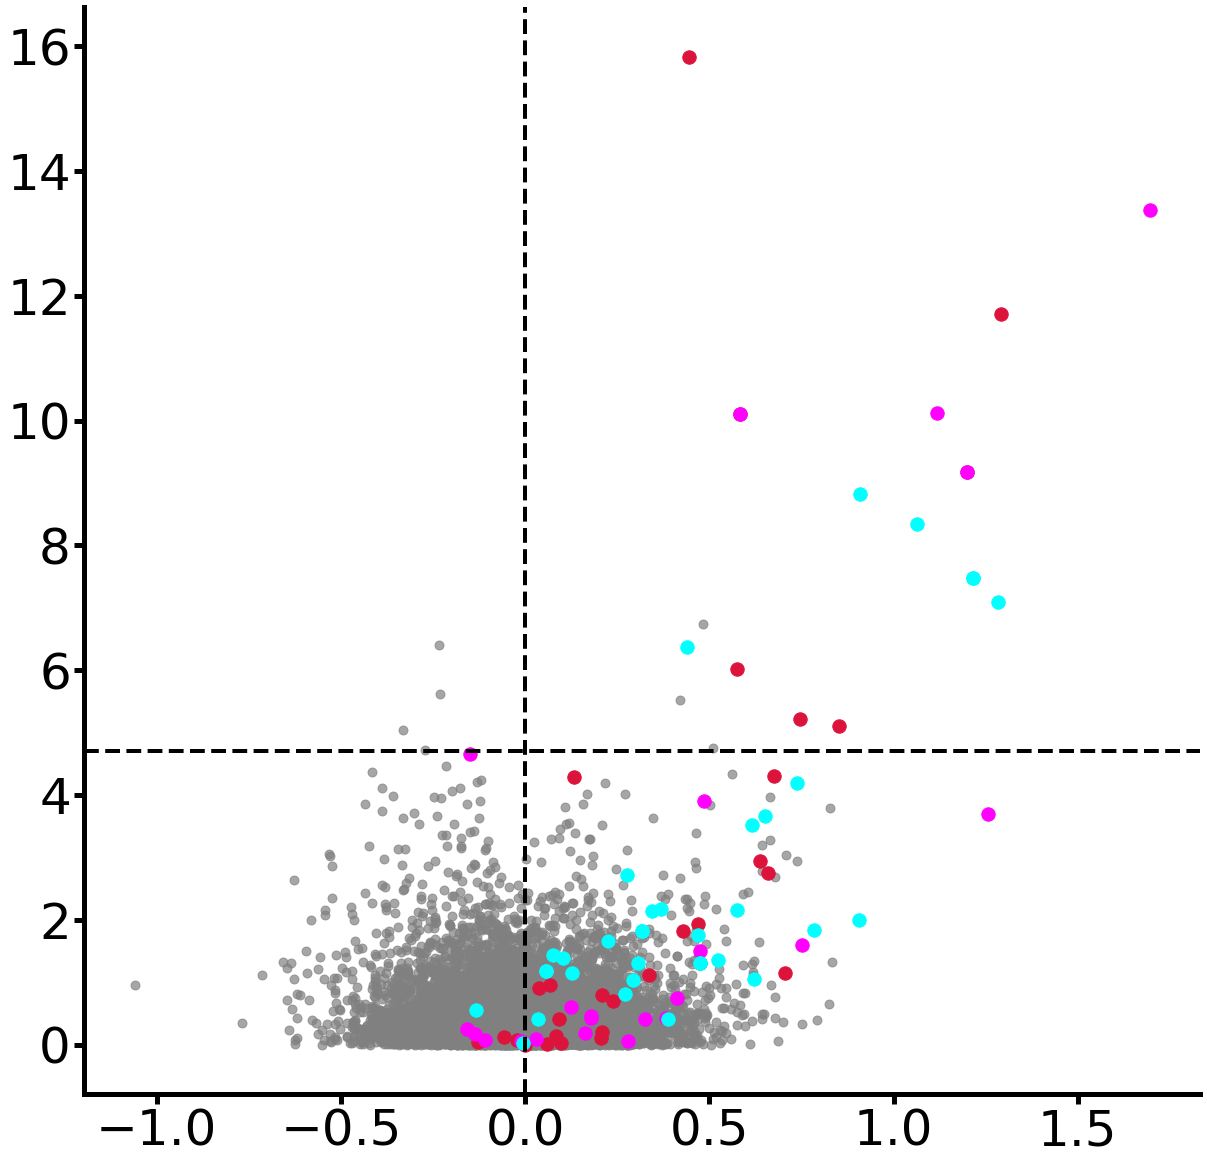

In [142]:
name_l = ['DAM', 'A1', 'PIG']
plot_l = dam, a1, pi
c_l = ['crimson', 'magenta', 'cyan']
fig,ax = plt.subplots(figsize=(20,20))
plt.scatter(p_mat['lfc'],-1*np.log10(p_mat['Pr(>Chisq)'].values), s=80,c='grey', alpha = 0.7)
for x,name in enumerate(name_l):
    plt.scatter(p_mat.loc[plot_l[x]['genes']]['lfc'], 
                -1*np.log10(p_mat.loc[plot_l[x]['genes']]['Pr(>Chisq)'].values),
                           s= 180, c = c_l[x])
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)
plt.axhline(y = 4.7, color='k', linestyle='--', linewidth=4)
plt.axvline(x=0, color='k', linestyle='--', linewidth=4)
plt.rcParams['axes.linewidth']=5
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', width=5, length=10) 
plt.savefig(s_code + 'prac.png', transparent=True)

plt.show()

In [137]:
dam

genes Unnamed: 1
index                        
Apoe          Apoe     P2ry12
B2m            B2m     P2ry13
Cstb          Cstb    Serinc3
Tyrobp      Tyrobp     Cx3cr1
Timp2        Timp2     Tgfbr1
H2-D1        H2-D1    Tmem119
Fth1          Fth1      Txnip
Lyz2          Lyz2       Glul
Ctsb          Ctsb     Crybb1
Ctsd          Ctsd       Ccr5
Ank            Ank       Cd33
Spp1          Spp1        NaN
Axl            Axl        NaN
Csf1          Csf1        NaN
Cst7          Cst7        NaN
Cadm1        Cadm1        NaN
Cd63          Cd63        NaN
Cd68          Cd68        NaN
Ctsa          Ctsa        NaN
Lpl            Lpl        NaN
Gusb          Gusb        NaN
Serpine2  Serpine2        NaN
Ctsz          Ctsz        NaN
Cd52          Cd52        NaN
Ctsl          Ctsl        NaN
Gas7          Gas7        NaN
Fabp3        Fabp3        NaN
Apbb2        Apbb2        NaN
Hif1a        Hif1a        NaN
Trem2        Trem2        NaN
Cd9            Cd9        NaN

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


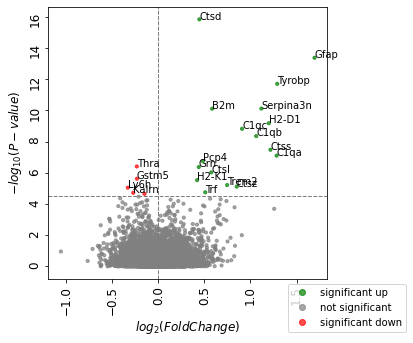

In [6]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=p_mat, lfc='lfc', pv='Pr(>Chisq)', dim = (5,5), dotsize=10, geneid = 'primerid', genenames = tuple(np.append(up_sig['primerid'].values, down_sig['primerid'].values)) , valpha = 0.7,gstyle=1, sign_line=True
                             ,show=True,plotlegend=True, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.00003,0.00003), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10, figtype='png')
                            

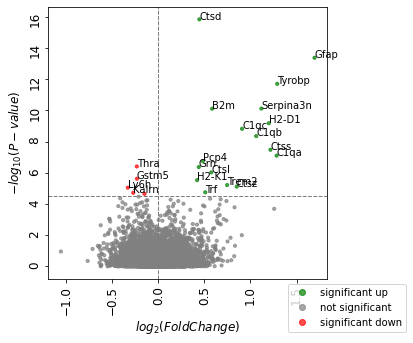

In [293]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=p_mat, lfc='lfc', pv='Pr(>Chisq)', dim = (5,5), dotsize=10, geneid = 'primerid', genenames = tuple(np.append(up_sig['primerid'].values, down_sig['primerid'].values)) , valpha = 0.7,gstyle=1, sign_line=True
                             ,show=True,plotlegend=True, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.00003,0.00003), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10, figtype='png')
                            

In [282]:
up_sig

primerid component contrast    Pr(>Chisq)     ci.hi     ci.lo  \
7713         B2m         C   plaque  7.825454e-11  0.434400  0.233449   
9689        C1qa         C   plaque  7.959798e-08  0.478249  0.222690   
9697        C1qb         C   plaque  4.468230e-09  0.508802  0.254259   
9713        C1qc         C   plaque  1.513674e-09  0.532314  0.271962   
16753       Ctsd         C   plaque  1.478572e-16  0.516652  0.318829   
16777       Ctsl         C   plaque  9.471184e-07  0.341570  0.146589   
16793       Ctss         C   plaque  3.352532e-08  0.493749  0.235344   
16801       Ctsz         C   plaque  7.670369e-06  0.393418  0.153913   
27249       Gfap         C   plaque  4.274470e-14  0.709591  0.418034   
29945        Grn         C   plaque  4.287887e-07  0.419483  0.185341   
30513      H2-D1         C   plaque  6.653836e-10  0.473146  0.245482   
30529      H2-K1         C   plaque  2.973008e-06  0.438646  0.179683   
49457       Pcp4         C   plaque  1.813771e-07  0.580791  0.263850   
63041  Serpina3n         C   plaque  7.667983e-11  0.627818  0.338336   
74681      Trem2         C   plaque  6.079588e-06  0.494887  0.196056   
74697        Trf         C   plaque  1.778746e-05  0.410276  0.153120   
76417     Tyrobp         C   plaque  1.999278e-12  0.590171  0.333455   

           coef         z          padj       lfc  
7713   0.333925  6.513834  1.633955e-07  0.583631  
9689   0.350469  5.375728  8.310029e-05  1.283681  
9697   0.381530  5.875514  5.831040e-06  1.062426  
9713   0.402138  6.054695  2.257537e-06  0.908809  
16753  0.417740  8.277687  1.543629e-12  0.445229  
16777  0.244079  4.907011  7.062797e-04  0.573926  
16793  0.364546  5.530051  3.888937e-05  1.216799  
16801  0.273666  4.479031  4.448814e-03  0.850714  
27249  0.563813  7.580364  2.231273e-10  1.695488  
29945  0.302412  5.062887  3.443503e-04  0.438496  
30513  0.359314  6.186693  1.157768e-06  1.199106  
30529  0.309164  4.679819  1.939888e-03  0.420524  
49457  0.422321  5.223263  1.721433e-04  0.484053  
63041  0.483077  6.541442  1.633955e-07  1.118216  
74681  0.345472  4.531743  3.733583e-03  0.746630  
74697  0.281698  4.294036  9.285054e-03  0.509160  
76417  0.461813  7.051669  6.957486e-09  1.290568

In [279]:
! mv /cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/old/volcano.png /cndd3/dburrows/CODE/spatial_transcriptomics/

In [277]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=p_mat, lfc='lfc', pv='Pr(>Chisq)', dim = (5,5), dotsize=10, geneid = 'primerid' , valpha = 0.7,gstyle=1, sign_line=True
                             ,show=False,plotlegend=False, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.00003,0.00003), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10, 
                             figtype='png')
                            

In [ ]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=plq_de, lfc='log2FoldChange', pv='pvalue', dim = (5,5), dotsize=10, geneid = 'geneid', genenames = tuple(plq_de[plq_de['padj'] < 0.1]['geneid'].values) , valpha = 0.7,gstyle=1, sign_line=True
                             ,show=True,plotlegend=True, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.0001,0.0001), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10, figtype='png')
                            

In [ ]:
#find up/down ribosomal genes
up_rp = np.intersect1d(rp_l, up_sig.primerid.values)
down_rp = np.intersect1d(rp_l, down_sig.primerid.values)

#find up/down dam genes
up_dam = np.intersect1d(dam_l, up_sig.primerid.values)
down_dam = np.intersect1d(dam_l, down_sig.primerid.values)

#sort 
mix_v = np.asarray([up_sig['padj'].iloc[np.where(up_sig['primerid'] == i)[0][0]] for i in up_rp])
sort_rpl = adm.sort_2list(mix_v, up_rp)[1]

mix_v = np.asarray([down_sig['padj'].iloc[np.where(down_sig['primerid'] == i)[0][0]] for i in down_dam])
sort_dam = adm.sort_2list(mix_v, down_dam)[1]


# Plaque environment

### Build metadata

In [6]:
#Calculate distance of each spot to nearest plaque, and save as metadata
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID

(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [125]:
#Calculate distance of each spot to nearest plaque, and save as metadata
#=======================================================================
name_l = ID
age='old'
#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    #Create metadata for each sample
    spot_df, gene_df = run_(age,ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex

    new_df = spot_df[['barcode', 'sample', 'sex', 'plaque', 'cluster', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'micron_x', 'micron_y']]
    new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
    new_df = pf.dist_nearest_plaq(new_df)
    #save to csv
    new_df.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/' + age + '/' + sub_ID[x] + '.csv')

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


KeyboardInterrupt: 

In [213]:
# Build metadata files for DAM score
#===================================================
data = pd.read_csv('/home/agelber/desp1/precast/prec_c25q25g3000/figures/fig4_app_basic/dam_scr/plts_dam_only/dam_score_pc1.csv.gz')
name_l = sub_ID
age = 'old'
for x,name in enumerate(name_l):
    name = name_l[x]
    curr_meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/old/' + name + '.csv', index_col=0)
    curr_data = data[data['sample'] == name]
    split = [curr_meta['barcode'].values[i].split('_')[0] for i in range(len(curr_meta))]

    dam_vec = np.zeros(len(curr_meta))
    #make all entires in dam_vec nan
    dam_vec[:] = np.nan
    for y in range(len(curr_data['cell'])):
        curr_cell = curr_data['cell'].values[y]
        dam_vec[np.where(np.asarray(split) == curr_cell)[0][0]]= curr_data['dam_scr'].values[y]
    curr_meta['dam_scr'] = dam_vec
    curr_meta.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/' + age + '/' + name + '.csv')
    print(name)

030-C
3397 3397
030-B
2835 2835
109-D
2953 2959
109-A
3197 3204
040-C
3405 3406
109-C
2981 3002
030-D
2996 2998
040-A
3343 3343
040-D
3285 3285


In [4]:
data = pd.read_csv('/home/agelber//desp1/cside/cortex2/full_mode/full_weights.csv')
data

cell sample  Astro NN  Car3 Glut   Endo NN  \
0      AAACAATCTACTAGCA-1  030-B  0.073048   0.057793  0.023776   
1      AAACCTAAGCAGCCGG-1  030-B  0.140324   0.000072  0.029232   
2      AAACGAAGAACATACC-1  030-B  0.125318   0.021977  0.019096   
3      AAACGAGACGGTTGAT-1  030-B  0.095110   0.002701  0.012869   
4      AAAGACCCAAGTCGCG-1  030-B  0.045714   0.007983  0.017545   
...                   ...    ...       ...        ...       ...   
73647  TTGTTGGCAATGACTG-1  351-D  0.033410   0.000046  0.008167   
73648  TTGTTTCACATCCAGG-1  351-D  0.050184   0.000033  0.000033   
73649  TTGTTTCATTAGTCTA-1  351-D  0.146577   0.000081  0.013481   
73650  TTGTTTCCATACAACT-1  351-D  0.102091   0.000069  0.021346   
73651  TTGTTTGTATTACACG-1  351-D  0.054181   0.000047  0.013493   

       IT EP-CLA Glut  L2_3 IT CTX Glut  L2_3 IT RSP Glut  L4_5 IT CTX Glut  \
0            0.042928          0.255525          0.000091          0.000069   
1            0.000798          0.084560          0.024403          0.196108   
2            0.000072          0.000072          0.000072          0.166064   
3            0.000048          0.000048          0.022035          0.392141   
4            0.072280          0.000103          0.000103          0.000103   
...               ...               ...               ...               ...   
73647        0.066245          0.431974          0.000046          0.000046   
73648        0.000033          0.000033          0.000033          0.000038   
73649        0.007844          0.000081          0.004173          0.000081   
73650        0.000069          0.000069          0.000069          0.000069   
73651        0.000047          0.000047          0.000047          0.000047   

       L5 ET CTX Glut  ...  Lamp5 Gaba  Microglia NN  Oligo NN    OPC NN  \
0            0.000069  ...    0.000069      0.010718  0.013498  0.002732   
1            0.000099  ...    0.000072      0.015962  0.031095  0.000072   
2            0.004767  ...    0.007440      0.009848  0.082167  0.000072   
3            0.000048  ...    0.003258      0.006844  0.043813  0.000048   
4            0.017414  ...    0.000103      0.009312  0.051187  0.009275   
...               ...  ...         ...           ...       ...       ...   
73647        0.000046  ...    0.009691      0.005742  0.041921  0.000046   
73648        0.000033  ...    0.006945      0.004002  0.084981  0.000033   
73649        0.007878  ...    0.000081      0.019325  0.087875  0.001947   
73650        0.074489  ...    0.000069      0.011274  0.063210  0.038232   
73651        0.010112  ...    0.000047      0.003643  0.036678  0.000047   

        Peri NN  Pvalb Gaba    SMC NN  Sncg Gaba  Sst Gaba  Vip Gaba  
0      0.005007    0.015495  0.000069   0.012721  0.005471  0.000718  
1      0.000072    0.074420  0.000072   0.002771  0.031605  0.040554  
2      0.003275    0.094691  0.002036   0.000072  0.010365  0.000072  
3      0.000048    0.054708  0.002132   0.008263  0.141203  0.000048  
4      0.003585    0.107564  0.013525   0.011154  0.081786  0.001191  
...         ...         ...       ...        ...       ...       ...  
73647  0.000280    0.081007  0.000511   0.000046  0.026125  0.000046  
73648  0.000033    0.000033  0.011298   0.000033  0.000033  0.000033  
73649  0.008267    0.000081  0.000081   0.000081  0.003294  0.034568  
73650  0.000069    0.093838  0.000069   0.000069  0.009750  0.000069  
73651  0.015925    0.053743  0.000047   0.026004  0.026365  0.000047  

[73652 rows x 25 columns]

In [235]:
# Build metadata files for cell type proportions
#===================================================
data = pd.read_csv('/home/agelber//desp1/cside/cortex2/full_mode/full_weights.csv')

name_l = sub_ID
age = 'old'

for x,name in enumerate(name_l):
    name = name_l[x]
    curr_meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/old/' + name + '.csv', index_col=0)
    new_cols = np.append(curr_meta.columns.values, curr_data.columns[2:].values)
    curr_data = data[data['sample'] == name]
    split = [curr_meta['barcode'].values[i].split('_')[0] for i in range(len(curr_meta))]

    for y in range(len(curr_data['cell'])):
        curr_cell = curr_data['cell'].values[y]
        ind = np.where(np.asarray(split) == curr_cell)[0][0]
        curr_meta_slice = curr_meta.iloc[ind]
        curr_prop = curr_data.iloc[y][2:]
        curr_row = np.append(curr_meta_slice,curr_prop)
        if y == 0:
            curr_mat = curr_row
        else:
            curr_mat = np.vstack((curr_mat, curr_row))

    new_df = pd.DataFrame(curr_mat, columns=new_cols)
    new_df.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/cside/' + age + '/' + name + '-proportions.csv')

### Build observation and design matrices for mixed effects models

In [120]:
#Calculate distance of each spot to nearest plaque, and save as metadata
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID

(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [8]:
#stack spot data together for DESEQ and visualisation -> cortex only
# Plaque vs no plaque
name_l = ID
age='old'
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    name = name_l[x]
    spot_df, gene_df = run_(age, ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex

    new_df = spot_df[['barcode', 'sample', 'sex', 'plaque', 'cluster', 'micron_x', 'micron_y']]
    new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    ind = [i for i in range(len(new_df)) if 'Cortex L' in new_df['cluster'].iloc[i]]
    new_df = pf.dist_nearest_plaq(new_df)
    new_df = new_df.iloc[ind]
    new_df.drop(['plaque', 'cluster', 'micron_x', 'micron_y'], axis=1, inplace=True)
    gene_df  = gene_df.iloc[ind]

    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')

dm = lab
# dist_ = dm['dist_nearest_plaq'].values
# new_dist = (dist_ - np.mean(dist_))/np.std(dist_)
# dm['dist_nearest_plaq'] = new_dist

# make design matrix 
dm.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plqdist_design_nonscaled.csv')
gene_all.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plqdist_CPM.csv')

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 2835
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 2959
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 3204
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 3406
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 3002
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 2998
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 3343
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Number of spots: 3285
Number of genes: 32284


/tmp/ipykernel_1198319/714430529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
/cndd3/dburrows/CODE/spatial_transcriptomics/plaque_f.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_nearest_plaq'] = dist_v
/tmp/ipykernel_1198319/714430529.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [2]:
pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plqdist_design_nonscaled.csv')

barcode sample sex  dist_nearest_plaq
0     AAACAGTGTTCCTGGG-1_030-C  030-C   F         361.977789
1     AAACCGGGTAGGTACC-1_030-C  030-C   F         697.281805
2     AAACCGTTCGTCCAGG-1_030-C  030-C   F          98.155009
3     AAACCTCATGAAGTTG-1_030-C  030-C   F        1111.520238
4     AAACGGGTTGGTATCC-1_030-C  030-C   F         970.737604
...                        ...    ...  ..                ...
8312  TTGTTTCACATCCAGG-1_040-D  040-D   F         264.686204
8313  TTGTTTCATTAGTCTA-1_040-D  040-D   F         298.551842
8314  TTGTTTCCATACAACT-1_040-D  040-D   F          97.371988
8315  TTGTTTGTATTACACG-1_040-D  040-D   F         268.252716
8316  TTGTTTGTGTAAATTC-1_040-D  040-D   F         953.542679

[8317 rows x 4 columns]

In [7]:
#stack spot data together for MAST -> cortex only
#===================================================
# #Load stacked gene and metadata
gene_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plqdist_CPM.csv', index_col=0)
lab_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plqdist_design_nonscaled.csv', index_col=0)

#Log transform CPMs and plus 1 for MAST
gene_mast = np.log2(gene_all+1)

#remove header and index from gene_all
gene_mast.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_log2p1CPM.csv')

# Create csv design matrix for MAST -> distance from plaque, donor ID
lab_all['wellKey'] = lab_all.index
curr_lab = lab_all[['wellKey', 'dist_nearest_plaq', 'sample']]
#drop index from lab_all
curr_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_design.csv', index=False, header=True)

# Create csv of gene names for MAST
fdata_mast = gene_mast.index.values
#save both as csv
np.savetxt('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_fData-genes.csv', fdata_mast, delimiter=',', fmt='%s')


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [9]:
#stack spot data together for MAST -> cortex only, reduced distance only < 600um
#===================================================
# #Load stacked gene and metadata
gene_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plqdist_CPM.csv', index_col=0)
lab_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/plaque_environment/old-APP-cortex_plqdist_design_nonscaled.csv', index_col=0)

# Create csv design matrix for MAST -> distance from plaque, donor ID
lab_all['wellKey'] = lab_all.index
curr_lab = lab_all[['wellKey', 'dist_nearest_plaq', 'sample']]
sub_lab = curr_lab[curr_lab['dist_nearest_plaq']< 600]

#drop index from lab_all
sub_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_design_reduced.csv', index=False, header=True)

# #Log transform CPMs and plus 1 for MAST
gene_mast = np.log2(gene_all+1)
sub_gene = gene_mast[sub_lab.index.values]

#remove header and index from gene_all
sub_gene.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_log2p1CPM_reduced.csv')

# Create csv of gene names for MAST
fdata_mast = sub_gene.index.values
# #save both as csv
np.savetxt('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_fData-genes.csv', fdata_mast, delimiter=',', fmt='%s')



### Gene expression as a function of plaque distance

In [2]:
#visualise ribosomal genes 
#REF -> https://www.genenames.org/data/genegroup/#!/group/1054
#what fraction are expressed? 
#Make list of ribosomal proteins
rp_l = ['Rpsa', 'Rps2', 'Rps3', 'Rps3a', 'Rps4x', 'Rps4y1', 'Rps4y2', 'Rps5', 'Rps6', 'Rps7',
        'Rps8', 'Rps9', 'Rps10', 'Rps11', 'Rps12', 'Rps13', 'Rps14', 'Rps15', 'Rps15a', 'Rps16',
        'Rps17', 'Rps18', 'Rps19', 'Rps20', 'Rps21', 'Rps23', 'Rps24', 'Rps25', 'Rps26',
        'Rps27', 'Rps27a', 'Rps27l', 'Rps28', 'Rps29', 'Rps30', 'Rplp0', 'Rplp1', 'Rplp2',
        'Rpl3', 'Rpl3l', 'Rpl4', 'Rpl5', 'Rpl6', 'Rpl7', 'Rpl7a', 'Rpl7l1', 'Rpl8', 'Rpl9',
        'Rpl10', 'Rpl10a', 'Rpl10l', 'Rpl11', 'Rpl12', 'Rpl13', 'Rpl13a', 'Rpl14', 'Rpl15',
        'Rpl17', 'Rpl18', 'Rpl18a', 'Rpl19', 'Rpl21', 'Rpl22', 'Rpl22l1', 'Rpl23', 'Rpl23a', 
        'Rpl24', 'Rpl26', 'Rpl26l1', 'Rpl27', 'Rpl27a', 'Rpl28', 'Rpl29', 'Rpl30', 'Rpl31', 
        'Rpl32', 'Rpl34', 'Rpl35', 'Rpl35a', 'Rpl36', 'Rpl36a', 'Rpl36al', 'Rpl37', 'Rpl37a',
        'Rpl38', 'Rpl39', 'Rpl39l1','Rpl40', 'Rpl41', 'Rpl39l', 'Rps3a1', ]
len(rp_l)
#Save rp_l
#np.savetxt('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/ribosomal_proteins.csv', rp_l, delimiter=',', fmt='%s')


91

In [3]:
#visualise DAM genes
#what fraction are expressed? 
dam_l = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/DAM.csv')
#remove first row and second column
dam_l = dam_l.iloc[1:, 0]
len(dam_l)

39

In [4]:
import mne
#Load stacked gene and metadata for plotting
#============================================
gene_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_CPM.csv', index_col=0)
lab_all = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_design_reduced.csv', index_col=0)

gene_all = gene_all[lab_all.index.values]

#load in MAST results
mast = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_MAST-LRT_sample-intercept_reduced.csv', index_col=0)


#subset matrix for pvalues select coefficient matrix where component column == C and contract column == dist_nearest_plaq
p_mat = mast[mast['component'] == 'C']
p_mat = p_mat[p_mat['contrast'] == 'dist_nearest_plaq']
p_mat['Pr(>Chisq)'] = p_mat['Pr(>Chisq)'].fillna(1)
sig_v, adj_p_vals = mne.stats.fdr_correction(p_mat['Pr(>Chisq)'].values, 0.05, 'indep') #Use Benjamini hochberg FDR test 
p_mat['padj'] = adj_p_vals

#subset matrix for lfc
lfc_mat = mast[mast['component'] == 'logFC']
lfc_mat = lfc_mat[lfc_mat['contrast'] == 'dist_nearest_plaq']

#check matrix indeces are the same
assert sum(lfc_mat['primerid'].values == p_mat['primerid'].values) == len(lfc_mat['primerid'].values), 'lfc_mat and p_mat indeces do not match'

#Append lfc to p values matrix
p_mat['lfc'] = lfc_mat['coef'].values
p_mat['lfc'] = p_mat['lfc'].fillna(0)

#find up and down genes
up = p_mat[p_mat['z'] >0]
down = p_mat[p_mat['z'] <0]
up_sig = up[up['padj'].values < 0.01]
down_sig = down[down['padj'].values < 0.01]

#find up/down ribosomal genes
up_rp = np.intersect1d(rp_l, up_sig.primerid.values)
down_rp = np.intersect1d(rp_l, down_sig.primerid.values)

#find up/down dam genes
up_dam = np.intersect1d(dam_l, up_sig.primerid.values)
down_dam = np.intersect1d(dam_l, down_sig.primerid.values)

#sort 
mix_v = np.asarray([up_sig['padj'].iloc[np.where(up_sig['primerid'] == i)[0][0]] for i in up_rp])
sort_rpl = adm.sort_2list(mix_v, up_rp)[1]

mix_v = np.asarray([down_sig['padj'].iloc[np.where(down_sig['primerid'] == i)[0][0]] for i in down_dam])
sort_dam = adm.sort_2list(mix_v, down_dam)[1]


In [327]:
down_dam

array(['B2m', 'Cd52', 'Cd9', 'Cst7', 'Ctsb', 'Ctsd', 'Ctsz', 'H2-D1',
       'Lyz2', 'Trem2', 'Tyrobp'], dtype=object)

In [325]:
up_sig = up[up['padj'].values < 0.1]
down_sig = down[down['padj'].values < 0.1]

len(up_sig) + len(down_sig)

908

In [28]:
up_rp, down_rp, up_dam, down_dam

(array(['Rpl11', 'Rpl13', 'Rpl19', 'Rpl21', 'Rpl22l1', 'Rpl29', 'Rpl30',
        'Rpl35a', 'Rpl9', 'Rps15', 'Rps27', 'Rps3a1', 'Rps7', 'Rps8'],
       dtype=object),
 array([], dtype=object),
 array(['Cadm1'], dtype=object),
 array(['B2m', 'Cd52', 'Cd9', 'Cst7', 'Ctsb', 'Ctsd', 'Ctsz', 'H2-D1',
        'Lyz2', 'Trem2', 'Tyrobp'], dtype=object))

In [23]:
#save p_mat
p_mat.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/MAST/plaque_environment/old-APP-cortex_plqdist_MAST-LRT_sample-intercept_padj_reduced.csv')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


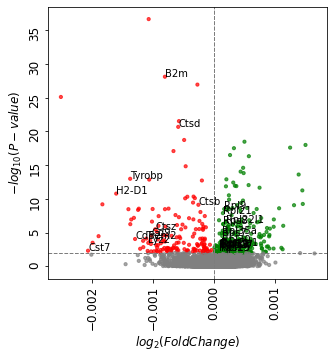

In [8]:
# Volcano plot -> <3000um
#drop extreme value from plot
new_ = p_mat.drop(p_mat.index[np.where(p_mat['lfc'].values == np.min(p_mat['lfc'].values))[0][0]])

from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=new_, lfc='lfc', pv='padj', dim = (5,5), dotsize=10, valpha = 0.7,gstyle=1, sign_line=True,geneid='primerid', genenames= tuple(np.append(sort_dam,sort_rpl))
                             ,show=True,plotlegend=False, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.01,0.01), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10)
                            

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


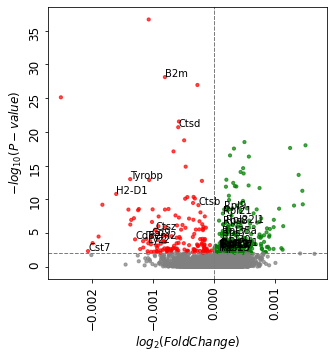

In [24]:
# Volcano plot -> <3000um
#drop extreme value from plot
new_ = p_mat.drop(p_mat.index[np.where(p_mat['lfc'].values == np.min(p_mat['lfc'].values))[0][0]])

from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=new_, lfc='lfc', pv='padj', dim = (5,5), dotsize=10, valpha = 0.7,gstyle=1, sign_line=True,geneid='primerid', genenames= tuple(np.append(sort_dam,sort_rpl))
                             ,show=True,plotlegend=False, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.01,0.01), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10)
                            

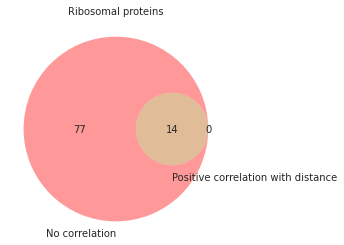

In [27]:

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

#make venn diagram of ribosomal proteins

#make venn diagram of up_rp, down_rp and rp_l
#plot seaborn white background
sns.set_style("white")

venn2(subsets = (len(rp_l)-len(up_rp),0,len(up_rp)), set_labels = ('No correlation', 'Positive correlation with distance'))
plt.title('Ribosomal proteins', fontsize=10)
#reduce label fontsize
for text in plt.gca().texts:
    text.set_fontsize(10)
#plt.savefig(s_fig + 'venn_ribosomal.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

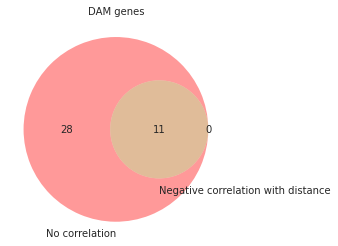

In [28]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

#make venn diagram of dam genes
sns.set_style("white")
venn2(subsets = (len(dam_l)-len(down_dam),0,len(down_dam)), set_labels = ('No correlation', 'Negative correlation with distance'))
plt.title('DAM genes', fontsize=10)
#reduce label fontsize
for text in plt.gca().texts:
    text.set_fontsize(10)
plt.savefig(s_fig + 'venn_dam.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [89]:
#plot as a function of distance -> ribosomal proteins

from scipy import stats
#pull out significant genes
gene_set = sort_rpl
curr_gene = gene_all.loc[gene_set]
curr_lab = lab_all.loc[curr_gene.columns.values]
assert np.all(curr_gene.columns.values == curr_lab.index.values)

#bin data
nbins=100
dist_flat = curr_lab['dist_nearest_plaq'].values
umi_flat = curr_lab.index.values

#sort by umis by distance
sort_dist, sort_umi = adm.sort_2list(dist_flat, umi_flat)
#Define number of bins
bins = (np.linspace(np.min(sort_dist), np.max(sort_dist), nbins+1)).astype(int)
bin_means, bin_edges, binnumber = stats.binned_statistic(sort_dist, curr_gene[sort_umi], statistic='mean', bins=bins)
bin_std, bin_edges, binnumber = stats.binned_statistic(sort_dist, curr_gene[sort_umi], statistic='std', bins=bins)


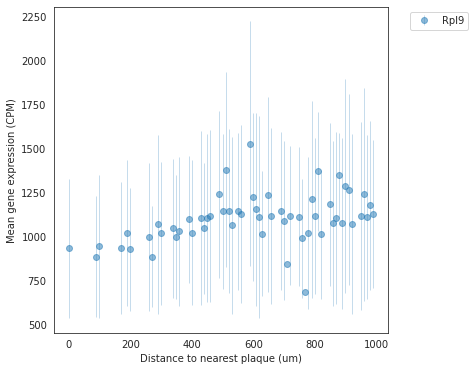

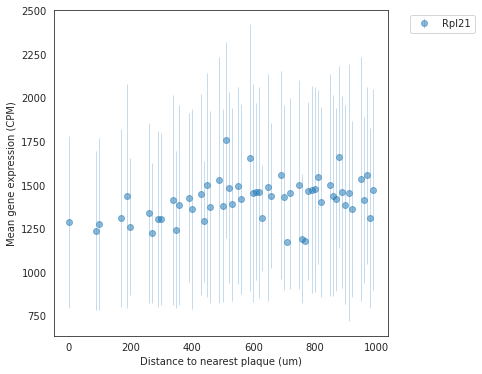

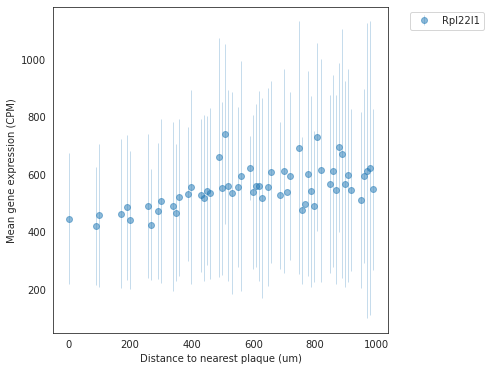

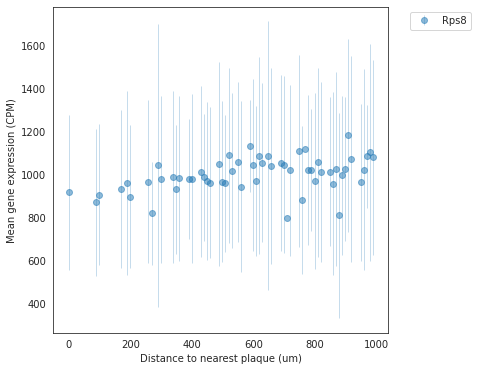

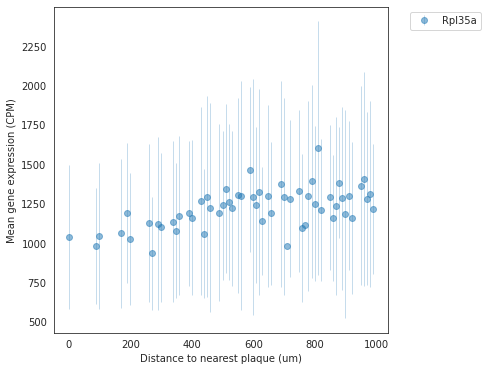

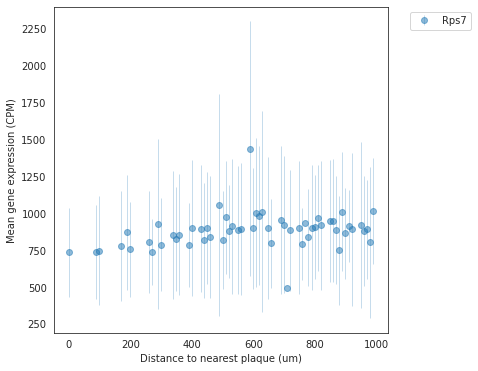

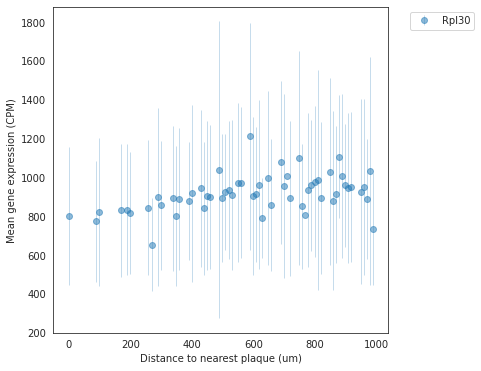

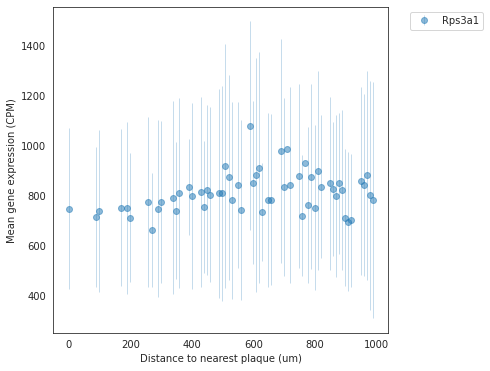

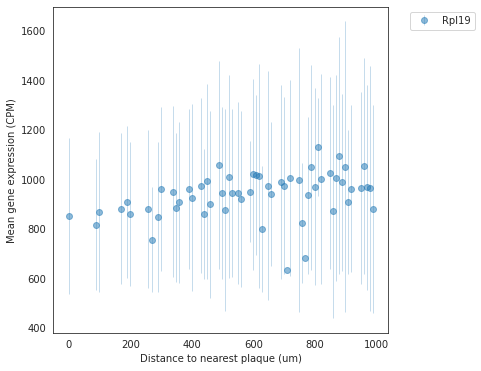

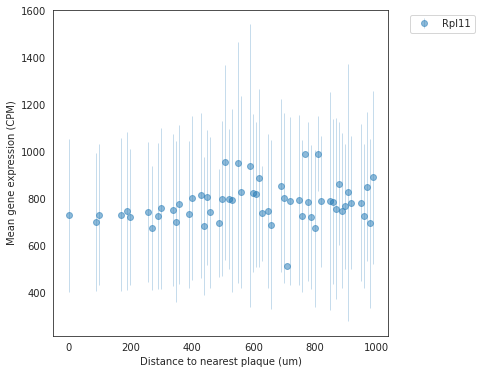

In [30]:
curr_bin_means = bin_means
curr_bin_std = bin_std
#plot all together as 10 subplots
for i in range(curr_bin_means.shape[0]):

    plt.figure(figsize=(6,6))
    plt.errorbar(bin_edges[:-1], curr_bin_means[i,:], yerr=curr_bin_std[i,:], fmt='o',elinewidth=0.5, capsize=0, alpha=0.5, label = gene_set[i])
    plt.xlabel('Distance to nearest plaque (um)', fontsize=10)
    plt.ylabel('Mean gene expression (CPM)', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    #place legend off plot
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [31]:
up_rp

array(['Rpl11', 'Rpl13', 'Rpl19', 'Rpl21', 'Rpl22l1', 'Rpl29', 'Rpl30',
       'Rpl35a', 'Rpl9', 'Rps15', 'Rps27', 'Rps3a1', 'Rps7', 'Rps8'],
      dtype=object)

In [71]:
! cd /cndd3/dburrows/CODE/spatial_transcriptomics

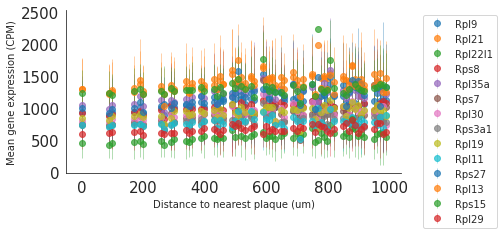

In [91]:
curr_bin_means = bin_means
curr_bin_std = bin_std
plt.figure(figsize=(6,3))
#loop in reverese order
for i in range(curr_bin_means.shape[0]):

    plt.errorbar(bin_edges[:-1], curr_bin_means[i,:], yerr=curr_bin_std[i,:], fmt='o',elinewidth=0.5, capsize=0, alpha=0.7, label = gene_set[i])

plt.xlabel('Distance to nearest plaque (um)', fontsize=10)
plt.ylabel('Mean gene expression (CPM)', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale()
#place legend off plot
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
#remove top and right spines
sns.despine(top=True, right=True)
plt.savefig(s_code+ 'ribosomal_proteins_lineplot.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [94]:
gene_all

AAACAGTGTTCCTGGG-1_030-C  AAACCGGGTAGGTACC-1_030-C  \
Xkr4                            0.000000                  0.000000   
Gm19938                         0.000000                  0.000000   
Sox17                           0.000000                  0.000000   
Mrpl15                         91.047730                  0.000000   
Lypla1                         45.523865                 43.929012   
...                                  ...                       ...   
Spry3                           0.000000                  0.000000   
Tmlhe                           0.000000                  0.000000   
4933409K07Rik                   0.000000                  0.000000   
CAAA01147332.1                  0.000000                  0.000000   
AC149090.1                    273.143200                175.716050   

                AAACCGTTCGTCCAGG-1_030-C  AAACGGGTTGGTATCC-1_030-C  \
Xkr4                            0.000000                  0.000000   
Gm19938                         0.000000                  0.000000   
Sox17                           0.000000                  0.000000   
Mrpl15                         49.828094                 53.513138   
Lypla1                          0.000000                  0.000000   
...                                  ...                       ...   
Spry3                           0.000000                 53.513138   
Tmlhe                           0.000000                  0.000000   
4933409K07Rik                   0.000000                  0.000000   
CAAA01147332.1                  0.000000                  0.000000   
AC149090.1                     99.656190                374.591980   

                AAACGGTTGCGAACTG-1_030-C  AAACTTGCAAACGTAT-1_030-C  \
Xkr4                            0.000000                 26.836992   
Gm19938                         0.000000                  0.000000   
Sox17                           0.000000                 26.836992   
Mrpl15                         28.636885                 26.836992   
Lypla1                         28.636885                 80.510980   
...                                  ...                       ...   
Spry3                          28.636885                  0.000000   
Tmlhe                           0.000000                  0.000000   
4933409K07Rik                   0.000000                  0.000000   
CAAA01147332.1                  0.000000                  0.000000   
AC149090.1                    114.547540                322.043900   

                AAAGGCTACGGACCAT-1_030-C  AAAGTAGCATTGCTCA-1_030-C  \
Xkr4                             0.00000                  0.000000   
Gm19938                          0.00000                  0.000000   
Sox17                            0.00000                 38.095238   
Mrpl15                          34.38908                 76.190475   
Lypla1                          68.77816                 38.095238   
...                                  ...                       ...   
Spry3                           34.38908                 76.190475   
Tmlhe                            0.00000                  0.000000   
4933409K07Rik                    0.00000                  0.000000   
CAAA01147332.1                   0.00000                  0.000000   
AC149090.1                     412.66895                304.761900   

                AAATGCTCGTTACGTT-1_030-C  AAATTGATAGTCCTTT-1_030-C  ...  \
Xkr4                             0.00000                  0.000000  ...   
Gm19938                          0.00000                  0.000000  ...   
Sox17                            0.00000                  0.000000  ...   
Mrpl15                           0.00000                 44.267376  ...   
Lypla1                          58.48979                 44.267376  ...   
...                                  ...                       ...  ...   
Spry3                            0.00000                  0.000000  ...   
Tmlhe                            0.00000            

In [161]:
#plot as a function of distance -> ribosomal proteins
from scipy import stats
#pull out significant genes
gene_set = sort_dam
curr_gene = gene_all.loc[gene_set]
curr_lab = lab_all.loc[curr_gene.columns.values]
assert np.all(curr_gene.columns.values == curr_lab.index.values)

#bin data
nbins=20
dist_flat = curr_lab['dist_nearest_plaq'].values
umi_flat = curr_lab.index.values

#sort by umis by distance
sort_dist, sort_umi = adm.sort_2list(dist_flat, umi_flat)
curr_gene = np.log2(curr_gene+1)
sub_gene = curr_gene.subtract(np.mean(curr_gene, axis=1).values, axis=0)
norm_gene = sub_gene.div(np.std(curr_gene, axis=1).values, axis=0)
#Define number of bins
bins = (np.linspace(np.min(sort_dist), np.max(sort_dist), nbins+1)).astype(int)
#bins = (np.geomspace(np.min(sort_dist)+1, np.max(sort_dist), nbins)).astype(int)
bin_means, bin_edges, binnumber = stats.binned_statistic(sort_dist, norm_gene[sort_umi], statistic='mean', bins=bins)
bin_std, bin_edges, binnumber = stats.binned_statistic(sort_dist, norm_gene[sort_umi], statistic='std', bins=bins)
bin_count, bin_edges, binnumber = stats.binned_statistic(sort_dist, norm_gene[sort_umi], statistic='count', bins=bins)
bin_ste = bin_std/np.sqrt(bin_count)
bin_ste = np.nan_to_num(bin_ste, nan=0.0)

/tmp/ipykernel_2234536/880384106.py:25: RuntimeWarning: invalid value encountered in true_divide
  bin_ste = bin_std/np.sqrt(bin_count)


In [155]:
bins

array([  0,  29,  59,  89, 119, 149, 179, 209, 239, 269, 299, 329, 359,
       389, 419, 449, 479, 509, 539, 569, 599])

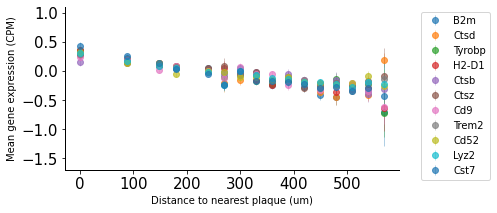

In [174]:
curr_bin_means = bin_means
curr_bin_ste = bin_ste
plt.figure(figsize=(6,3))
#loop in reverese order
for i in range(curr_bin_means.shape[0]):
    plt.errorbar(bin_edges[:-1], curr_bin_means[i,:], yerr=curr_bin_ste[i,:], fmt='o',elinewidth=0.5, capsize=0, alpha=0.7, label = gene_set[i])

plt.xlabel('Distance to nearest plaque (um)', fontsize=10)
plt.ylabel('Mean gene expression (CPM)', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylim(-1.7,1.1)
#place legend off plot
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.rcParams['axes.linewidth']=5
plt.savefig(s_code + 'dam_lineplot.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

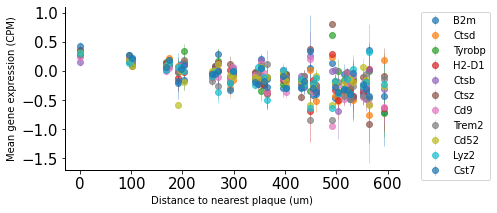

In [150]:
curr_bin_means = bin_means
curr_bin_ste = bin_ste
plt.figure(figsize=(6,3))
#loop in reverese order
for i in range(curr_bin_means.shape[0]):
    plt.errorbar(bin_edges[:-1], curr_bin_means[i,:], yerr=curr_bin_ste[i,:], fmt='o',elinewidth=0.5, capsize=0, alpha=0.7, label = gene_set[i])

plt.xlabel('Distance to nearest plaque (um)', fontsize=10)
plt.ylabel('Mean gene expression (CPM)', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylim(-1.7,1.1)
#place legend off plot
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.rcParams['axes.linewidth']=0
plt.savefig(s_code + 'dam_lineplot.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

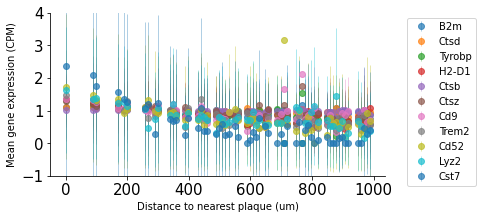

In [106]:
curr_bin_means = bin_means
curr_bin_std = bin_std
plt.figure(figsize=(6,3))
#loop in reverese order
for i in range(curr_bin_means.shape[0]):
    plt.errorbar(bin_edges[:-1], curr_bin_means[i,:], yerr=curr_bin_std[i,:], fmt='o',elinewidth=0.5, capsize=0, alpha=0.7, label = gene_set[i])

plt.xlabel('Distance to nearest plaque (um)', fontsize=10)
plt.ylabel('Mean gene expression (CPM)', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylim(-1,4)
#place legend off plot
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.savefig(s_code + 'dam_lineplot.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [84]:
! rm dam_lineplot.svg

In [ ]:
curr_bin_means = bin_means
curr_bin_std = bin_std
plt.figure(figsize=(6,3))
#loop in reverese order
for i in range(curr_bin_means.shape[0]):
    plt.errorbar(bin_edges[:-1], curr_bin_means[i,:], yerr=curr_bin_std[i,:], fmt='o',elinewidth=0.5, capsize=0, alpha=0.7, label = gene_set[i])

plt.xlabel('Distance to nearest plaque (um)', fontsize=10)
plt.ylabel('Mean gene expression (CPM)', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylim(0,1500)
#place legend off plot
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.savefig(s_code+'dam_lineplot.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

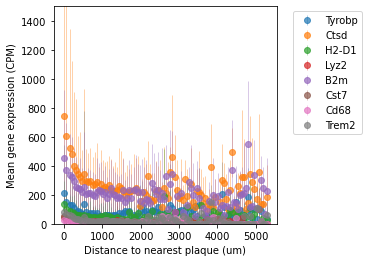

In [24]:
curr_bin_means = bin_means
curr_bin_std = bin_std
plt.figure(figsize=(4,4))
#loop in reverese order
for i in range(curr_bin_means.shape[0]):
    plt.errorbar(bin_edges[:-1], curr_bin_means[i,:], yerr=curr_bin_std[i,:], fmt='o',elinewidth=0.5, capsize=0, alpha=0.7, label = gene_set[i])

plt.xlabel('Distance to nearest plaque (um)', fontsize=10)
plt.ylabel('Mean gene expression (CPM)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.yscale('log')
plt.ylim(0,1500)
#place legend off plot
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(s_fig + 'dam_lineplot.svg', dpi=300, bbox_inches='tight')
plt.show()

In [340]:
#gene set enrichment / GO analysis

91

### DAM score as a function of plaque distance

In [7]:
#Group dam scores metadata into single dataframe
age='old'
for x,name in enumerate(sub_ID):
    curr_ = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/' + age + '/' + name + '.csv', index_col=0)
    #take cortex only
    ind = [i for i in range(len(curr_)) if 'Cortex L' in curr_['cluster'].iloc[i]]
    curr_ = curr_.iloc[ind]
    curr_ = curr_[['sample', 'dist_nearest_plaq', 'dam_scr']]
    if x!=0:dam_df = pd.concat([dam_df, curr_], axis=0)
    else: dam_df  = curr_
dam_df = dam_df[dam_df['dist_nearest_plaq'] < 1500]

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = dam_df
#Remove all rows with nans in data
data = data[data.dam_scr.notnull()]
md = smf.mixedlm("dam_scr ~ dist_nearest_plaq", data, groups=data["sample"])
mdf = md.fit()

print(mdf.summary())


            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  dam_scr    
No. Observations:   7394     Method:              REML       
No. Groups:         9        Scale:               1.7964     
Min. group size:    545      Log-Likelihood:      -12695.3521
Max. group size:    997      Converged:           Yes        
Mean group size:    821.6                                    
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          1.029    0.448   2.299 0.022  0.152  1.907
dist_nearest_plaq -0.001    0.000 -10.758 0.000 -0.001 -0.000
Group Var          1.796    0.666                            



In [9]:
from scipy import stats
#bin data
nbins=60
dist_flat = data['dist_nearest_plaq'].values
umi_flat = data['dam_scr']

#sort by umis by distance
sort_dist, sort_umi = adm.sort_2list(dist_flat, umi_flat)
#Define number of bins
bins = (np.linspace(np.min(sort_dist), np.max(sort_dist), nbins+1)).astype(int)
bin_means, bin_edges, binnumber = stats.binned_statistic(sort_dist, sort_umi, statistic='mean', bins=bins)
bin_std, bin_edges, binnumber = stats.binned_statistic(sort_dist, sort_umi, statistic='std', bins=bins)
bin_count, bin_edges, binnumber = stats.binned_statistic(sort_dist, sort_umi, statistic='count', bins=bins)
bin_ste = bin_std/np.sqrt(bin_count)
bin_ste = np.nan_to_num(bin_ste, nan=0.0)

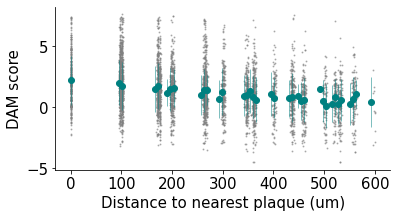

In [17]:
curr_bin_means = bin_means
curr_bin_std = bin_std
fig,ax = plt.subplots(figsize=(6,3))
#loop in reverese order
plt.errorbar(bin_edges[:-1], curr_bin_means, yerr=curr_bin_std, fmt='o',elinewidth=0.5, capsize=0, alpha=1, c='teal')
ax.scatter(data['dist_nearest_plaq'], data['dam_scr'], alpha=0.5, s=1, c='grey')
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('DAM score', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.ylim(0,1500)
sns.despine(top=True, right=True)
#plt.yscale('log')
plt.savefig(s_code+'dam_vs_dist.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

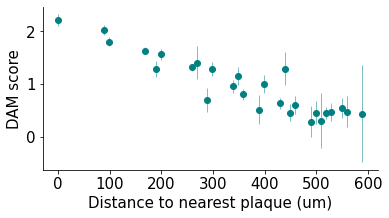

In [25]:
curr_bin_means = bin_means
curr_bin_ste = bin_ste
fig,ax = plt.subplots(figsize=(6,3))
#loop in reverese order
plt.errorbar(bin_edges[:-1], curr_bin_means, yerr=curr_bin_ste, fmt='o',elinewidth=0.5, capsize=0, alpha=1, c='teal')
#ax.scatter(data['dist_nearest_plaq'], data['dam_scr'], alpha=0.5, s=1, c='grey')
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('DAM score', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.ylim(0,1500)
sns.despine(top=True, right=True)
#plt.yscale('log')
plt.savefig(s_code+'dam_vs_dist.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

/tmp/ipykernel_4003042/2625938935.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = mdf.params[0] + mdf.params[1]*x


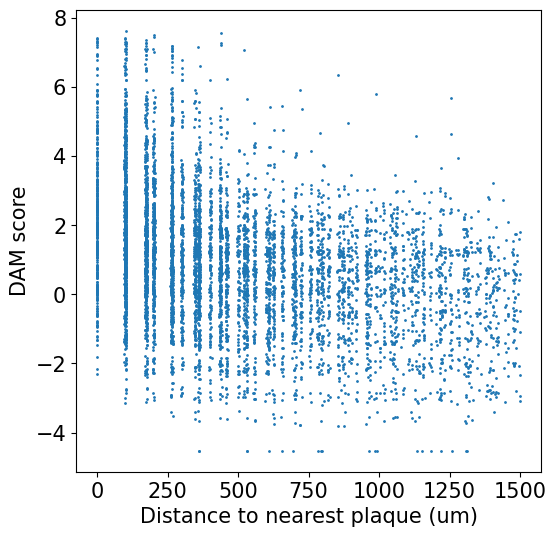

In [12]:
#plot DAM score vs distance to nearest plaque
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(data['dist_nearest_plaq'], data['dam_scr'], alpha=1, s=1)
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('DAM score', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plot line of best fit
#x = np.linspace(0, 600, 100)
y = mdf.params[0] + mdf.params[1]*x
ax.plot(x, y, color='black', linewidth=2, linestyle='--')
#plt.savefig(s_fig + 'dam_vs_dist.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

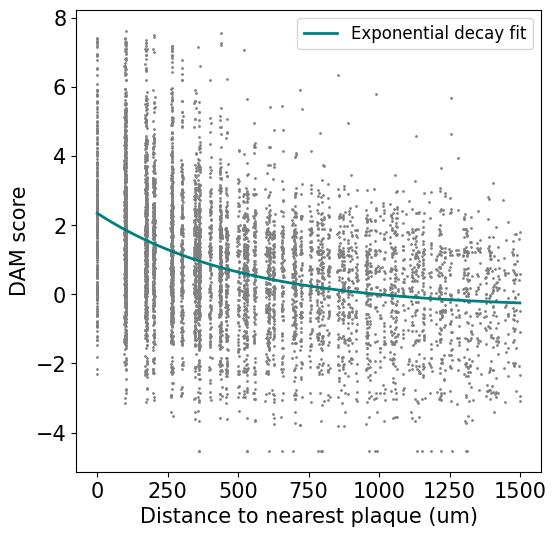

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decay function with a slower decay rate
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Extract the x and y data
x_data = data['dist_nearest_plaq']
y_data = data['dam_scr']

# Provide initial parameter estimates
initial_guess = [1, 0.001, 0]  # Adjust these values as needed

# Fit the exponential decay model to the data
params, covariance = curve_fit(exp_decay, x_data, y_data, p0=initial_guess)

# Generate x values for plotting the fit
x_fit = np.linspace(x_data.min(), x_data.max(), 1000)
y_fit = exp_decay(x_fit, *params)

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_data, y_data, alpha=1, s=1, c='grey')

# Plot the line of best fit (linear fit)
# Plot the exponential decay fit
ax.plot(x_fit, y_fit, color='teal', linewidth=2, linestyle='-', label='Exponential decay fit')

# Set labels and ticks
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('DAM score', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a legend
ax.legend(fontsize=12)

# Show the plot
#plt.savefig(s_code + 'dam_vs_dist.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


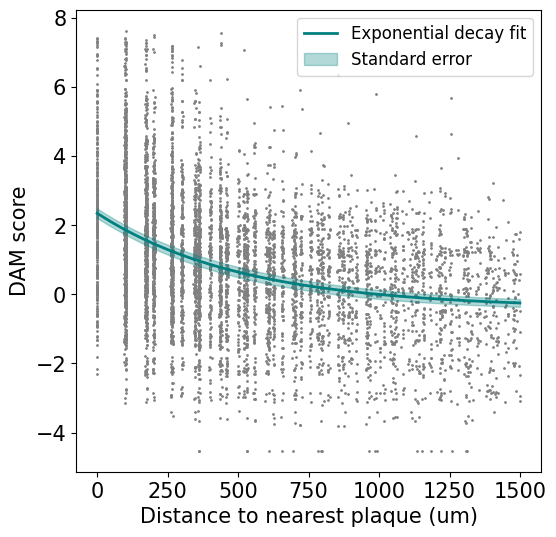

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decay function with a slower decay rate
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Extract the x and y data (assuming `data` is a DataFrame or dict)
x_data = data['dist_nearest_plaq']
y_data = data['dam_scr']

# Provide initial parameter estimates
initial_guess = [1, 0.001, 0]  # Adjust these values as needed

# Fit the exponential decay model to the data
params, covariance = curve_fit(exp_decay, x_data, y_data, p0=initial_guess)

# Get the standard deviation errors on the parameters from the covariance matrix
param_errors = np.sqrt(np.diag(covariance))

# Generate x values for plotting the fit
x_fit = np.linspace(x_data.min(), x_data.max(), 1000)
y_fit = exp_decay(x_fit, *params)

# Generate the confidence interval (standard error propagation)
# Calculate upper and lower bounds by adding and subtracting the error on each parameter
def exp_decay_err(x, params, param_errors):
    a_err, b_err, c_err = param_errors
    return np.sqrt((np.exp(-params[1] * x) * param_errors[0])**2 +
                   (params[0] * x * np.exp(-params[1] * x) * param_errors[1])**2 +
                   param_errors[2]**2)

# Calculate the standard error at each x_fit point
y_err = exp_decay_err(x_fit, params, param_errors)

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_data, y_data, alpha=1, s=1, c='grey')

# Plot the line of best fit (exponential decay fit)
ax.plot(x_fit, y_fit, color='teal', linewidth=2, linestyle='-', label='Exponential decay fit')

# Add the confidence interval as a shaded area
ax.fill_between(x_fit, y_fit - y_err, y_fit + y_err, color='teal', alpha=0.3, label='Standard error')

# Set labels and ticks
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('DAM score', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a legend
ax.legend(fontsize=12)

# Show the plot
#plt.savefig(s_code + 'dam_vs_dist.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


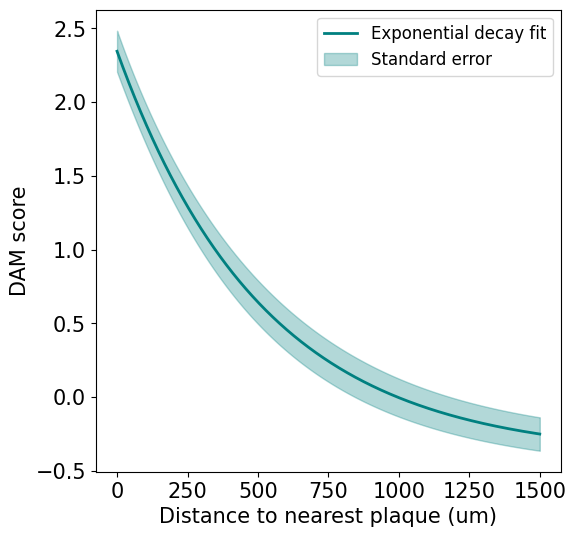

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decay function with a slower decay rate
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Extract the x and y data (assuming `data` is a DataFrame or dict)
x_data = data['dist_nearest_plaq']
y_data = data['dam_scr']

# Provide initial parameter estimates
initial_guess = [1, 0.001, 0]  # Adjust these values as needed

# Fit the exponential decay model to the data
params, covariance = curve_fit(exp_decay, x_data, y_data, p0=initial_guess)

# Get the standard deviation errors on the parameters from the covariance matrix
param_errors = np.sqrt(np.diag(covariance))

# Generate x values for plotting the fit
x_fit = np.linspace(x_data.min(), x_data.max(), 1000)
y_fit = exp_decay(x_fit, *params)

# Generate the confidence interval (standard error propagation)
# Calculate upper and lower bounds by adding and subtracting the error on each parameter
def exp_decay_err(x, params, param_errors):
    a_err, b_err, c_err = param_errors
    return np.sqrt((np.exp(-params[1] * x) * param_errors[0])**2 +
                   (params[0] * x * np.exp(-params[1] * x) * param_errors[1])**2 +
                   param_errors[2]**2)

# Calculate the standard error at each x_fit point
y_err = exp_decay_err(x_fit, params, param_errors)

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(6,6))
#ax.scatter(x_data, y_data, alpha=1, s=1, c='grey')

# Plot the line of best fit (exponential decay fit)
ax.plot(x_fit, y_fit, color='teal', linewidth=2, linestyle='-', label='Exponential decay fit')

# Add the confidence interval as a shaded area
ax.fill_between(x_fit, y_fit - y_err, y_fit + y_err, color='teal', alpha=0.3, label='Standard error')

# Set labels and ticks
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('DAM score', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a legend
ax.legend(fontsize=12)

# Show the plot
#
plt.savefig(s_code + 'dam_vs_dist.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


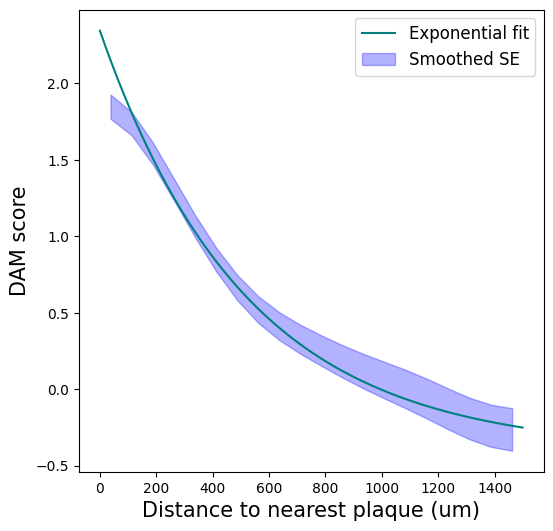

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Bin the data and calculate standard error per bin
def bin_data(x, y, bins):
    bin_means = np.zeros(len(bins)-1)
    bin_sems = np.zeros(len(bins)-1)
    bin_centers = np.zeros(len(bins)-1)
    
    for i in range(1, len(bins)):
        bin_mask = (x >= bins[i-1]) & (x < bins[i])
        bin_data = y[bin_mask]
        
        if len(bin_data) > 1:
            bin_means[i-1] = np.mean(bin_data)
            bin_sems[i-1] = np.std(bin_data) / np.sqrt(len(bin_data))  # Standard error
        else:
            bin_means[i-1] = np.nan  # Handle empty bins
            bin_sems[i-1] = np.nan  # Handle empty bins
        
        bin_centers[i-1] = (bins[i-1] + bins[i]) / 2
    
    return bin_centers, bin_means, bin_sems

# Example data
x_data = data['dist_nearest_plaq']
y_data = data['dam_scr']

# Define bin edges
num_bins = 20
bins = np.linspace(x_data.min(), x_data.max(), num_bins + 1)

# Calculate mean and standard error for each bin
bin_centers, bin_means, bin_sems = bin_data(x_data, y_data, bins)

# Smooth the binned means and standard errors along the x-axis using Gaussian smoothing
smoothed_means = gaussian_filter1d(bin_means, sigma=2)  # Adjust sigma for more or less smoothing
smoothed_sems = gaussian_filter1d(bin_sems, sigma=2)

# Fit the exponential decay model to the original data
initial_guess = [1, 0.001, 0]
params, covariance = curve_fit(exp_decay, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(x_data.min(), x_data.max(), 1000)
y_fit = exp_decay(x_fit, *params)

# Plot the data and the smoothed values
fig, ax = plt.subplots(figsize=(6,6))

# Plot the smoothed means
#ax.plot(bin_centers, smoothed_means, color='blue', label='Smoothed Binned Means')

# Plot the exponential fit
ax.plot(x_fit, y_fit, color='teal', label='Exponential fit')

# Plot the smoothed standard error as a shaded region around the smoothed means
ax.fill_between(bin_centers, smoothed_means - smoothed_sems, smoothed_means + smoothed_sems, color='blue', alpha=0.3, label='Smoothed SE')

# Set labels and legend
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('DAM score', fontsize=15)
ax.legend(fontsize=12)

# Show the plot
plt.show()


### CSIDE proportions as a function of plaque distance


In [168]:
#Group cell proportion metadata into single dataframe
age='old'
for x,name in enumerate(sub_ID):
    curr_ = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/cside/' + age + '/' + name + '-proportions.csv', index_col=0)
    #take cortex only
    ind = [i for i in range(len(curr_)) if 'Cortex L' in curr_['cluster'].iloc[i]]
    curr_ = curr_.iloc[ind]
    if x!=0:cell_df = pd.concat([cell_df, curr_], axis=0)
    else: cell_df  = curr_

#Define cells to iterate over
#replace all spaces in column names with _
cell_df.columns = [i.replace(' ', '_') for i in cell_df.columns.values]
#replace all - with _
cell_df.columns = [i.replace('-', '_') for i in cell_df.columns.values]
cell_df = cell_df[cell_df['dist_nearest_plaq'] < 1000]
cell_unq = cell_df.columns[13:]
cell_unq


Index(['Astro_NN', 'Car3_Glut', 'Endo_NN', 'IT_EP_CLA_Glut',
       'L2_3_IT_CTX_Glut', 'L2_3_IT_RSP_Glut', 'L4_5_IT_CTX_Glut',
       'L5_ET_CTX_Glut', 'L5_IT_CTX_Glut', 'L5_NP_CTX_Glut', 'L6_CT_CTX_Glut',
       'L6_IT_CTX_Glut', 'L6b_CTX_Glut', 'Lamp5_Gaba', 'Microglia_NN',
       'Oligo_NN', 'OPC_NN', 'Peri_NN', 'Pvalb_Gaba', 'SMC_NN', 'Sncg_Gaba',
       'Sst_Gaba', 'Vip_Gaba'],
      dtype='object')

In [169]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
pv,tv = [],[]
for cell in cell_unq:
    data = cell_df
    #Remove all rows with nans in data
    data = data[data[cell].notnull()]
    md = smf.mixedlm(cell + " ~ dist_nearest_plaq", data, groups=data["sample"])
    mdf = md.fit()
    pv = np.append(pv, mdf.pvalues[1])
    tv = np.append(tv, mdf.tvalues[1])


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dburrows/mambaforge/envs/base_c

In [181]:
cell_unq

Index(['Astro_NN', 'Car3_Glut', 'Endo_NN', 'IT_EP_CLA_Glut',
       'L2_3_IT_CTX_Glut', 'L2_3_IT_RSP_Glut', 'L4_5_IT_CTX_Glut',
       'L5_ET_CTX_Glut', 'L5_IT_CTX_Glut', 'L5_NP_CTX_Glut', 'L6_CT_CTX_Glut',
       'L6_IT_CTX_Glut', 'L6b_CTX_Glut', 'Lamp5_Gaba', 'Microglia_NN',
       'Oligo_NN', 'OPC_NN', 'Peri_NN', 'Pvalb_Gaba', 'SMC_NN', 'Sncg_Gaba',
       'Sst_Gaba', 'Vip_Gaba'],
      dtype='object')

In [187]:
pv[np.where(cell_unq == 'Microglia_NN')[0][0]], tv[np.where(cell_unq == 'Microglia_NN')[0][0]]

(3.251343790507453e-14, -7.5878989214563415)

In [88]:
data[cell], data['dist_nearest_plaq']

(0       0.003821
 1       0.000072
 2       0.000809
 4       0.009547
 5       0.010631
           ...   
 1014    0.001531
 1015    0.002660
 1016    0.002254
 1017    0.000049
 1018    0.000505
 Name: Vip_Gaba, Length: 6453, dtype: float64,
 0       361.977789
 1       697.281805
 2        98.155009
 4       970.737604
 5       969.398501
            ...    
 1014    264.686204
 1015    298.551842
 1016     97.371988
 1017    268.252716
 1018    953.542679
 Name: dist_nearest_plaq, Length: 6453, dtype: float64)

In [170]:
sig_cell
cell = 'Microglia_NN'

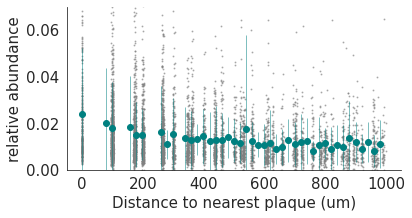

In [176]:
#plot each cell type as a function of distance
data = cell_df

nbins=50
dist_flat = data['dist_nearest_plaq'].values
umi_flat = data[cell]

#sort by umis by distance
sort_dist, sort_umi = adm.sort_2list(dist_flat, umi_flat)
#Define number of bins
bins = (np.linspace(np.min(sort_dist), np.max(sort_dist), nbins+1)).astype(int)
bin_means, bin_edges, binnumber = stats.binned_statistic(sort_dist, sort_umi, statistic='mean', bins=bins)
bin_std, bin_edges, binnumber = stats.binned_statistic(sort_dist, sort_umi, statistic='std', bins=bins)


fig,ax = plt.subplots(figsize=(6,3))
plt.errorbar(bin_edges[:-1], bin_means, yerr=bin_std, fmt='o',elinewidth=0.5, capsize=0, alpha=1, c='teal')

data = data[data[cell].notnull()]
ax.scatter(data['dist_nearest_plaq'], data[cell], alpha=0.5, s=1, c='grey')
ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
ax.set_ylabel('relative abundance', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,0.07)
sns.despine(top=True, right=True)

plt.savefig(s_code + 'cside-_vs_dist.s', dpi=300, bbox_inches='tight', transparent=True)
plt.show()



/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


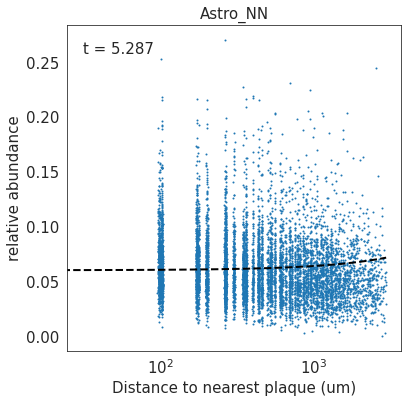

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


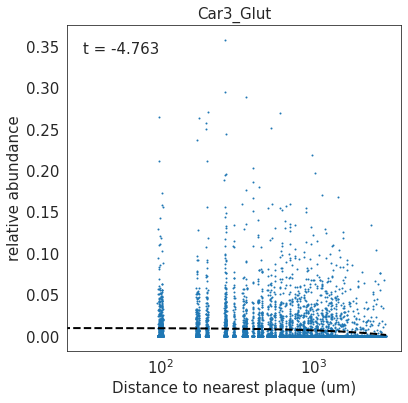

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


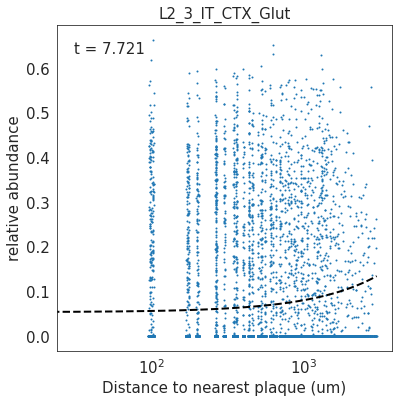

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


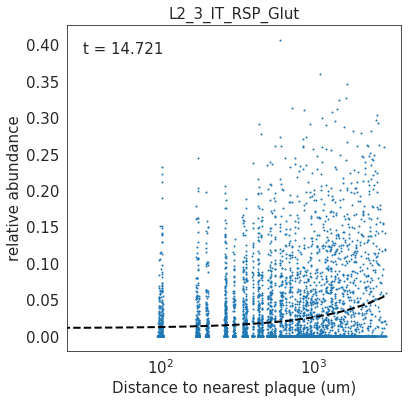

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


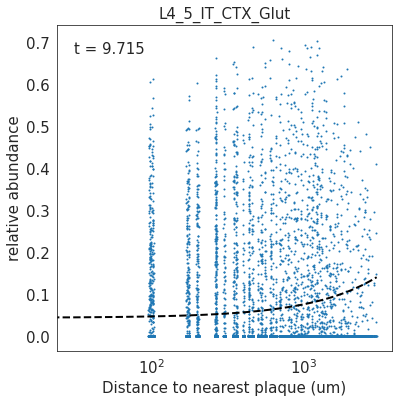

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


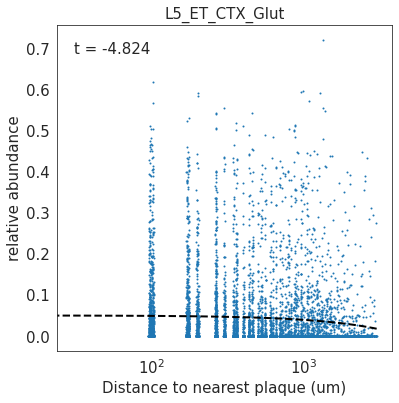

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


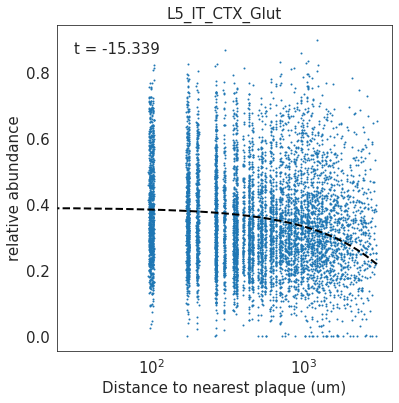

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


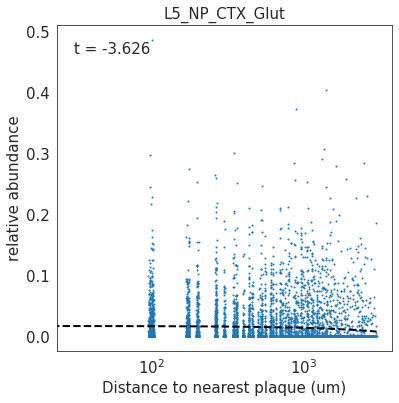

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


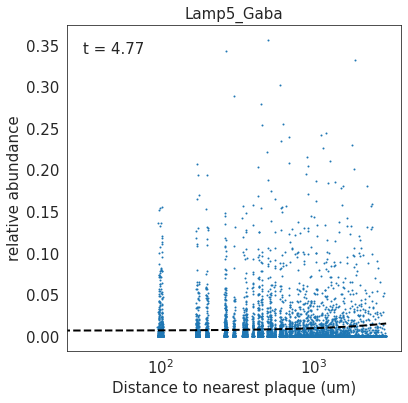

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: 

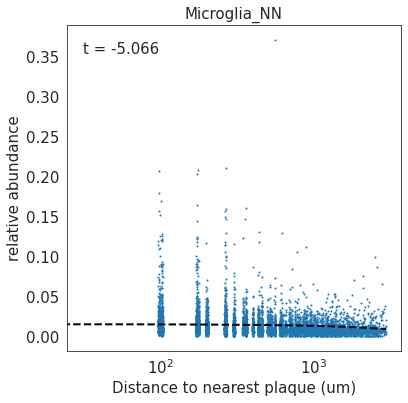

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


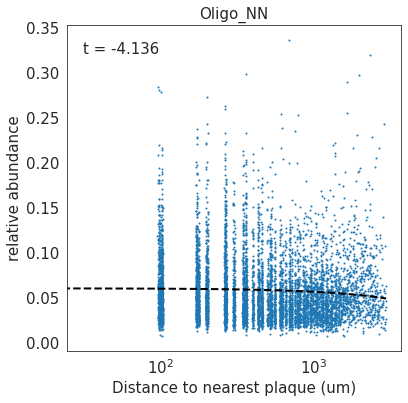

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


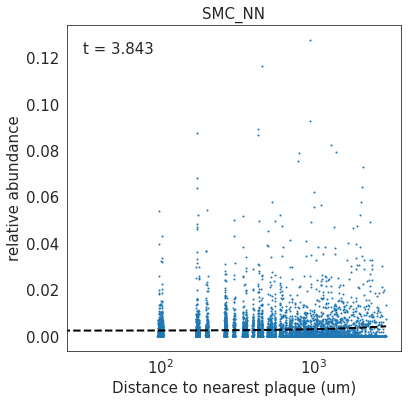

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


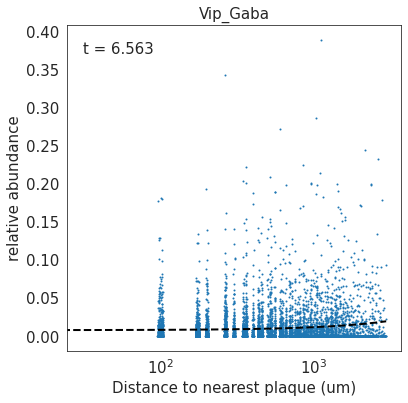

In [146]:
#plot each cell type as a function of distance
data = cell_df

for cell in sig_cell:
    fig,ax = plt.subplots(figsize=(6,6))
    data = data[data[cell].notnull()]
    ax.scatter(data['dist_nearest_plaq'], data[cell], alpha=1, s=1)
    ax.set_xlabel('Distance to nearest plaque (um)', fontsize=15)
    ax.set_ylabel('relative abundance', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    #plot line of best fit
    x = np.linspace(0, 3000, 100)
    md = smf.mixedlm(cell + " ~ dist_nearest_plaq", data, groups=data["sample"])
    mdf = md.fit()
    y = mdf.params[0] + mdf.params[1]*x
    ax.plot(x, y, color='black', linewidth=2, linestyle='--')
    #write p value and t value on plot
    ax.text(0.05, 0.95, 't = ' + str(np.round(mdf.tvalues[1], 3)), transform=ax.transAxes, fontsize=15, verticalalignment='top')
    plt.xscale('log')
    plt.title(cell, fontsize=15)
    #plt.savefig(s_fig + 'cside-' + cell + '_vs_dist.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

In [26]:

data = sm.datasets.get_rdataset("dietox", "geepack").data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()

print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



In [33]:
data

Pig     Evit     Cu  Litter  Start     Weight        Feed  Time
0    4601  Evit000  Cu000       1   26.5   26.50000         NaN     1
1    4601  Evit000  Cu000       1   26.5   27.59999    5.200005     2
2    4601  Evit000  Cu000       1   26.5   36.50000   17.600000     3
3    4601  Evit000  Cu000       1   26.5   40.29999   28.500000     4
4    4601  Evit000  Cu000       1   26.5   49.09998   45.200001     5
..    ...      ...    ...     ...    ...        ...         ...   ...
856  8442  Evit000  Cu175      24   25.7   73.19995   83.800003     8
857  8442  Evit000  Cu175      24   25.7   81.69995   99.800003     9
858  8442  Evit000  Cu175      24   25.7   90.29999  115.200001    10
859  8442  Evit000  Cu175      24   25.7   96.00000  133.200001    11
860  8442  Evit000  Cu175      24   25.7  103.50000  151.400002    12

[861 rows x 8 columns]

### Correlate gene expression with plaque number 

In [10]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind].T
cort_gene


NameError: name 'lab' is not defined

In [156]:
_gene=pd.DataFrame()
_counts =[]

for s in sub_ID:
    sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
    sumd = pd.DataFrame(sumd, columns=[s])
    _gene = pd.concat([_gene, sumd], axis=1)
    _counts = np.append(_counts, sum(cort_lab[cort_lab['sample'] == s]['plaque'].values))


<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s]

In [ ]:
gene_norm = (_gene.values/np.sum(_gene.values,axis=0))*1000000

In [75]:
sub_ = cort_gene[adj_p_vals<0.2]
sub_gn = gene_norm[adj_p_vals < 0.2]

Index(['Arid5a', 'Neu4', 'Prdx6', 'Fcer1g', 'Nfe2l2', 'Prr5l', 'Decr1',
       'Glipr2', 'Cd52', 'Mmd2', 'Hpgds', 'Capg', 'Cd9', 'Cacng8', 'Lgi4',
       'Siglech', 'Cyba', 'Cmtm6', 'Tgfbr2', 'Ccl9', 'Ccl6', 'Slc16a3', 'Ly86',
       'Gm5086', 'Tspan14', 'Pros1', 'H2-DMb1', 'Slc14a1', 'Kcne1l'],
      dtype='object')

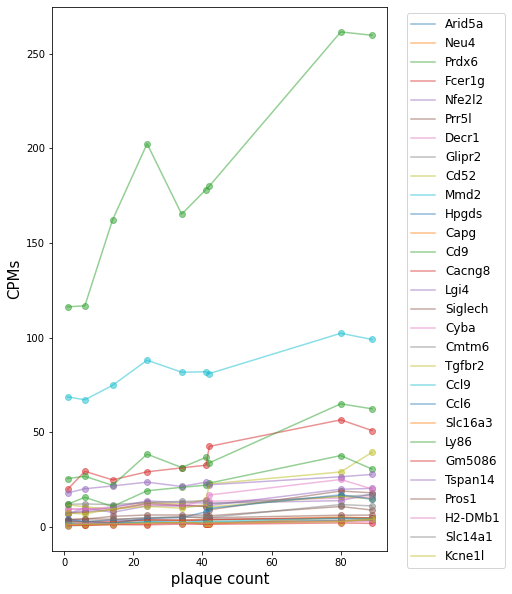

In [88]:
fig,ax = plt.subplots(figsize=(6,10))
for i in range(sub_gn.shape[0]):
    curr = adm.sort_2list(_counts, sub_gn[i])
    plt.plot(curr[0], curr[1], alpha=0.5, label = sub_.index[i]) 
    plt.scatter(_counts, sub_gn[i], alpha=0.5)
#set x and y axis labels
plt.xlabel(' plaque count ', fontsize=15)
plt.ylabel('CPMs', fontsize=15)
plt.legend(fontsize=12,bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig(s_fig + '/plaquenum_CPMs.svg', transparent=True)
plt.show()

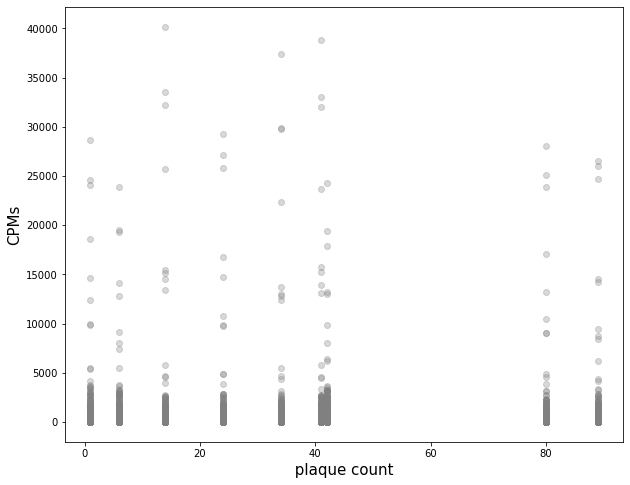

In [37]:
fig,ax = plt.subplots(figsize=(10,8))
for i in range(len(_gene.values)):
    plt.scatter(_counts, gene_norm[i], c='grey', alpha=0.3)
#set x and y axis labels
plt.xlabel(' plaque count ', fontsize=15)
plt.ylabel('CPMs', fontsize=15)
plt.savefig(s_fig + '/plaquenum_CPMs.png', transparent=True)
plt.show()

In [14]:
norm_gene = pd.DataFrame()
for x,s in enumerate(sub_ID):
    gol = cort_gene.T[cort_lab['sample'] == s].T/np.sum(_gene.values,axis=0)[x]
    norm_gene = pd.concat([norm_gene, gol], axis=1)

In [15]:
norm_gene

AAACAAGTATCTCCCA-1_109-D  AAACATTTCCCGGATT-1_109-D  \
Xkr4                        0.000000e+00              0.000000e+00   
Gm19938                     0.000000e+00              0.000000e+00   
Sox17                       0.000000e+00              0.000000e+00   
Mrpl15                      0.000000e+00              4.513333e-07   
Lypla1                      0.000000e+00              0.000000e+00   
...                                  ...                       ...   
Vamp7                       0.000000e+00              0.000000e+00   
Spry3                       0.000000e+00              0.000000e+00   
Tmlhe                       0.000000e+00              0.000000e+00   
CAAA01147332.1              0.000000e+00              0.000000e+00   
AC149090.1                  7.522222e-07              4.513333e-07   

                AAACCCGAACGAAATC-1_109-D  AAACCTAAGCAGCCGG-1_109-D  \
Xkr4                        0.000000e+00              0.000000e+00   
Gm19938                     0.000000e+00              0.000000e+00   
Sox17                       1.504444e-07              0.000000e+00   
Mrpl15                      0.000000e+00              1.504444e-07   
Lypla1                      0.000000e+00              1.504444e-07   
...                                  ...                       ...   
Vamp7                       0.000000e+00              0.000000e+00   
Spry3                       0.000000e+00              0.000000e+00   
Tmlhe                       0.000000e+00              0.000000e+00   
CAAA01147332.1              0.000000e+00              0.000000e+00   
AC149090.1                  0.000000e+00              4.513333e-07   

                AAACGCCCGAGATCGG-1_109-D  AAACGGGCGTACGGGT-1_109-D  \
Xkr4                        0.000000e+00              0.000000e+00   
Gm19938                     0.000000e+00              0.000000e+00   
Sox17                       0.000000e+00              0.000000e+00   
Mrpl15                      0.000000e+00              0.000000e+00   
Lypla1                      1.504444e-07              0.000000e+00   
...                                  ...                       ...   
Vamp7                       0.000000e+00              1.504444e-07   
Spry3                       0.000000e+00              1.504444e-07   
Tmlhe                       0.000000e+00              0.000000e+00   
CAAA01147332.1              0.000000e+00              0.000000e+00   
AC149090.1                  3.008889e-07              0.000000e+00   

                AAACGGTTGCGAACTG-1_109-D  AAACTAACGTGGCGAC-1_109-D  \
Xkr4                        0.000000e+00              0.000000e+00   
Gm19938                     0.000000e+00              0.000000e+00   
Sox17                       0.000000e+00              0.000000e+00   
Mrpl15                      0.000000e+00              0.000000e+00   
Lypla1                      0.000000e+00              1.504444e-07   
...                                  ...                       ...   
Vamp7                       0.000000e+00              0.000000e+00   
Spry3                       0.000000e+00              0.000000e+00   
Tmlhe                       0.000000e+00              0.000000e+00   
CAAA01147332.1              0.000000e+00              0.000000e+00   
AC149090.1                  1.504444e-07              9.026667e-07   

                AAACTCGGTTCGCAAT-1_109-D  AAACTCGTGATATAAG-1_109-D  ...  \
Xkr4                        0.000000e+00              0.000000e+00  ...   
Gm19938                     0.000000e+00              0.000000e+00  ...   
Sox17                       0.000000e+00              0.000000e+00  ...   
Mrpl15                      0.000000e+00              3.008889e-07  ...   
Lypla1                      0.000000e+00              0.000000e+00  ...   
...                                  ...                       ...  ...   
Vamp7                       0.000000e+00              0.000000e+00  ...   
Spry3                       0.000000e+00            

In [16]:
norm_gene = pd.DataFrame()
for x,s in enumerate(sub_ID):
    gol = cort_gene.T[cort_lab['sample'] == s].T/np.sum(_gene.values,axis=0)[x]
    norm_gene = pd.concat([norm_gene, gol], axis=1)
    
sort_dist, sort_name =adm.sort_2list(cort_lab['dist'], cort_lab.index.values)
fin_gene = norm_gene[sort_name]

In [12]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind]
unq_cort = np.unique(cort_lab['cluster'].values)
plq_name = 'plq0', 'plq1'


In [16]:
samp_unq = np.unique(cort_lab['sample'].values)
samp_unq

array(['030-B', '030-C', '030-D', '040-A', '040-C', '040-D', '109-A',
       '109-C', '109-D'], dtype=object)

In [18]:
for name in sub_ID:
    for p in range(2):
        curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['plaque']==p))])

In [33]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind]
unq_cort = np.unique(cort_lab['cluster'].values)
plq_name = 'adj0', 'adj1'


bulk_gene=pd.DataFrame()
bulk_lab = pd.DataFrame()
for name in sub_ID:
    for p in range(2):
        if p == 0: 
            curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['adj']==p) & (cort_lab['plaque']==0))])
        else:
            curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['adj']==p))])
        curr_samp = pd.DataFrame(curr_samp, columns=[name+'_'+plq_name[p]])
        if sum(curr_samp.values) == 0: continue
        bulk_gene = pd.concat([bulk_gene, curr_samp], axis=1)
        curr_lab = cort_lab.iloc[np.where((name == cort_lab['sample'].values)  & (cort_lab['adj']==p))].iloc[0]
        bulk_lab = pd.concat([bulk_lab, curr_lab], axis=1)

#change order of columns in bulk_gene
bulk_lab = bulk_lab.T
bulk_lab = bulk_lab[['sample', 'sex', 'adj']]
#replace bulk_lab index names with sample names from bulk_gene
bulk_lab.index = bulk_gene.columns.values

bulk_lab['adj'][bulk_lab['adj'] == 0] = 'adj0'
bulk_lab['adj'][bulk_lab['adj'] == 1] = 'adj1'

In [34]:
#write to csv
bulk_gene.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-adj_counts.csv', index=True)
bulk_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-adj_labels.csv', index=True)

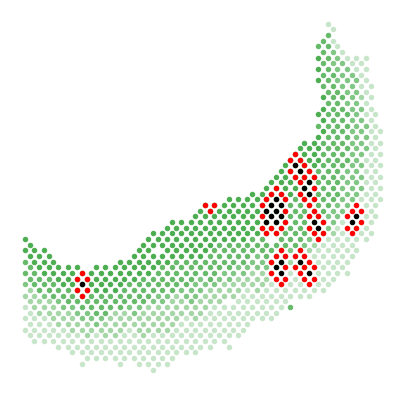

In [284]:
plq_coords = spot_df[spot_df['plaque']==1]['array_row'].values, spot_df[spot_df['plaque']==1]['array_col'].values
nplq_coords = spot_df[spot_df['plaque']==0]['array_row'].values, spot_df[spot_df['plaque']==0]['array_col'].values
adj_coords =spot_df[spot_df['adj']==1]['array_row'].values, spot_df[spot_df['adj']==1]['array_col'].values

fig,ax = plt.subplots(figsize=(7,7))
for x in range(len(sort_clust[:5])): 
    curr_ = spot_df.iloc[np.where(spot_df['cluster'] == sort_clust[x])]
    plt.scatter(curr_['array_row'].values,curr_['array_col'].values, s=20, color = sort_col[x], alpha=1)

    plt.scatter(curr_['array_row'][curr_['adj']==1], curr_['array_col'][curr_['adj']==1], c = 'r', s=20)
    plt.scatter(curr_['array_row'][curr_['plaque']==1],curr_['array_col'][curr_['plaque']==1], c = 'k', s=20)


#remove all borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.savefig(s_fig + 'cluster-adj-plq.svg', transparent=True)
plt.show()
